## 1. Data Exploration and Cleaning:

In [1]:
import pandas as pd

# Load the dataset
file_path = 'Dataset.csv'
dataset = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
dataset.head(500)

Customer ID  Age  Gender Income Level    Country  \
0     CUST_0001   48  Female       Medium         UK   
1     CUST_0002   44    Male    Very High  Australia   
2     CUST_0003   48    Male         High  Australia   
3     CUST_0004   66    Male    Very High      India   
4     CUST_0005   55  Female          Low  Australia   
..          ...  ...     ...          ...        ...   
495   CUST_0496   46  Female    Very High      Japan   
496   CUST_0497   57    Male          Low  Australia   
497   CUST_0498   48    Male         High     Canada   
498   CUST_0499   23  Female    Very High        USA   
499   CUST_0500   65    Male    Very High         UK   

               Reservation Date                 Travel Date  Travel Duration  \
0    2024-04-14 11:05:44.764459  2024-07-07 11:05:44.764459               29   
1    2023-10-18 11:05:44.764477  2023-12-13 11:05:44.764477               29   
2    2023-12-12 11:05:44.764482  2024-02-13 11:05:44.764482               17   
3    2023-09-01 11:05:44.764485  2023-09-09 11:05:44.764485               10   
4    2023-08-05 11:05:44.764487  2023-09-18 11:05:44.764487               29   
..                          ...                         ...              ...   
495  2023-10-05 11:05:44.765507  2023-12-20 11:05:44.765507               26   
496  2023-10-05 11:05:44.765510  2023-10-22 11:05:44.765510               10   
497  2024-06-08 11:05:44.765512  2024-09-06 11:05:44.765512               18   
498  2024-01-17 11:05:44.765515  2024-03-07 11:05:44.765515               16   
499  2023-10-19 11:05:44.765517  2023-12-06 11:05:44.765517               24   

    Travel Type Travel Destination  Reservation Fee Reservation Status  \
0     Adventure             London          6088.98          Completed   
1    Relaxation              Dubai          4745.06          Cancelled   
2    Relaxation             London          3822.65            Pending   
3     Adventure              Dubai          8460.69          Completed   
4        Family          Barcelona          8664.90          Cancelled   
..          ...                ...              ...                ...   
495     Holiday           Istanbul          4438.56            Pending   
496      Family           New York          5870.76          Cancelled   
497  Relaxation             Sydney          4965.77            Pending   
498      Family          Barcelona          1799.11            Pending   
499      Family           New York          3137.80            Pending   

     Customer Satisfaction Score  
0                              8  
1                              1  
2                              3  
3                              9  
4                              2  
..                           ...  
495                            4  
496                            9  
497                            5  
498                            5  
499                            5  

[500 rows x 13 columns]

### Check for missing values in the dataset

In [2]:
print("\nMissing values in the dataset:")
missing_values = dataset.isnull().sum()
missing_values


Missing values in the dataset:


Customer ID                    0
Age                            0
Gender                         0
Income Level                   0
Country                        0
Reservation Date               0
Travel Date                    0
Travel Duration                0
Travel Type                    0
Travel Destination             0
Reservation Fee                0
Reservation Status             0
Customer Satisfaction Score    0
dtype: int64

### Display the data types of each column

In [3]:
print("\nData types of each column:")
data_types = dataset.dtypes
data_types


Data types of each column:


Customer ID                     object
Age                              int64
Gender                          object
Income Level                    object
Country                         object
Reservation Date                object
Travel Date                     object
Travel Duration                  int64
Travel Type                     object
Travel Destination              object
Reservation Fee                float64
Reservation Status              object
Customer Satisfaction Score      int64
dtype: object

In [4]:
# Convert 'Reservation Date' and 'Travel Date' to datetime objects
dataset['Reservation Date'] = pd.to_datetime(dataset['Reservation Date'])
dataset['Travel Date'] = pd.to_datetime(dataset['Travel Date'])

data_types_updated = dataset.dtypes

# Updated data types
data_types_updated

Customer ID                            object
Age                                     int64
Gender                                 object
Income Level                           object
Country                                object
Reservation Date               datetime64[ns]
Travel Date                    datetime64[ns]
Travel Duration                         int64
Travel Type                            object
Travel Destination                     object
Reservation Fee                       float64
Reservation Status                     object
Customer Satisfaction Score             int64
dtype: object

### Descriptive statistics for numerical features

In [5]:
# Descriptive statistics for numerical features
print("\nDescriptive statistics for numerical features:")
descriptive_stats = dataset.describe()
descriptive_stats


Descriptive statistics for numerical features:


Age  Travel Duration  Reservation Fee  \
count  5000.00000      5000.000000      5000.000000   
mean     43.50540        15.027400      5022.489812   
std      14.90106         8.308288      2854.993207   
min      18.00000         1.000000        57.710000   
25%      31.00000         8.000000      2545.225000   
50%      43.00000        15.000000      4998.835000   
75%      56.00000        22.000000      7494.165000   
max      69.00000        29.000000      9999.190000   

       Customer Satisfaction Score  
count                  5000.000000  
mean                      5.455200  
std                       2.831465  
min                       1.000000  
25%                       3.000000  
50%                       5.000000  
75%                       8.000000  
max                      10.000000

In [6]:
# Check for duplicate rows in the dataset
print("\nNumber of duplicate rows in the dataset:")
duplicate_rows = dataset.duplicated().sum()
print(duplicate_rows)

# Remove duplicate rows if any
if duplicate_rows > 0:
    dataset = dataset.drop_duplicates()
    print(f"Removed {duplicate_rows} duplicate rows.")


Number of duplicate rows in the dataset:
0


In [7]:
# Cleaned dataset info
print("\nCleaned dataset info:")
dataset.info()


Cleaned dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Customer ID                  5000 non-null   object        
 1   Age                          5000 non-null   int64         
 2   Gender                       5000 non-null   object        
 3   Income Level                 5000 non-null   object        
 4   Country                      5000 non-null   object        
 5   Reservation Date             5000 non-null   datetime64[ns]
 6   Travel Date                  5000 non-null   datetime64[ns]
 7   Travel Duration              5000 non-null   int64         
 8   Travel Type                  5000 non-null   object        
 9   Travel Destination           5000 non-null   object        
 10  Reservation Fee              5000 non-null   float64       
 11  Reservation Status  

### Summary statistics

In [8]:
# Summary statistics for numerical features
summary_stats = dataset.describe()

# Summary statistics for categorical features
categorical_summary = dataset.describe(include=['object'])

# The summary statistics
print("\nSummary Statistics for Numerical Features:")
print(summary_stats)

print("\nSummary Statistics for Categorical Features:")
print(categorical_summary)



Summary Statistics for Numerical Features:
              Age  Travel Duration  Reservation Fee  \
count  5000.00000      5000.000000      5000.000000   
mean     43.50540        15.027400      5022.489812   
std      14.90106         8.308288      2854.993207   
min      18.00000         1.000000        57.710000   
25%      31.00000         8.000000      2545.225000   
50%      43.00000        15.000000      4998.835000   
75%      56.00000        22.000000      7494.165000   
max      69.00000        29.000000      9999.190000   

       Customer Satisfaction Score  
count                  5000.000000  
mean                      5.455200  
std                       2.831465  
min                       1.000000  
25%                       3.000000  
50%                       5.000000  
75%                       8.000000  
max                      10.000000  

Summary Statistics for Categorical Features:
       Customer ID Gender Income Level  Country Travel Type  \
count         5000

## 2. Data Analysis

### 2.1 Analyzing the Distribution of Age, Travel Duration, Reservation Fee, and Customer Satisfaction Score

/var/folders/28/z0z7hcqd7cl1rshv_6gp04wm0000gn/T/ipykernel_61472/3735620796.py:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = datasetforplot.corr()


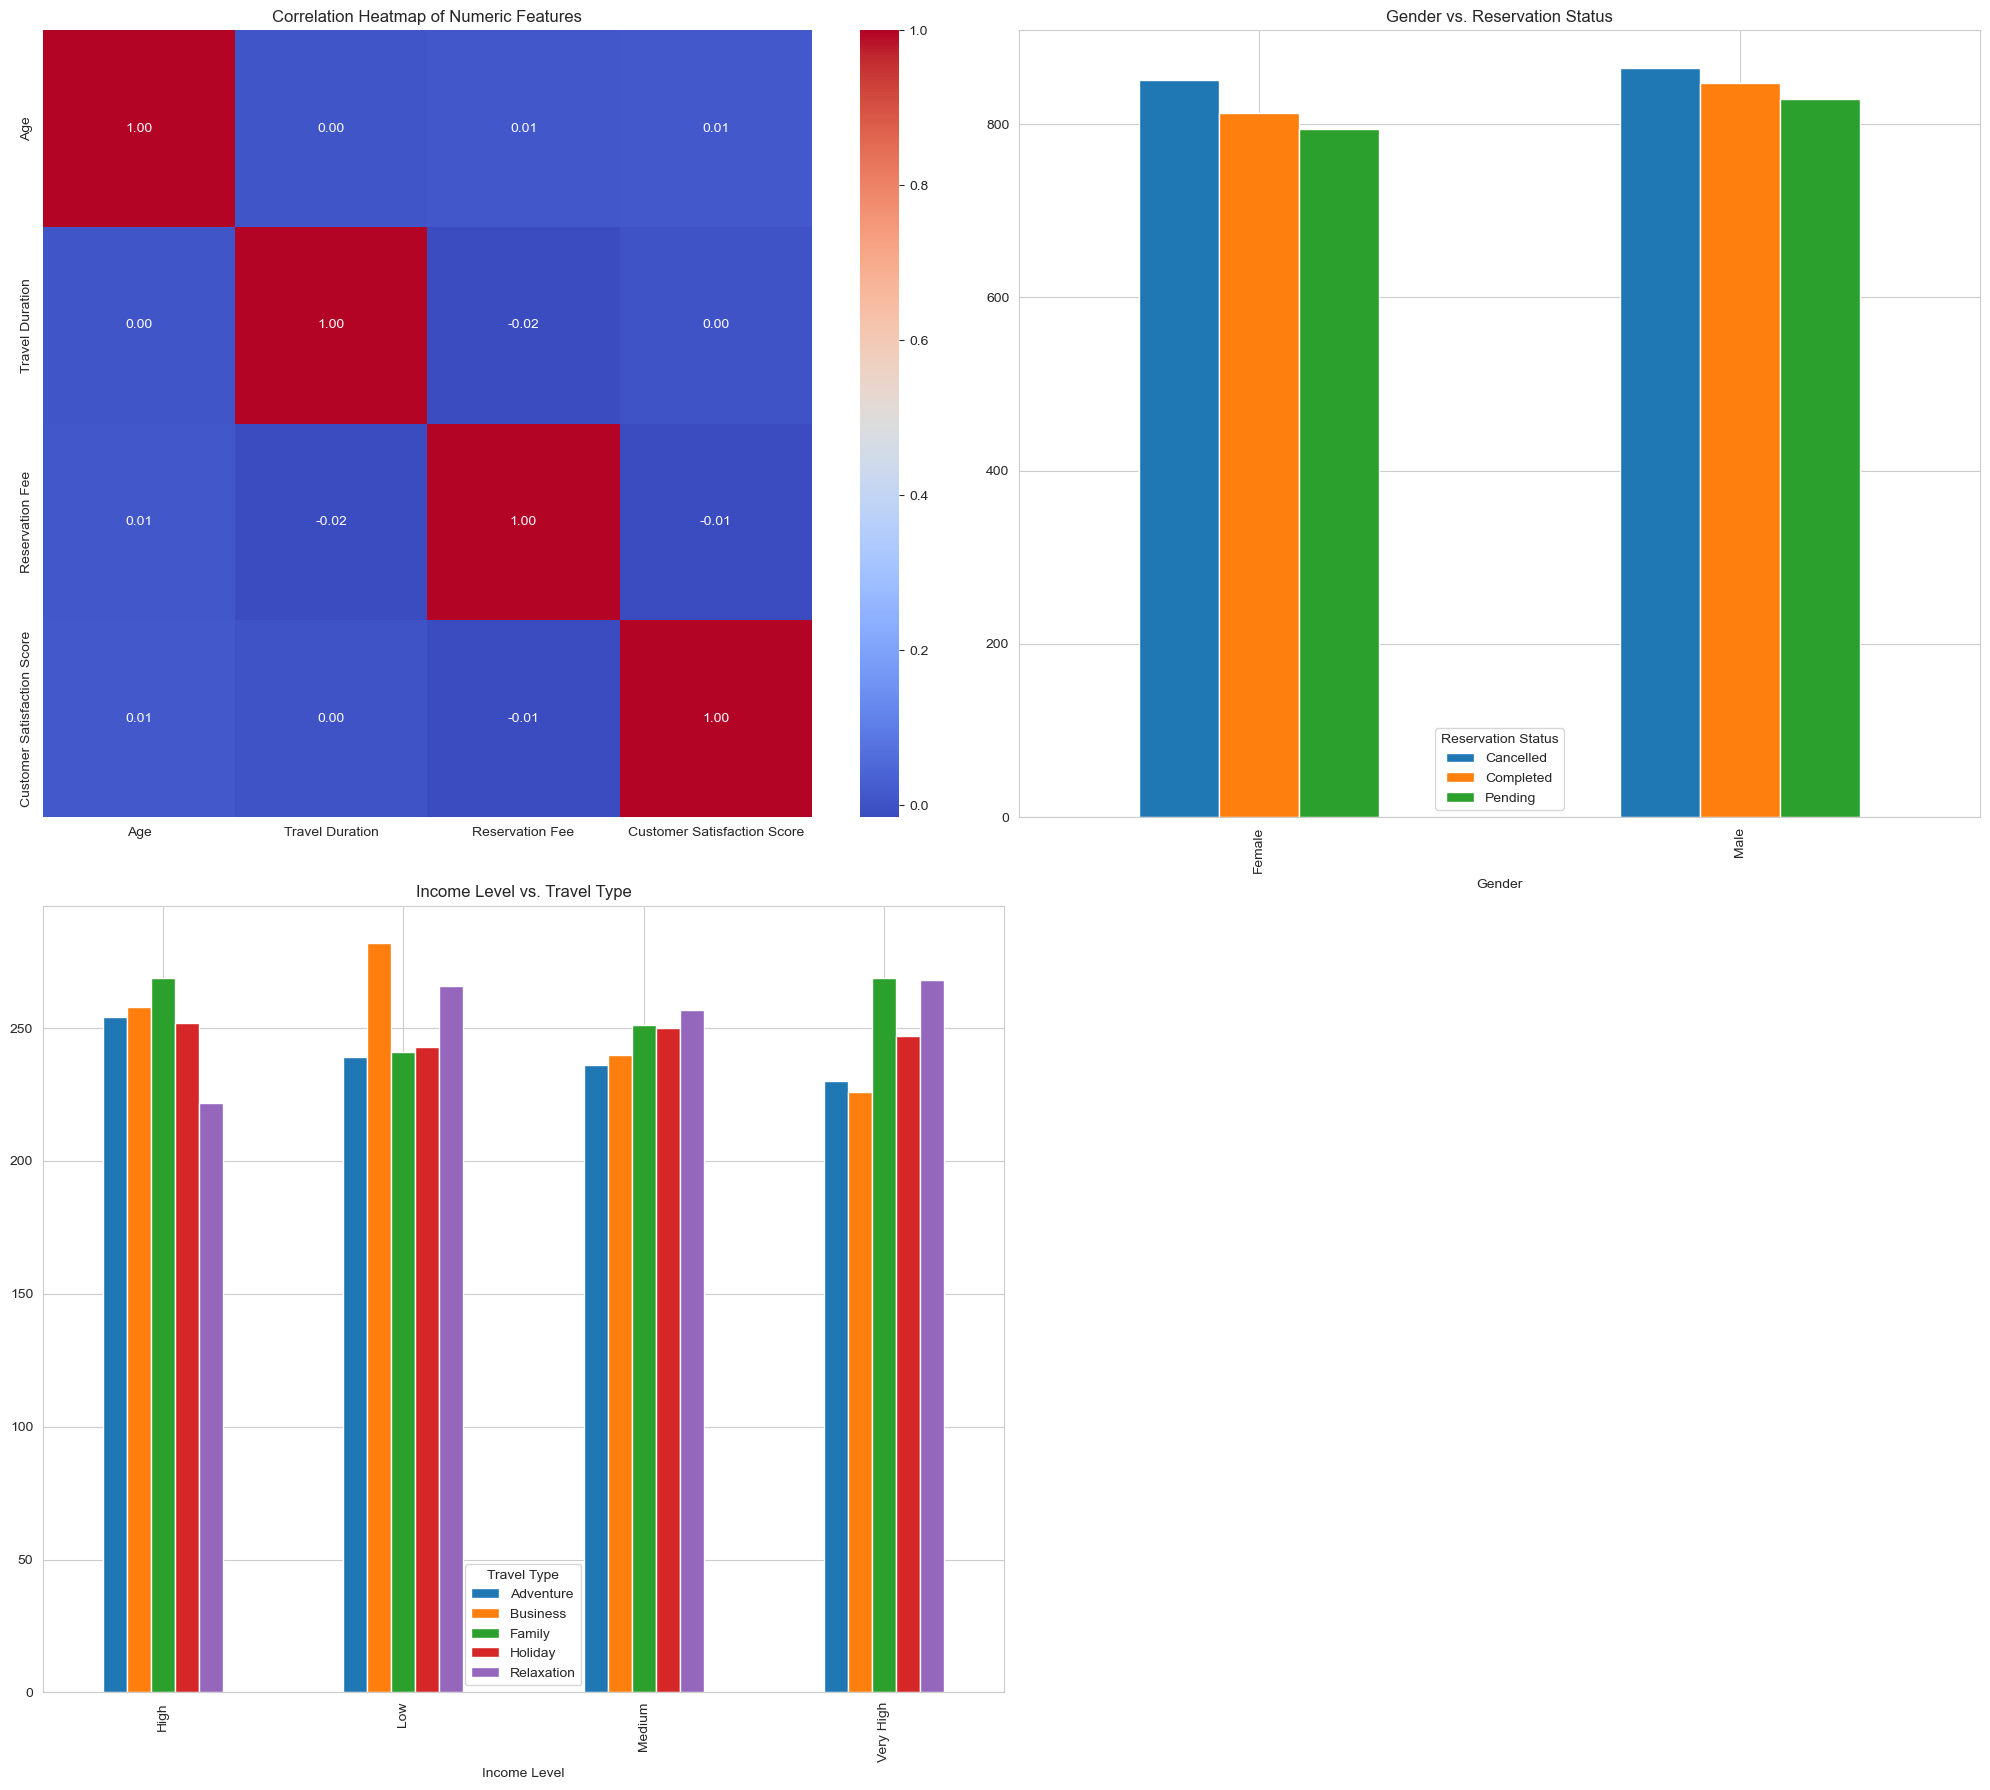

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

file_path = 'Dataset.csv'
datasetforplot = pd.read_csv(file_path)

# Set up the figure layout
plt.figure(figsize=(20, 18))

# Correlation Heatmap of Numeric Features
plt.subplot(2, 2, 1)  # 2x2 layout, position 1
correlation_matrix = datasetforplot.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Heatmap of Numeric Features')

# Cross-tabulation of Gender and Reservation Status
plt.subplot(2, 2, 2)  # 2x2 layout, position 2
gender_reservation_status = pd.crosstab(datasetforplot['Gender'], datasetforplot['Reservation Status'])
gender_reservation_status.plot(kind='bar', ax=plt.gca(), title='Gender vs. Reservation Status')

# Cross-tabulation of Income Level and Travel Type
plt.subplot(2, 2, 3)  # 2x2 layout, position 3
income_travel_type = pd.crosstab(datasetforplot['Income Level'], datasetforplot['Travel Type'])
income_travel_type.plot(kind='bar', ax=plt.gca(), title='Income Level vs. Travel Type')

plt.tight_layout()  # Adjust layout to not overlap
plt.show()


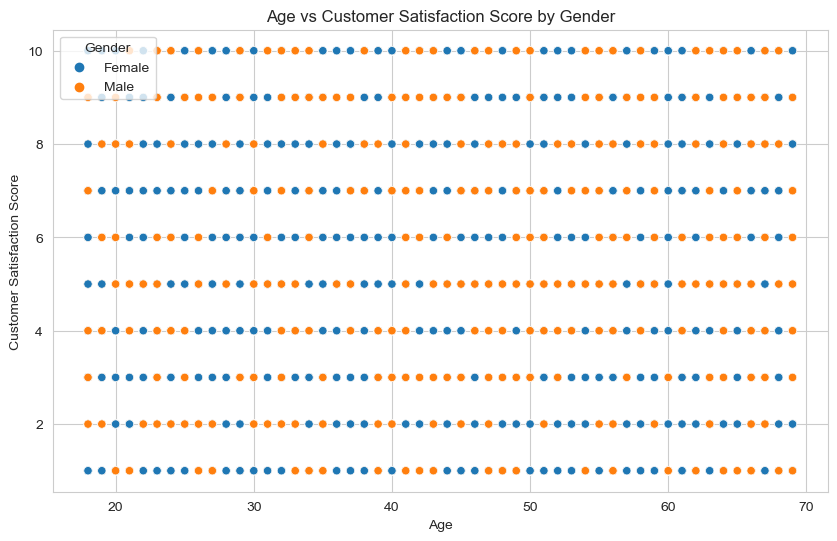

Chi-square test results:
P-value: 0.9069404903153854

Average Customer Satisfaction Score by Gender:
Gender
Female    5.408462
Male      5.500393
Name: Customer Satisfaction Score, dtype: float64


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Scatter plot for Age vs Customer Satisfaction Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Customer Satisfaction Score', hue='Gender', data=dataset)
plt.title('Age vs Customer Satisfaction Score by Gender')
plt.show()

# Chi-square test for association between Gender and Reservation Status
contingency_table = pd.crosstab(dataset['Gender'], dataset['Reservation Status'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print("Chi-square test results:\nP-value:", p_value)

# Grouping data by Gender to see average Customer Satisfaction Score
grouped_data = dataset.groupby('Gender')['Customer Satisfaction Score'].mean()
print("\nAverage Customer Satisfaction Score by Gender:")
print(grouped_data)


### 2.2 Analyzing the Relationship Between Cancelled Reservations and Customer Demographics

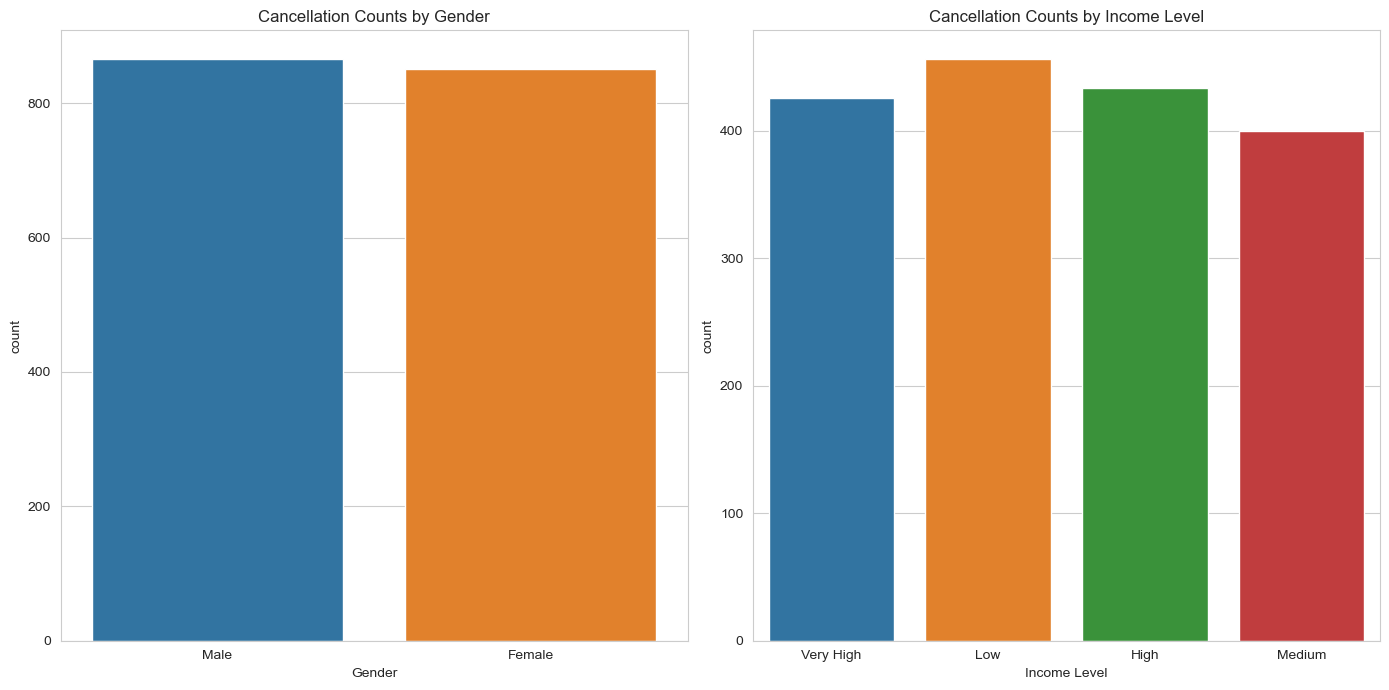

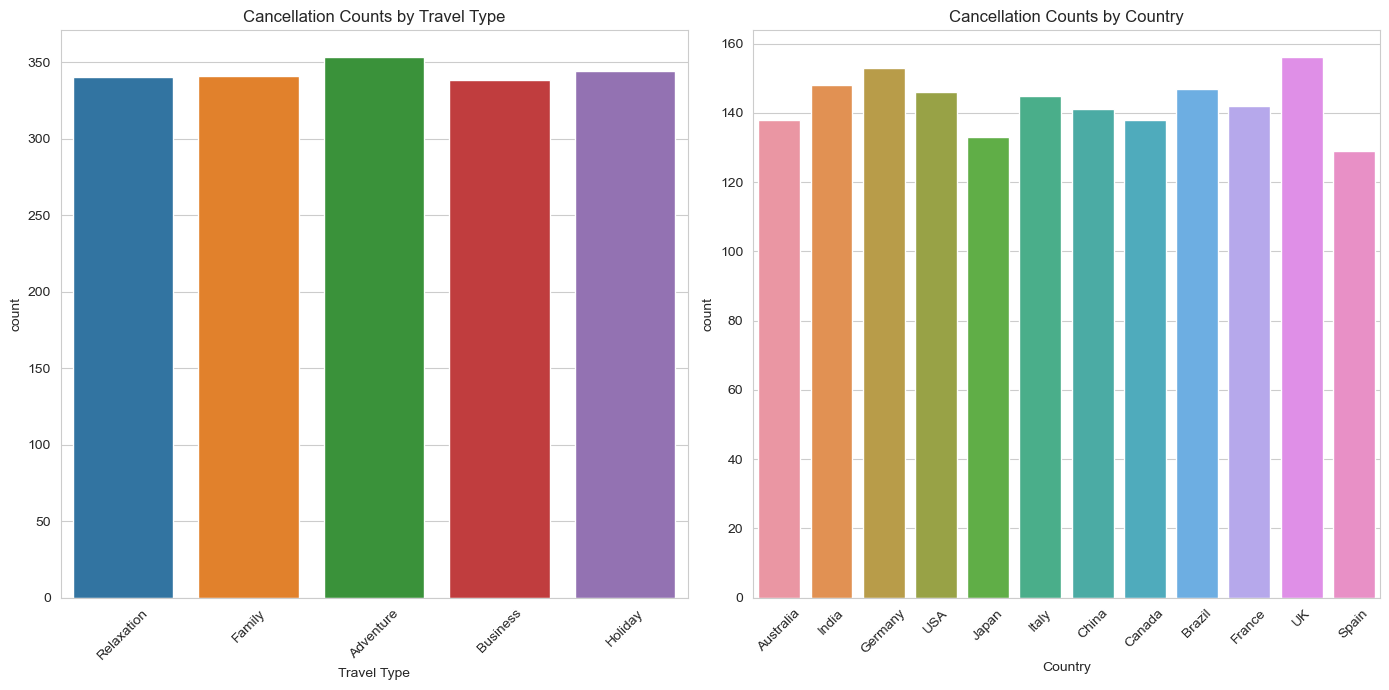

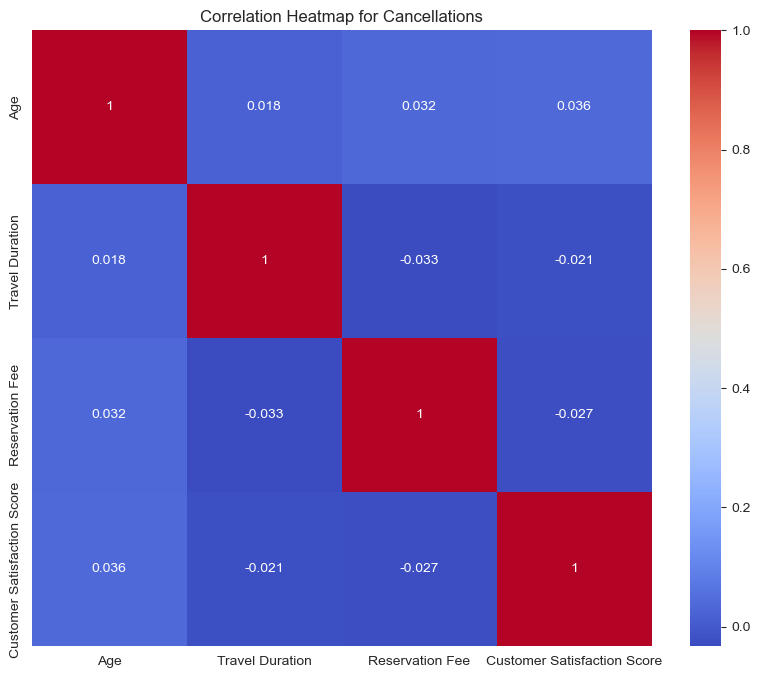

In [11]:
# Filter data for cancellations
cancellations = dataset[dataset['Reservation Status'] == 'Cancelled']

# 1. Cancellation Rates by Demographic Features
# Cancellation rates by Gender
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.countplot(x='Gender', data=cancellations)
plt.title('Cancellation Counts by Gender')

# Cancellation rates by Income Level
plt.subplot(1, 2, 2)
sns.countplot(x='Income Level', data=cancellations)
plt.title('Cancellation Counts by Income Level')

plt.tight_layout()
plt.show()

# 2. Cancellation Rates by Travel Characteristics
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.countplot(x='Travel Type', data=cancellations)
plt.title('Cancellation Counts by Travel Type')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.countplot(x='Country', data=cancellations)
plt.title('Cancellation Counts by Country')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 3. Heatmap of Cancellations by Numeric Variables
# Assuming numeric variables include 'Age', 'Travel Duration', 'Reservation Fee'
numeric_features = cancellations[['Age', 'Travel Duration', 'Reservation Fee', 'Customer Satisfaction Score']]
correlation_matrix = numeric_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap for Cancellations')
plt.show()


In [12]:
cancellations = dataset[dataset['Reservation Status'] == 'Cancelled']

# Cancellation Rates by Demographic Features
gender_counts = cancellations['Gender'].value_counts()
gender_percentage = (gender_counts / gender_counts.sum()) * 100

income_counts = cancellations['Income Level'].value_counts()
income_percentage = (income_counts / income_counts.sum()) * 100

# Cancellation Rates by Travel Characteristics
travel_type_counts = cancellations['Travel Type'].value_counts()
travel_type_percentage = (travel_type_counts / travel_type_counts.sum()) * 100

country_counts = cancellations['Country'].value_counts()
country_percentage = (country_counts / country_counts.sum()) * 100

# Correlation Matrix Calculation
numeric_features = cancellations[['Age', 'Travel Duration', 'Reservation Fee', 'Customer Satisfaction Score']]
correlation_matrix = numeric_features.corr()

# Display results as text
print("Cancellation Rates by Gender:")
print(gender_percentage)

print("\nCancellation Rates by Income Level:")
print(income_percentage)

print("\nCancellation Rates by Travel Type:")
print(travel_type_percentage)

print("\nCancellation Rates by Country:")
print(country_percentage)

print("\nCorrelation Matrix for Cancellations:")
print(correlation_matrix)

Cancellation Rates by Gender:
Male      50.407925
Female    49.592075
Name: Gender, dtype: float64

Cancellation Rates by Income Level:
Low          26.573427
High         25.291375
Very High    24.825175
Medium       23.310023
Name: Income Level, dtype: float64

Cancellation Rates by Travel Type:
Adventure     20.571096
Holiday       20.046620
Family        19.871795
Relaxation    19.813520
Business      19.696970
Name: Travel Type, dtype: float64

Cancellation Rates by Country:
UK           9.090909
Germany      8.916084
India        8.624709
Brazil       8.566434
USA          8.508159
Italy        8.449883
France       8.275058
China        8.216783
Australia    8.041958
Canada       8.041958
Japan        7.750583
Spain        7.517483
Name: Country, dtype: float64

Correlation Matrix for Cancellations:
                                  Age  Travel Duration  Reservation Fee  \
Age                          1.000000         0.018440         0.032155   
Travel Duration              0.0

### 2.3 Analyzing the Rezervation Trends

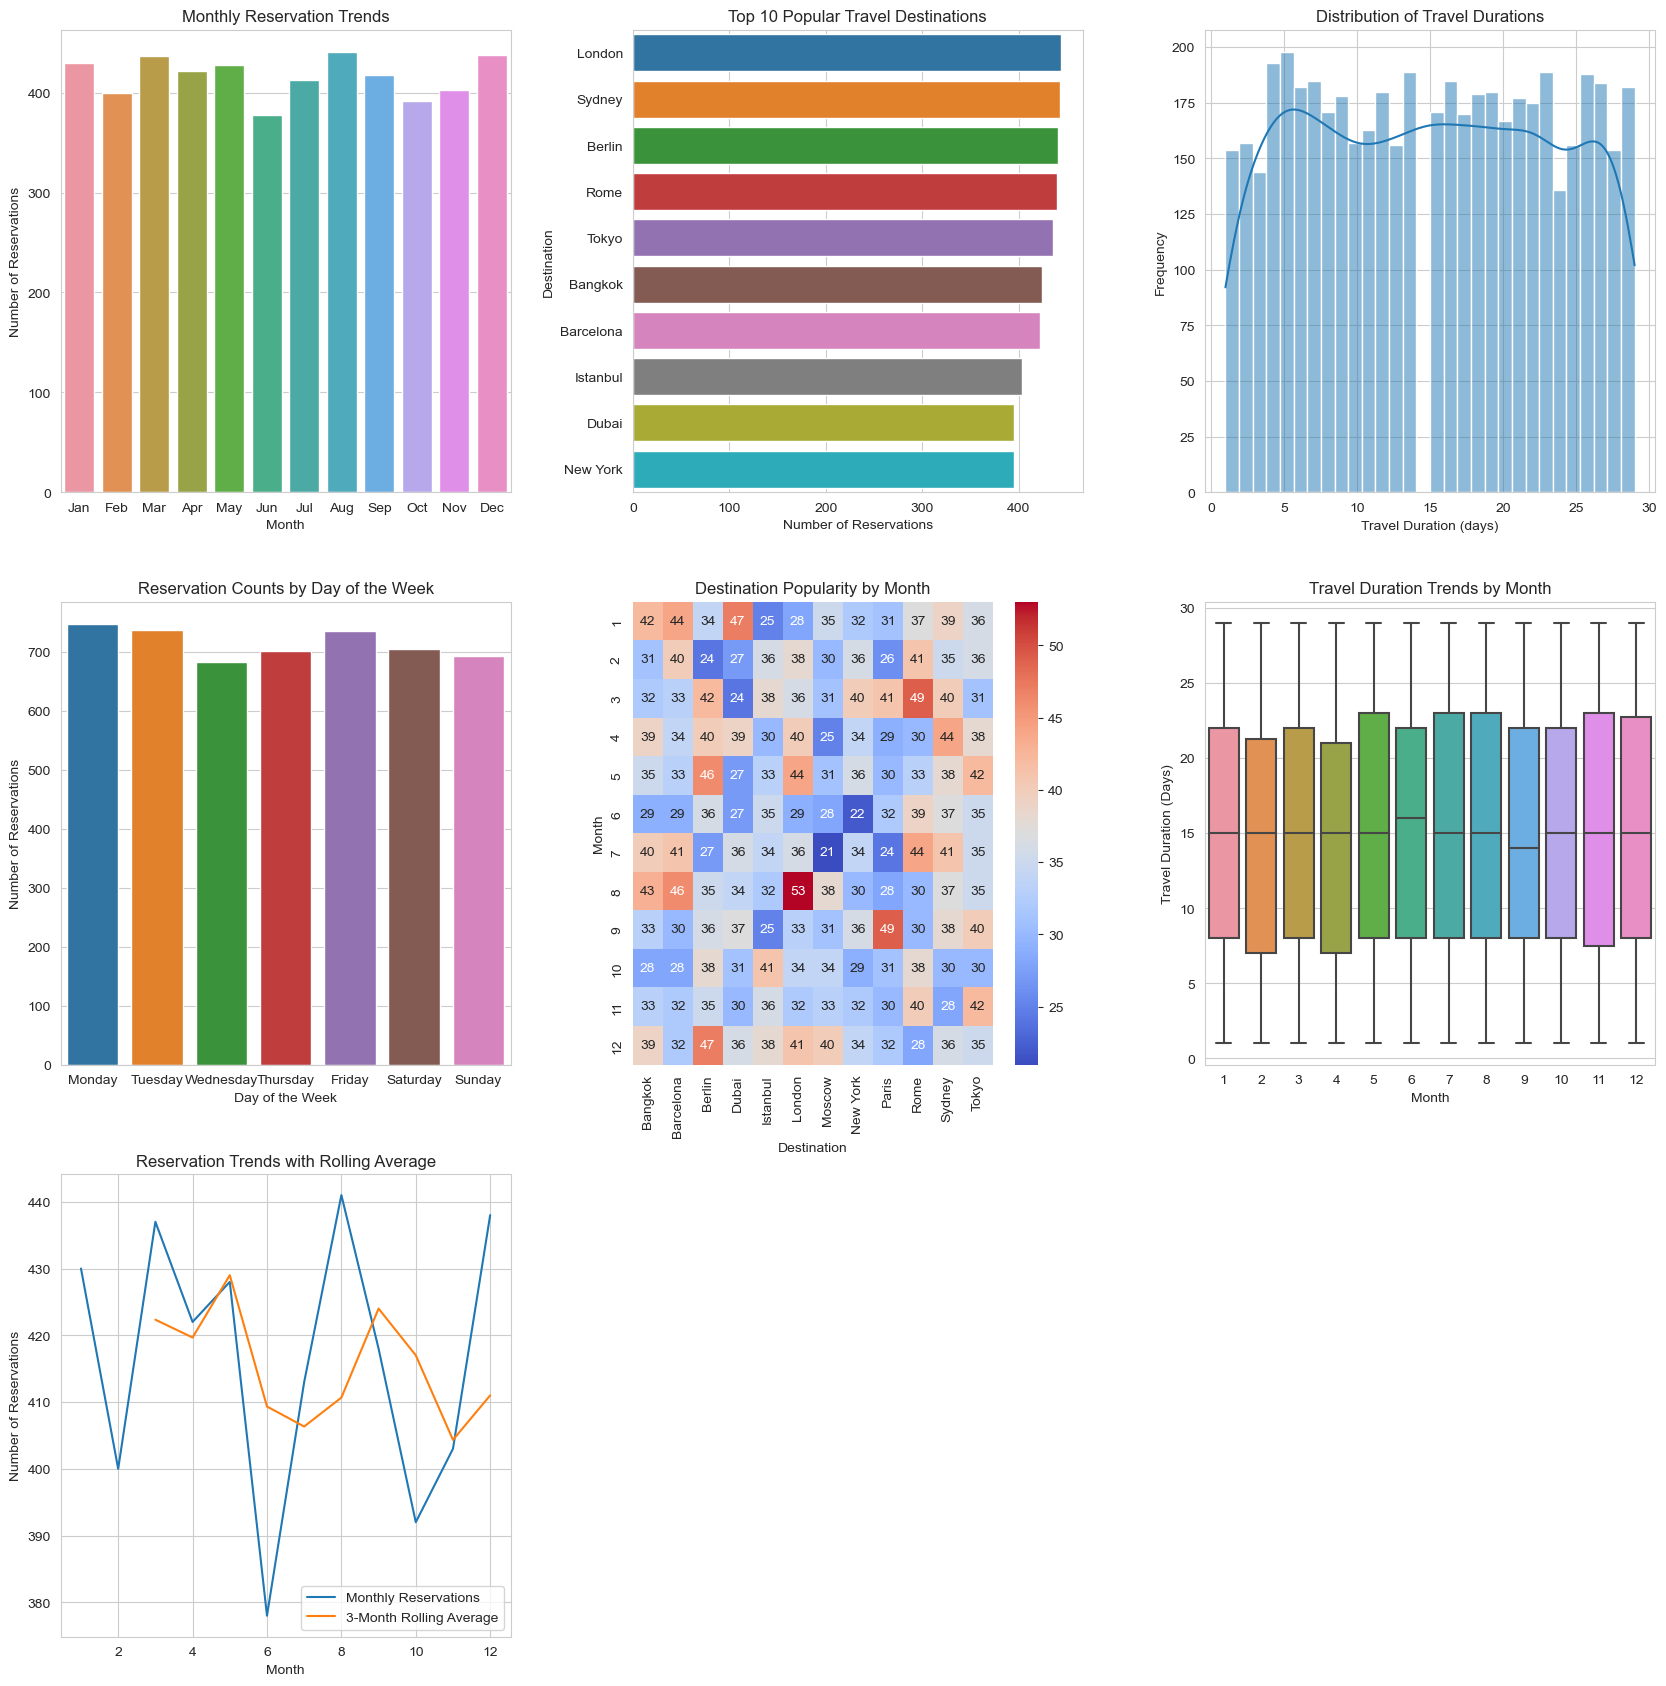

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming dataset is a DataFrame that contains the necessary columns
# Convert 'Reservation Date' to datetime format for seasonality analysis
dataset['Reservation Date'] = pd.to_datetime(dataset['Reservation Date'])
dataset['Month'] = dataset['Reservation Date'].dt.month
dataset['Day of Week'] = dataset['Reservation Date'].dt.day_name()

# Prepare data for plotting
monthly_reservations = dataset['Month'].value_counts().sort_index()
destination_counts = dataset['Travel Destination'].value_counts().nlargest(10)
day_of_week_counts = dataset['Day of Week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
month_destination_pivot = pd.pivot_table(data=dataset, index='Month', columns='Travel Destination', values='Reservation Fee', aggfunc='count', fill_value=0)
rolling_avg = monthly_reservations.rolling(window=3).mean()

# Plotting in a 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(18, 18))
fig.tight_layout(pad=6.0)

# 1. Monthly Reservation Trends
sns.barplot(x=monthly_reservations.index, y=monthly_reservations.values, ax=axes[0, 0])
axes[0, 0].set_title('Monthly Reservation Trends')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Number of Reservations')
axes[0, 0].set_xticks(range(12))
axes[0, 0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# 2. Top 10 Popular Travel Destinations
sns.barplot(x=destination_counts.values, y=destination_counts.index, ax=axes[0, 1])
axes[0, 1].set_title('Top 10 Popular Travel Destinations')
axes[0, 1].set_xlabel('Number of Reservations')
axes[0, 1].set_ylabel('Destination')

# 3. Distribution of Travel Durations
sns.histplot(dataset['Travel Duration'], bins=30, kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Distribution of Travel Durations')
axes[0, 2].set_xlabel('Travel Duration (days)')
axes[0, 2].set_ylabel('Frequency')

# 4. Reservation Counts by Day of the Week
sns.barplot(x=day_of_week_counts.index, y=day_of_week_counts.values, ax=axes[1, 0])
axes[1, 0].set_title('Reservation Counts by Day of the Week')
axes[1, 0].set_xlabel('Day of the Week')
axes[1, 0].set_ylabel('Number of Reservations')

# 5. Destination Popularity by Month
sns.heatmap(month_destination_pivot, cmap='coolwarm', annot=True, ax=axes[1, 1])
axes[1, 1].set_title('Destination Popularity by Month')
axes[1, 1].set_xlabel('Destination')
axes[1, 1].set_ylabel('Month')

# 6. Travel Duration Trends by Month
sns.boxplot(x='Month', y='Travel Duration', data=dataset, ax=axes[1, 2])
axes[1, 2].set_title('Travel Duration Trends by Month')
axes[1, 2].set_xlabel('Month')
axes[1, 2].set_ylabel('Travel Duration (Days)')

# 7. Reservation Trends with Rolling Average
sns.lineplot(x=monthly_reservations.index, y=monthly_reservations.values, label='Monthly Reservations', ax=axes[2, 0])
sns.lineplot(x=rolling_avg.index, y=rolling_avg.values, label='3-Month Rolling Average', ax=axes[2, 0])
axes[2, 0].set_title('Reservation Trends with Rolling Average')
axes[2, 0].set_xlabel('Month')
axes[2, 0].set_ylabel('Number of Reservations')
axes[2, 0].legend()

# Hide the empty subplots
for ax in [axes[2, 1], axes[2, 2]]:
    ax.axis('off')

plt.show()


In [14]:
# 1. Seasonality in Reservations
monthly_reservations = dataset['Month'].value_counts().sort_index()
print("Monthly Reservation Trends:")
for month, count in zip(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], monthly_reservations):
    print(f"{month}: {count} reservations")

# 2. Popular Travel Destinations
destination_counts = dataset['Travel Destination'].value_counts().nlargest(10)
print("\nTop 10 Popular Travel Destinations:")
for destination, count in destination_counts.items():
    print(f"{destination}: {count} reservations")

# 3. Preferred Travel Durations
print("\nDistribution of Travel Durations (summary):")
print(dataset['Travel Duration'].describe())

# 4. Day of Week Analysis
day_of_week_counts = dataset['Day of Week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
print("\nReservation Counts by Day of the Week:")
for day, count in day_of_week_counts.items():
    print(f"{day}: {count} reservations")

# 5. Destination Popularity by Season
month_destination_pivot = pd.pivot_table(data=dataset, index='Month', columns='Travel Destination', values='Reservation Fee', aggfunc='count', fill_value=0)
print("\nDestination Popularity by Month:")
print(month_destination_pivot)

# 6. Travel Duration Trends by Month
print("\nTravel Duration Trends by Month (medians):")
month_duration_medians = dataset.groupby('Month')['Travel Duration'].median()
for month, median in month_duration_medians.items():
    print(f"Month {month}: Median duration is {median} days")

# 7. Trend Lines with Rolling Averages
rolling_avg = monthly_reservations.rolling(window=3).mean()
print("\nReservation Trends with Rolling Average:")
for month, (res_count, roll_avg) in enumerate(zip(monthly_reservations, rolling_avg), 1):
    print(f"Month {month}: {res_count} reservations, 3-month rolling average: {roll_avg}")

# Ensure dataset is correctly loaded and transformed where necessary.


Monthly Reservation Trends:
Jan: 430 reservations
Feb: 400 reservations
Mar: 437 reservations
Apr: 422 reservations
May: 428 reservations
Jun: 378 reservations
Jul: 413 reservations
Aug: 441 reservations
Sep: 418 reservations
Oct: 392 reservations
Nov: 403 reservations
Dec: 438 reservations

Top 10 Popular Travel Destinations:
London: 444 reservations
Sydney: 443 reservations
Berlin: 440 reservations
Rome: 439 reservations
Tokyo: 435 reservations
Bangkok: 424 reservations
Barcelona: 422 reservations
Istanbul: 403 reservations
Dubai: 395 reservations
New York: 395 reservations

Distribution of Travel Durations (summary):
count    5000.000000
mean       15.027400
std         8.308288
min         1.000000
25%         8.000000
50%        15.000000
75%        22.000000
max        29.000000
Name: Travel Duration, dtype: float64

Reservation Counts by Day of the Week:
Monday: 747 reservations
Tuesday: 737 reservations
Wednesday: 683 reservations
Thursday: 701 reservations
Friday: 735 reservat

## 3. Segmentation and Customer Profiling
Feature Selection: Choose the relevant features for clustering.
Data Preprocessing: Normalize the data to ensure all features contribute equally to the clustering process.
Determine the Optimal Number of Clusters: Use methods such as the Elbow Method to determine the optimal number of clusters.
Apply K-Means Clustering: Segment the customers based on the chosen features.
Analyze and Interpret the Clusters: Understand the characteristics of each segment.


### K-Means Clustering

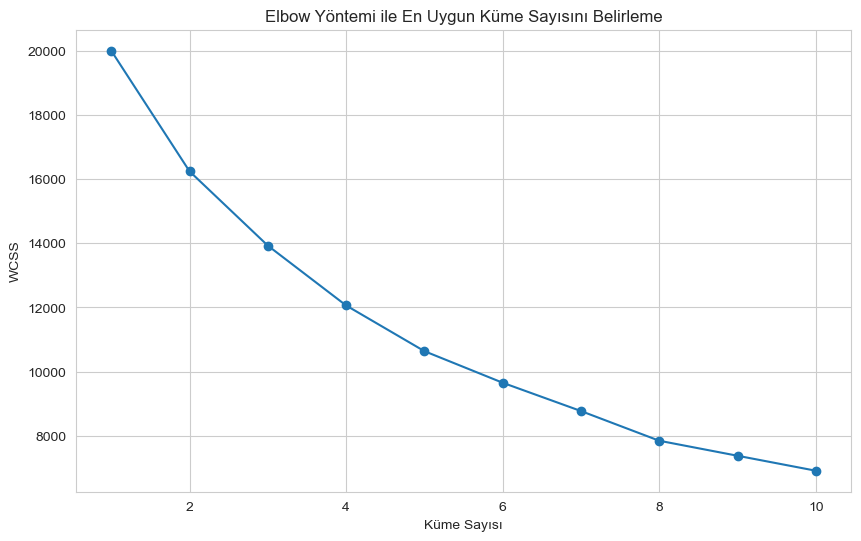

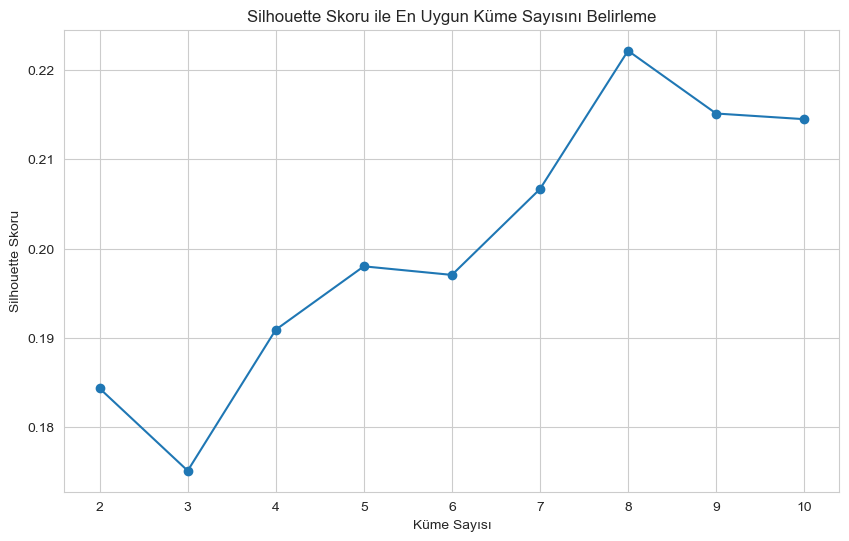

Cluster-Specific Statistics:
  Cluster        Age                   Travel Duration                   \
                mean median        std            mean median       std   
0       0  57.052527   58.0   9.019831       19.787909   21.0  6.708249   
1       1  32.269511   31.0   9.785682        8.825182    8.0  5.759650   
2       2  53.737983   56.0  11.127272        8.556079    8.0  5.462385   
3       3  35.654088   34.0  11.669363       22.306080   23.0  5.035303   
4       4  37.359606   36.0  12.573011       16.090640   16.0  7.439146   

  Reservation Fee                       Customer Satisfaction Score         \
             mean   median          std                        mean median   
0     7050.621041  7355.46  2030.465636                    4.068385    4.0   
1     7518.990114  7857.18  1729.461272                    4.853278    5.0   
2     3646.563468  3356.74  2326.567861                    7.483506    8.0   
3     4662.700503  4725.32  2558.115183                

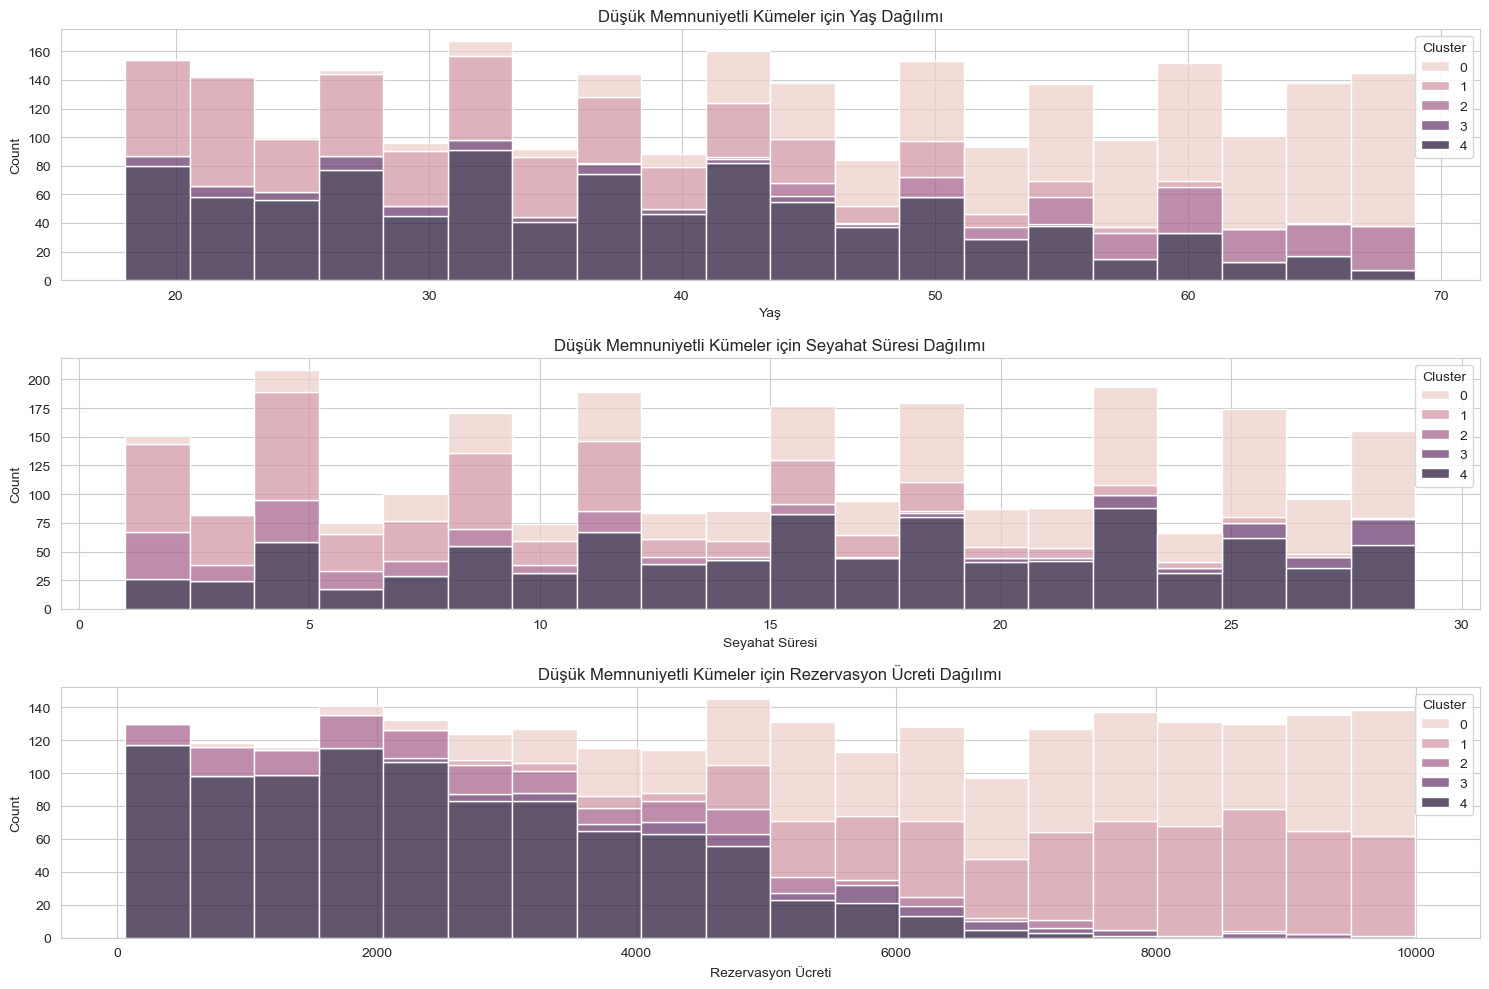

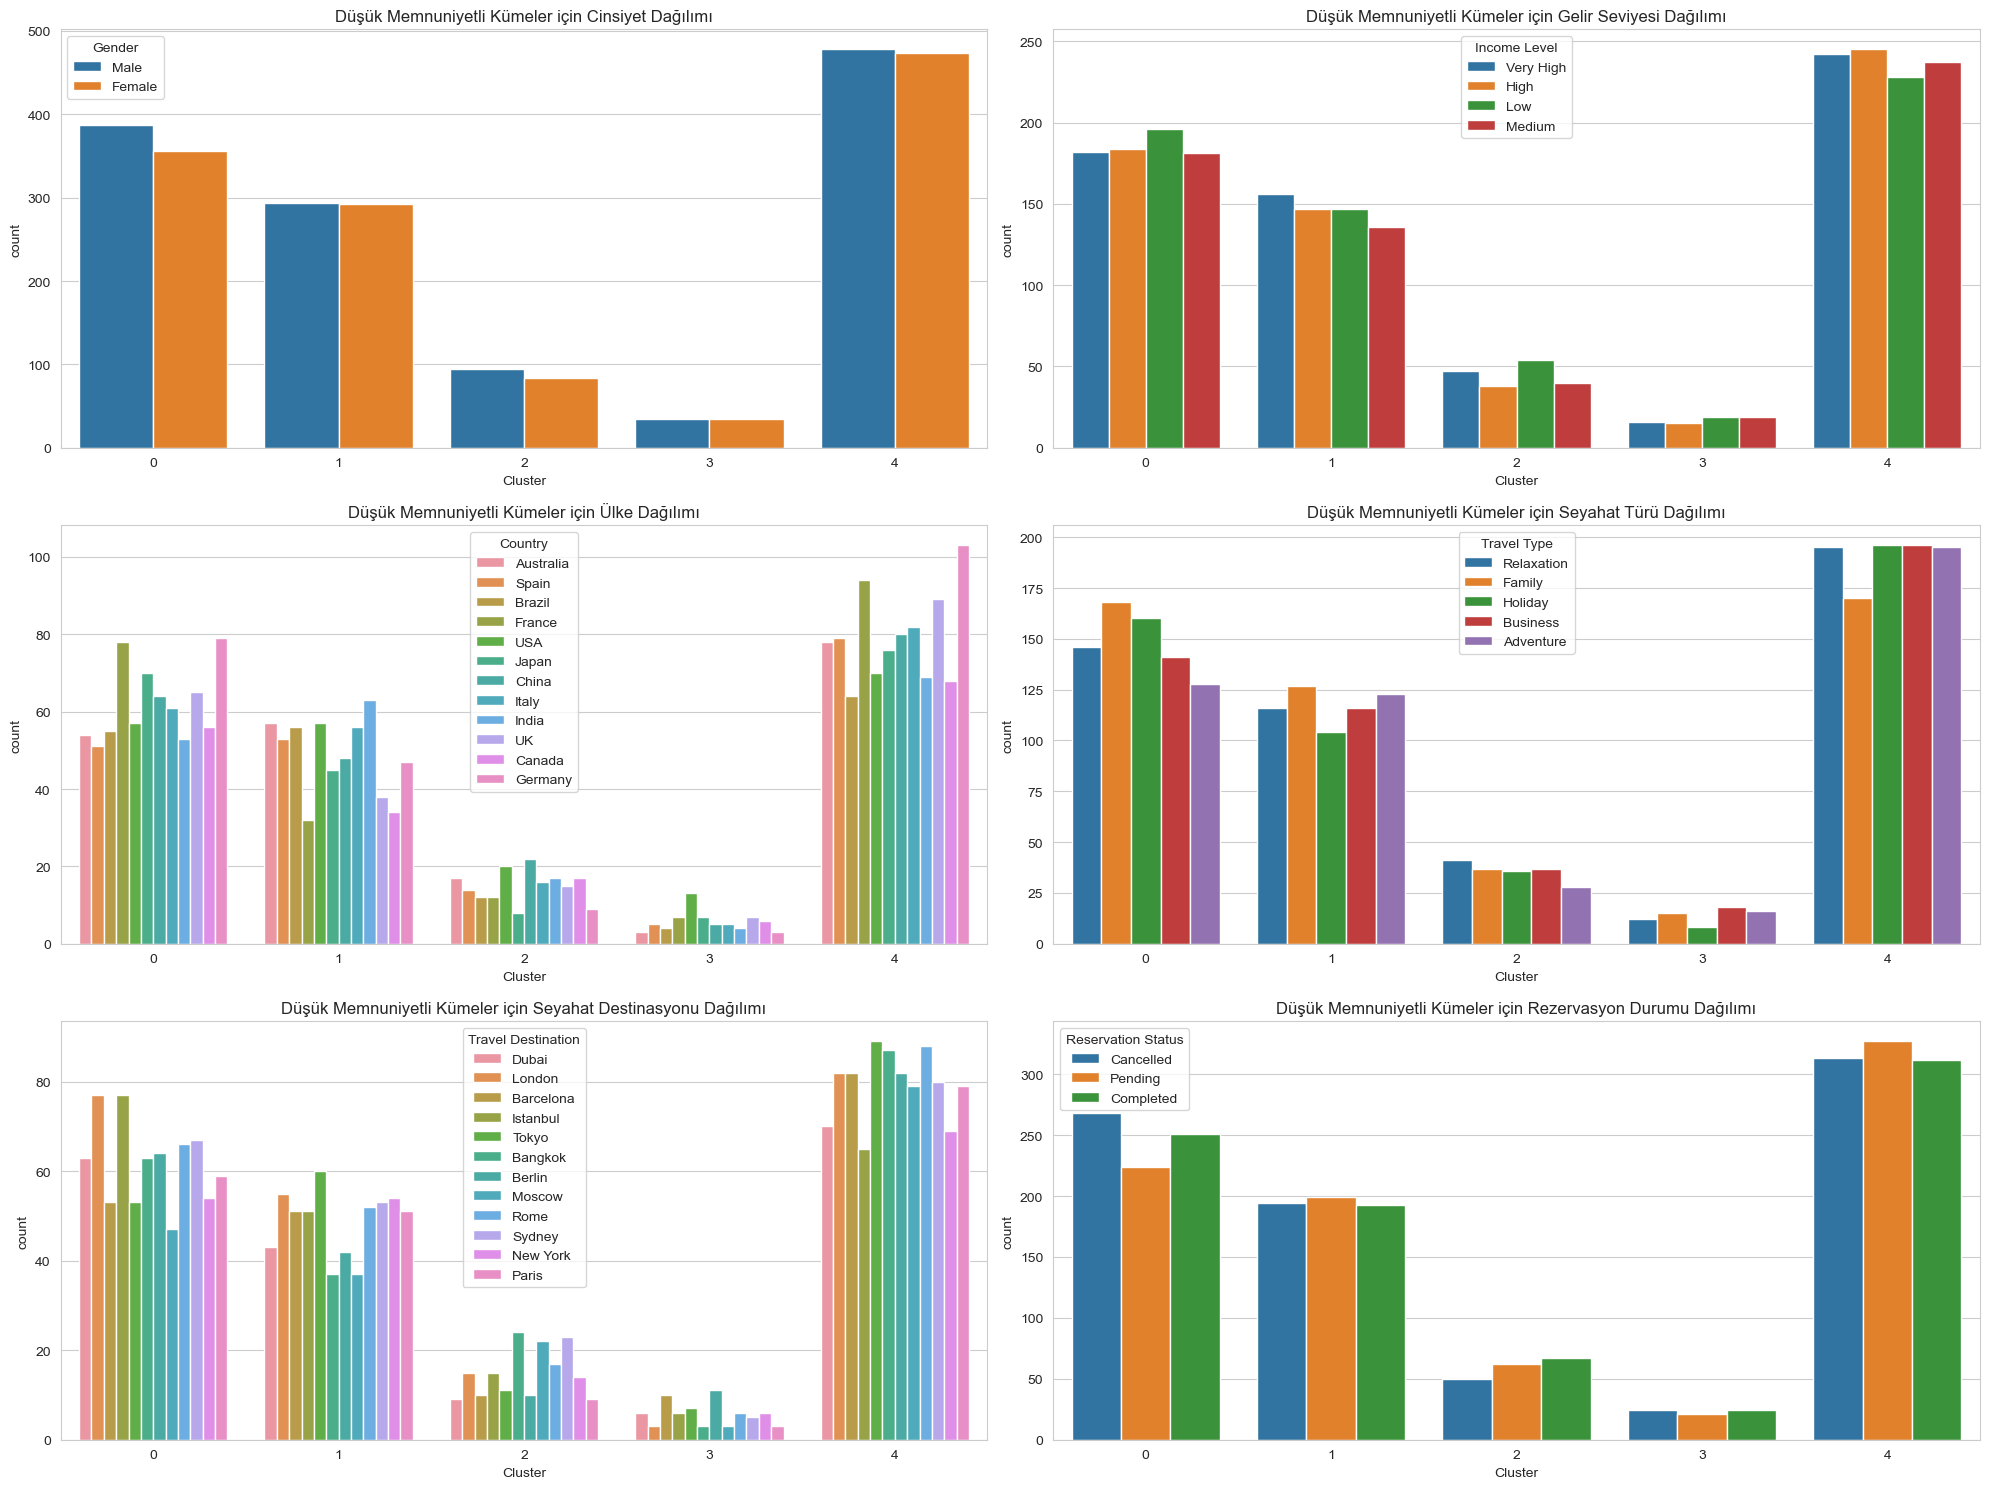

Cluster 1 Analysis:
               Age  Travel Duration  Reservation Fee  \
count  1009.000000      1009.000000      1009.000000   
mean     57.052527        19.787909      7050.621041   
std       9.019831         6.708249      2030.465636   
min      25.000000         1.000000       907.930000   
25%      52.000000        15.000000      5580.900000   
50%      58.000000        21.000000      7355.460000   
75%      64.000000        25.000000      8720.700000   
max      69.000000        29.000000      9998.030000   

       Customer Satisfaction Score        Month  Cluster  
count                  1009.000000  1009.000000   1009.0  
mean                      4.068385     6.301288      0.0  
std                       2.352869     3.471312      0.0  
min                       1.000000     1.000000      0.0  
25%                       2.000000     3.000000      0.0  
50%                       4.000000     6.000000      0.0  
75%                       6.000000     9.000000      0.0  
max

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Kümeleme için özellikleri seçme
features = dataset[['Age', 'Travel Duration', 'Reservation Fee', 'Customer Satisfaction Score']]

# Veriyi normalize etme
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Elbow Method ile en uygun küme sayısını belirleme
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Elbow Method Grafiği
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Yöntemi ile En Uygun Küme Sayısını Belirleme')
plt.xlabel('Küme Sayısı')
plt.ylabel('WCSS')
plt.show()

# Silhouette Skoru ile en uygun küme sayısını belirleme
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Silhouette Skoru Grafiği
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Skoru ile En Uygun Küme Sayısını Belirleme')
plt.xlabel('Küme Sayısı')
plt.ylabel('Silhouette Skoru')
plt.show()

# Optimal küme sayısını belirleme
optimal_n_clusters = 5  # Dirsek Yöntemi ve Silhouette Skoru'na göre belirlenen optimal küme sayısı
kmeans = KMeans(n_clusters=optimal_n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Orijinal veri setine küme etiketlerini ekleme
dataset['Cluster'] = clusters

# Her küme için özet istatistikleri hesaplama
cluster_summary = dataset.groupby('Cluster').agg({
    'Age': ['mean', 'median', 'std'],
    'Travel Duration': ['mean', 'median', 'std'],
    'Reservation Fee': ['mean', 'median', 'std'],
    'Customer Satisfaction Score': ['mean', 'median', 'std'],
    'Gender': lambda x: x.value_counts().index[0],
    'Income Level': lambda x: x.value_counts().index[0],
    'Country': lambda x: x.value_counts().index[0],
    'Travel Type': lambda x: x.value_counts().index[0],
    'Travel Destination': lambda x: x.value_counts().index[0],
    'Reservation Status': lambda x: x.value_counts().index[0]
}).reset_index()

print("Cluster-Specific Statistics:")
print(cluster_summary)

# Düşük memnuniyetli kümeleri belirleme
low_satisfaction_clusters = dataset[dataset['Customer Satisfaction Score'] <= 5]

# Sayısal özelliklerin dağılımını görselleştirme
plt.figure(figsize=(15, 10))

# Age dağılımı
plt.subplot(3, 1, 1)
sns.histplot(data=low_satisfaction_clusters, x='Age', hue='Cluster', multiple='stack', bins=20)
plt.title('Düşük Memnuniyetli Kümeler için Yaş Dağılımı')
plt.xlabel('Yaş')
plt.ylabel('Count')

# Travel Duration dağılımı
plt.subplot(3, 1, 2)
sns.histplot(data=low_satisfaction_clusters, x='Travel Duration', hue='Cluster', multiple='stack', bins=20)
plt.title('Düşük Memnuniyetli Kümeler için Seyahat Süresi Dağılımı')
plt.xlabel('Seyahat Süresi')
plt.ylabel('Count')

# Reservation Fee dağılımı
plt.subplot(3, 1, 3)
sns.histplot(data=low_satisfaction_clusters, x='Reservation Fee', hue='Cluster', multiple='stack', bins=20)
plt.title('Düşük Memnuniyetli Kümeler için Rezervasyon Ücreti Dağılımı')
plt.xlabel('Rezervasyon Ücreti')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Kategorik özelliklerin dağılımını görselleştirme
plt.figure(figsize=(20, 15))

# Gender dağılımı
plt.subplot(3, 2, 1)
sns.countplot(x='Cluster', hue='Gender', data=low_satisfaction_clusters)
plt.title('Düşük Memnuniyetli Kümeler için Cinsiyet Dağılımı')

# Income Level dağılımı
plt.subplot(3, 2, 2)
sns.countplot(x='Cluster', hue='Income Level', data=low_satisfaction_clusters)
plt.title('Düşük Memnuniyetli Kümeler için Gelir Seviyesi Dağılımı')

# Country dağılımı
plt.subplot(3, 2, 3)
sns.countplot(x='Cluster', hue='Country', data=low_satisfaction_clusters)
plt.title('Düşük Memnuniyetli Kümeler için Ülke Dağılımı')

# Travel Type dağılımı
plt.subplot(3, 2, 4)
sns.countplot(x='Cluster', hue='Travel Type', data=low_satisfaction_clusters)
plt.title('Düşük Memnuniyetli Kümeler için Seyahat Türü Dağılımı')

# Travel Destination dağılımı
plt.subplot(3, 2, 5)
sns.countplot(x='Cluster', hue='Travel Destination', data=low_satisfaction_clusters)
plt.title('Düşük Memnuniyetli Kümeler için Seyahat Destinasyonu Dağılımı')

# Reservation Status dağılımı
plt.subplot(3, 2, 6)
sns.countplot(x='Cluster', hue='Reservation Status', data=low_satisfaction_clusters)
plt.title('Düşük Memnuniyetli Kümeler için Rezervasyon Durumu Dağılımı')

plt.tight_layout()
plt.show()

# Cluster 1,2,3,4 ,5 için analiz
cluster_1 = dataset[dataset['Cluster'] == 0]
print("Cluster 1 Analysis:")
print(cluster_1.describe())
print(cluster_1['Gender'].value_counts())
print(cluster_1['Income Level'].value_counts())
print(cluster_1['Country'].value_counts())
print(cluster_1['Travel Type'].value_counts())
print(cluster_1['Travel Destination'].value_counts())
print(cluster_1['Reservation Status'].value_counts())

cluster_2 = dataset[dataset['Cluster'] == 1]
print("Cluster 2 Analysis:")
print(cluster_2.describe())
print(cluster_2['Gender'].value_counts())
print(cluster_2['Income Level'].value_counts())
print(cluster_2['Country'].value_counts())
print(cluster_2['Travel Type'].value_counts())
print(cluster_2['Travel Destination'].value_counts())
print(cluster_2['Reservation Status'].value_counts())

cluster_3 = dataset[dataset['Cluster'] == 2]
print("Cluster 3 Analysis:")
print(cluster_3.describe())
print(cluster_3['Gender'].value_counts())
print(cluster_3['Income Level'].value_counts())
print(cluster_3['Country'].value_counts())
print(cluster_3['Travel Type'].value_counts())
print(cluster_3['Travel Destination'].value_counts())
print(cluster_3['Reservation Status'].value_counts())

cluster_4 = dataset[dataset['Cluster'] == 3]
print("Cluster 4 Analysis:")
print(cluster_4.describe())
print(cluster_4['Gender'].value_counts())
print(cluster_4['Income Level'].value_counts())
print(cluster_4['Country'].value_counts())
print(cluster_4['Travel Type'].value_counts())
print(cluster_4['Travel Destination'].value_counts())
print(cluster_4['Reservation Status'].value_counts())

cluster_5 = dataset[dataset['Cluster'] == 4]
print("Cluster 5 Analysis:")
print(cluster_5.describe())
print(cluster_5['Gender'].value_counts())
print(cluster_5['Income Level'].value_counts())
print(cluster_5['Country'].value_counts())
print(cluster_5['Travel Type'].value_counts())
print(cluster_5['Travel Destination'].value_counts())
print(cluster_5['Reservation Status'].value_counts())

Cluster 1 Detailed Analysis:
     Gender Income Level    Country Travel Type Travel Destination  \
0    Female         High  Australia   Adventure           New York   
1    Female         High  Australia    Business              Tokyo   
2    Female         High  Australia      Family          Barcelona   
3    Female         High  Australia     Holiday             London   
4    Female         High  Australia  Relaxation            Bangkok   
..      ...          ...        ...         ...                ...   
975    Male    Very High        USA      Family             Moscow   
976    Male    Very High        USA      Family               Rome   
977    Male    Very High        USA      Family             Sydney   
978    Male    Very High        USA     Holiday             Berlin   
979    Male    Very High        USA  Relaxation              Dubai   

    Reservation Status  Counts  
0              Pending       1  
1              Pending       1  
2            Completed       1 

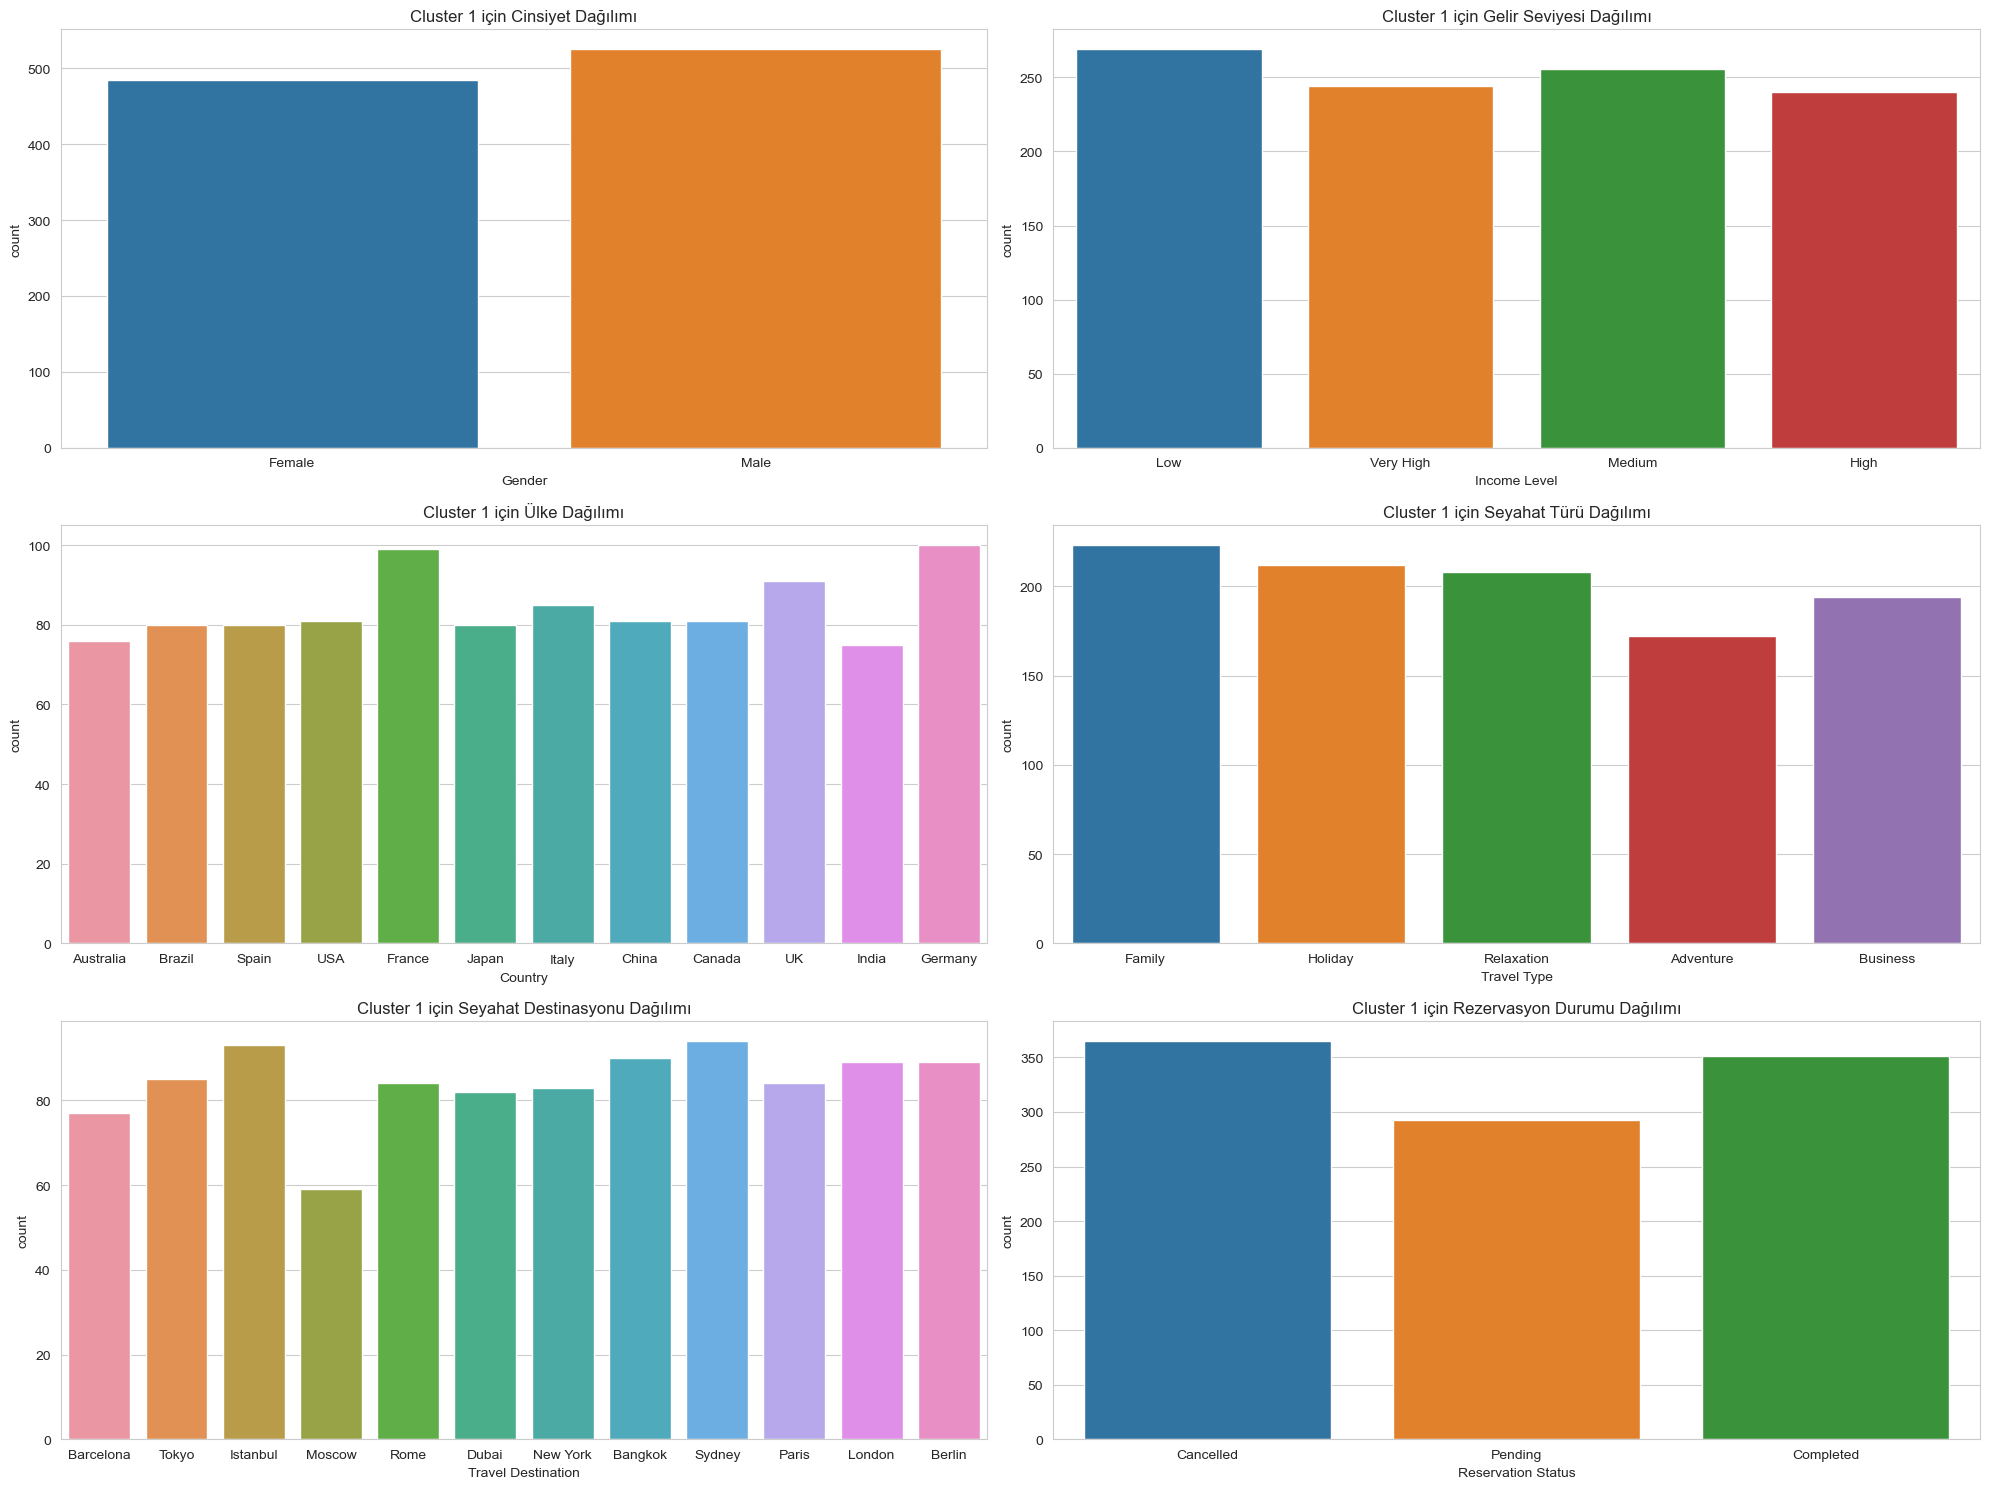

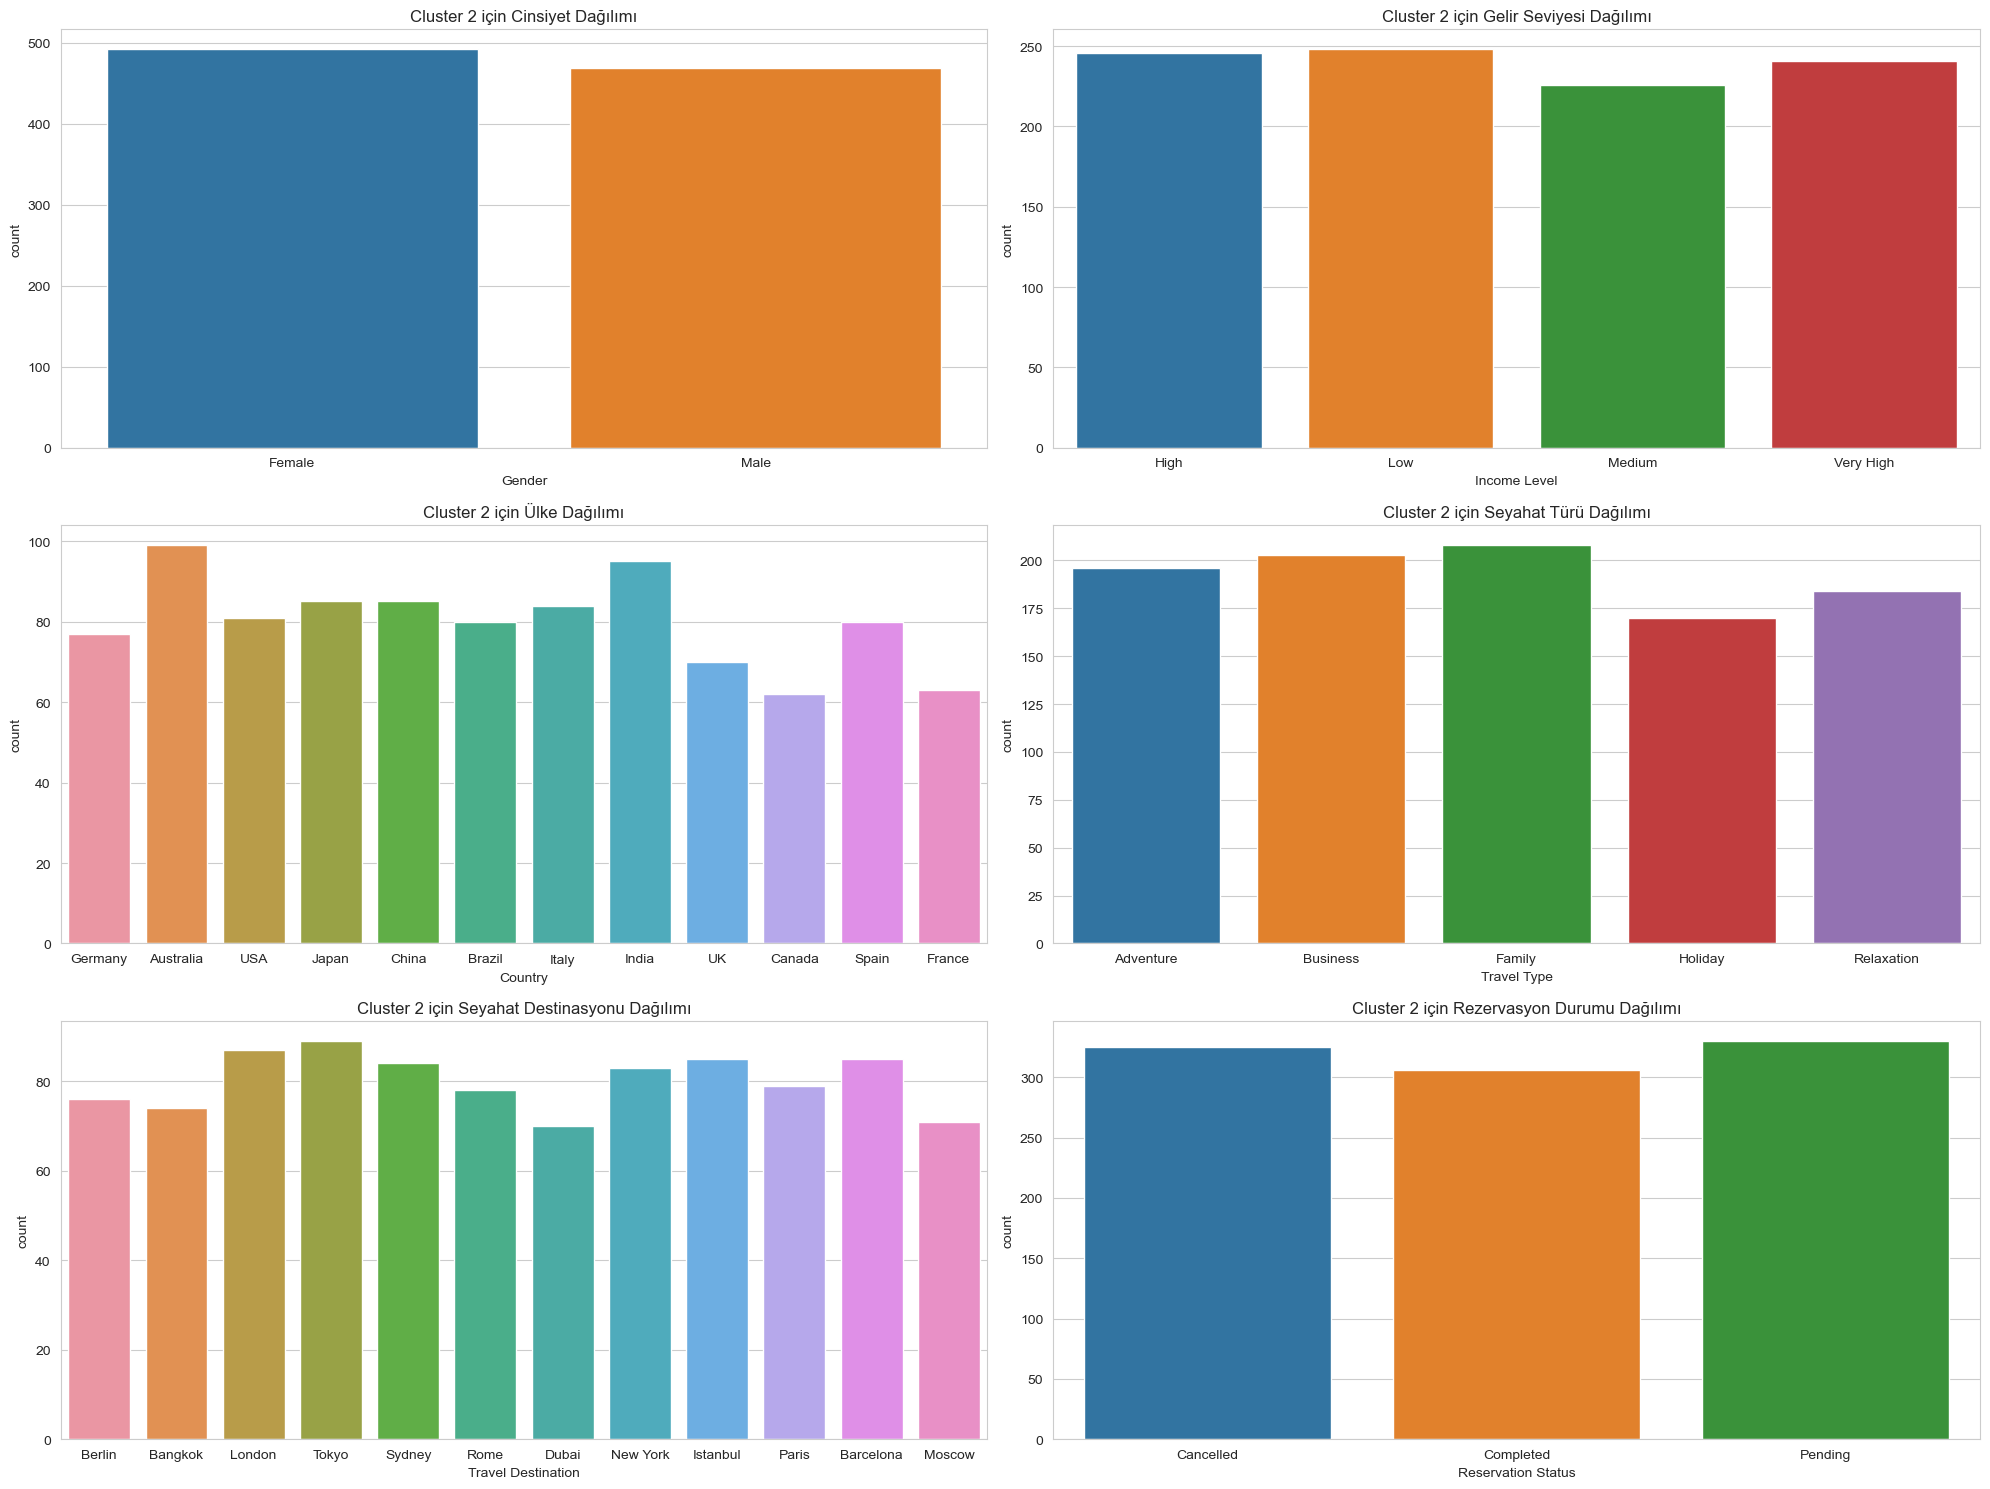

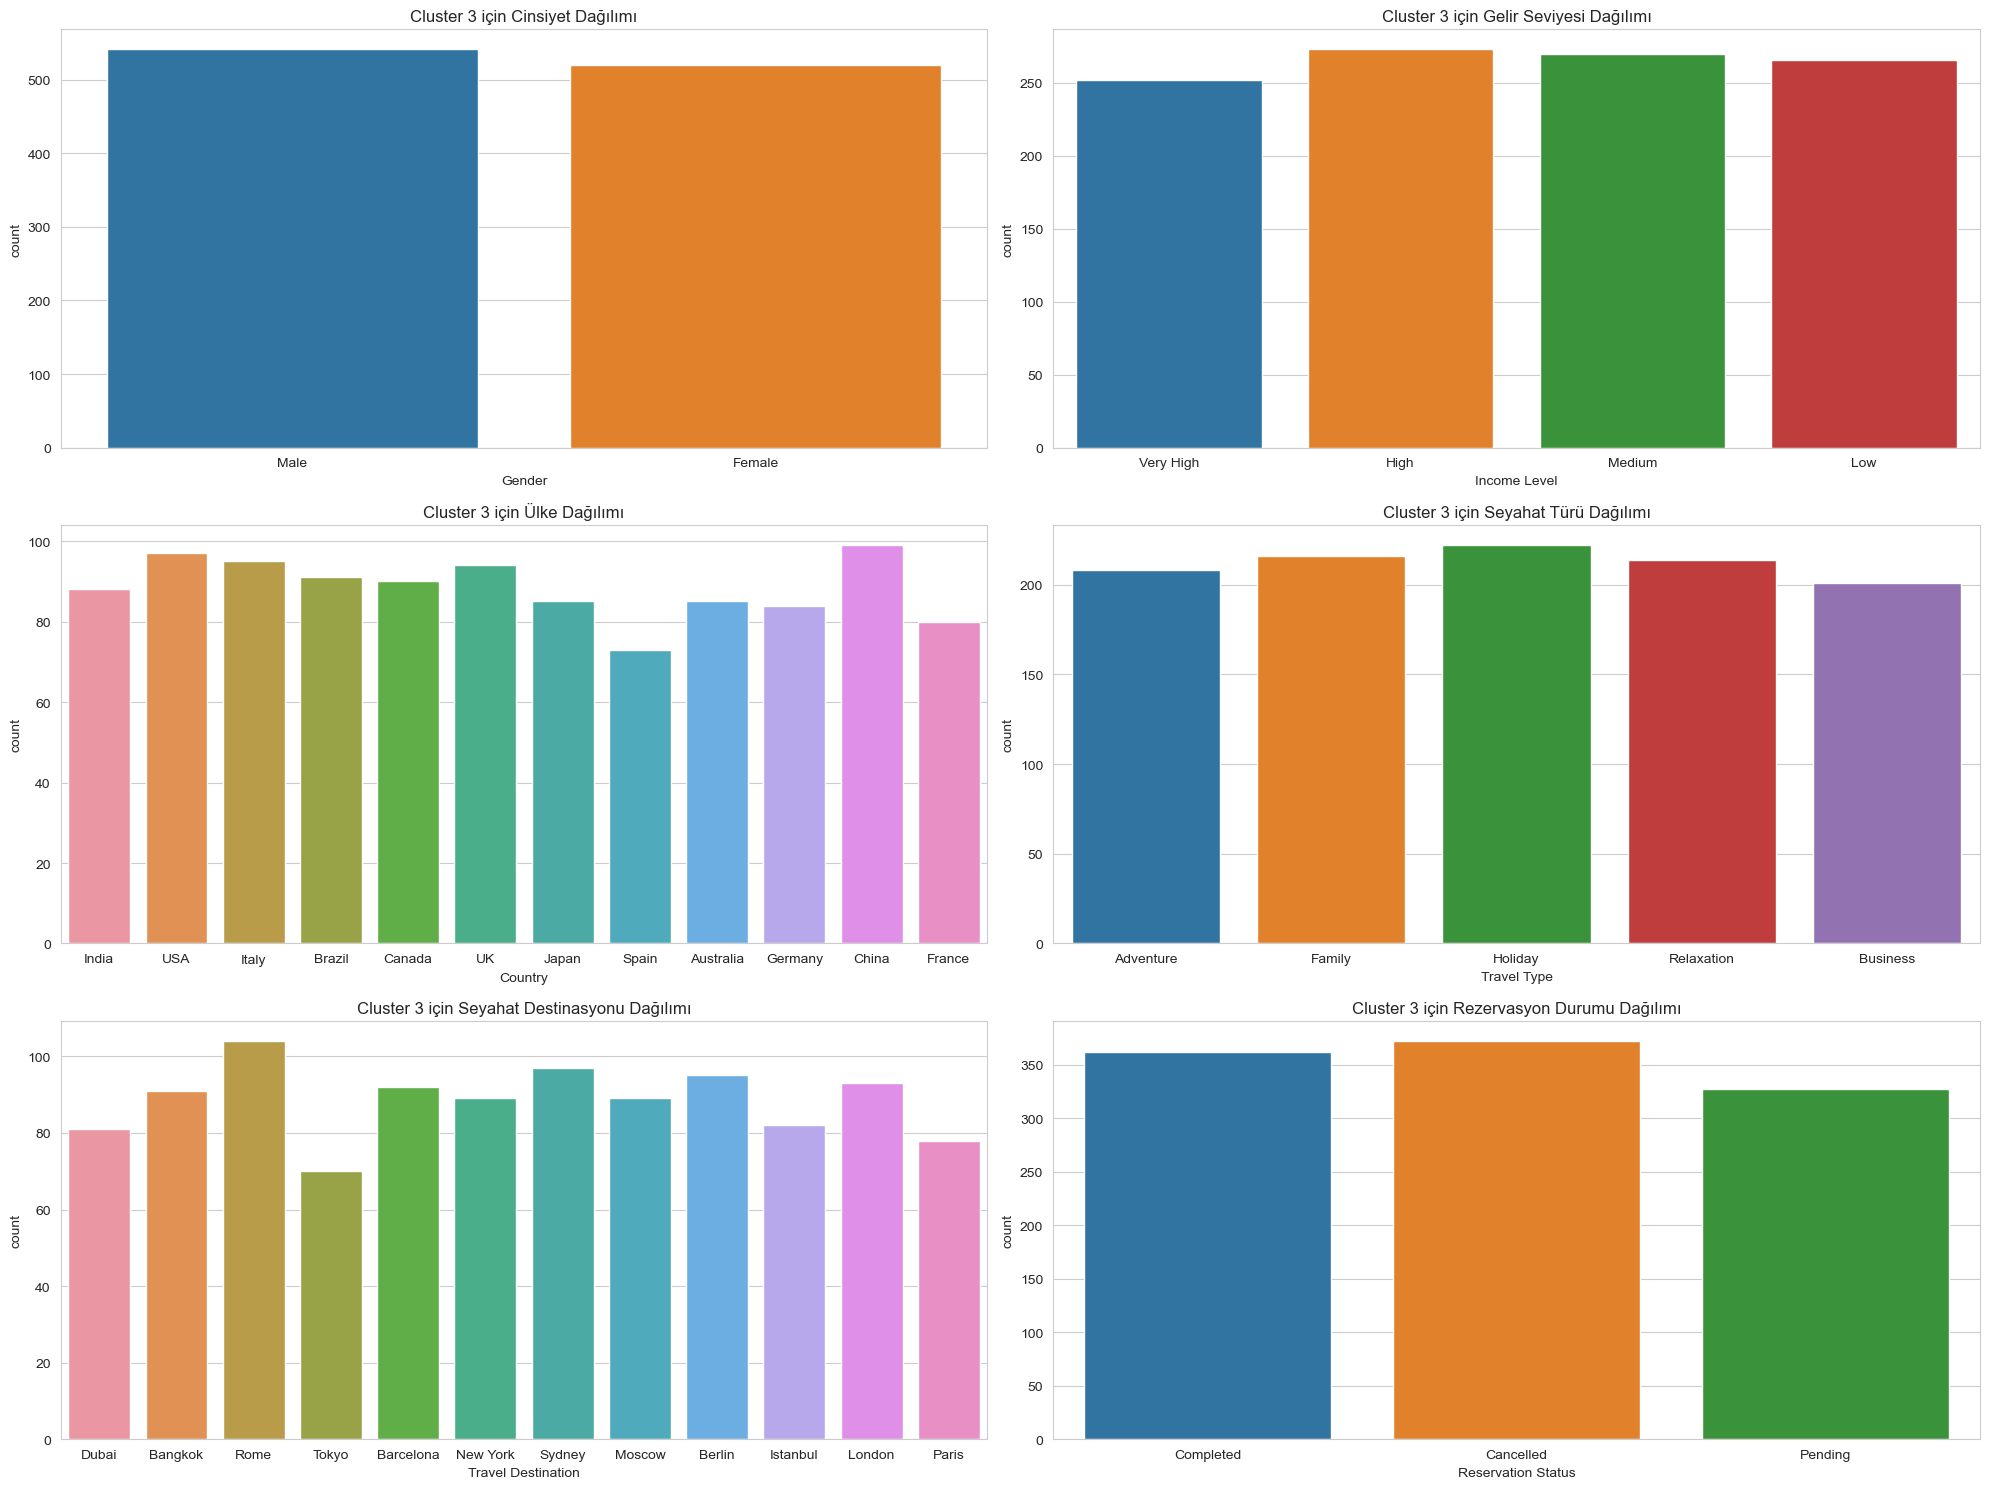

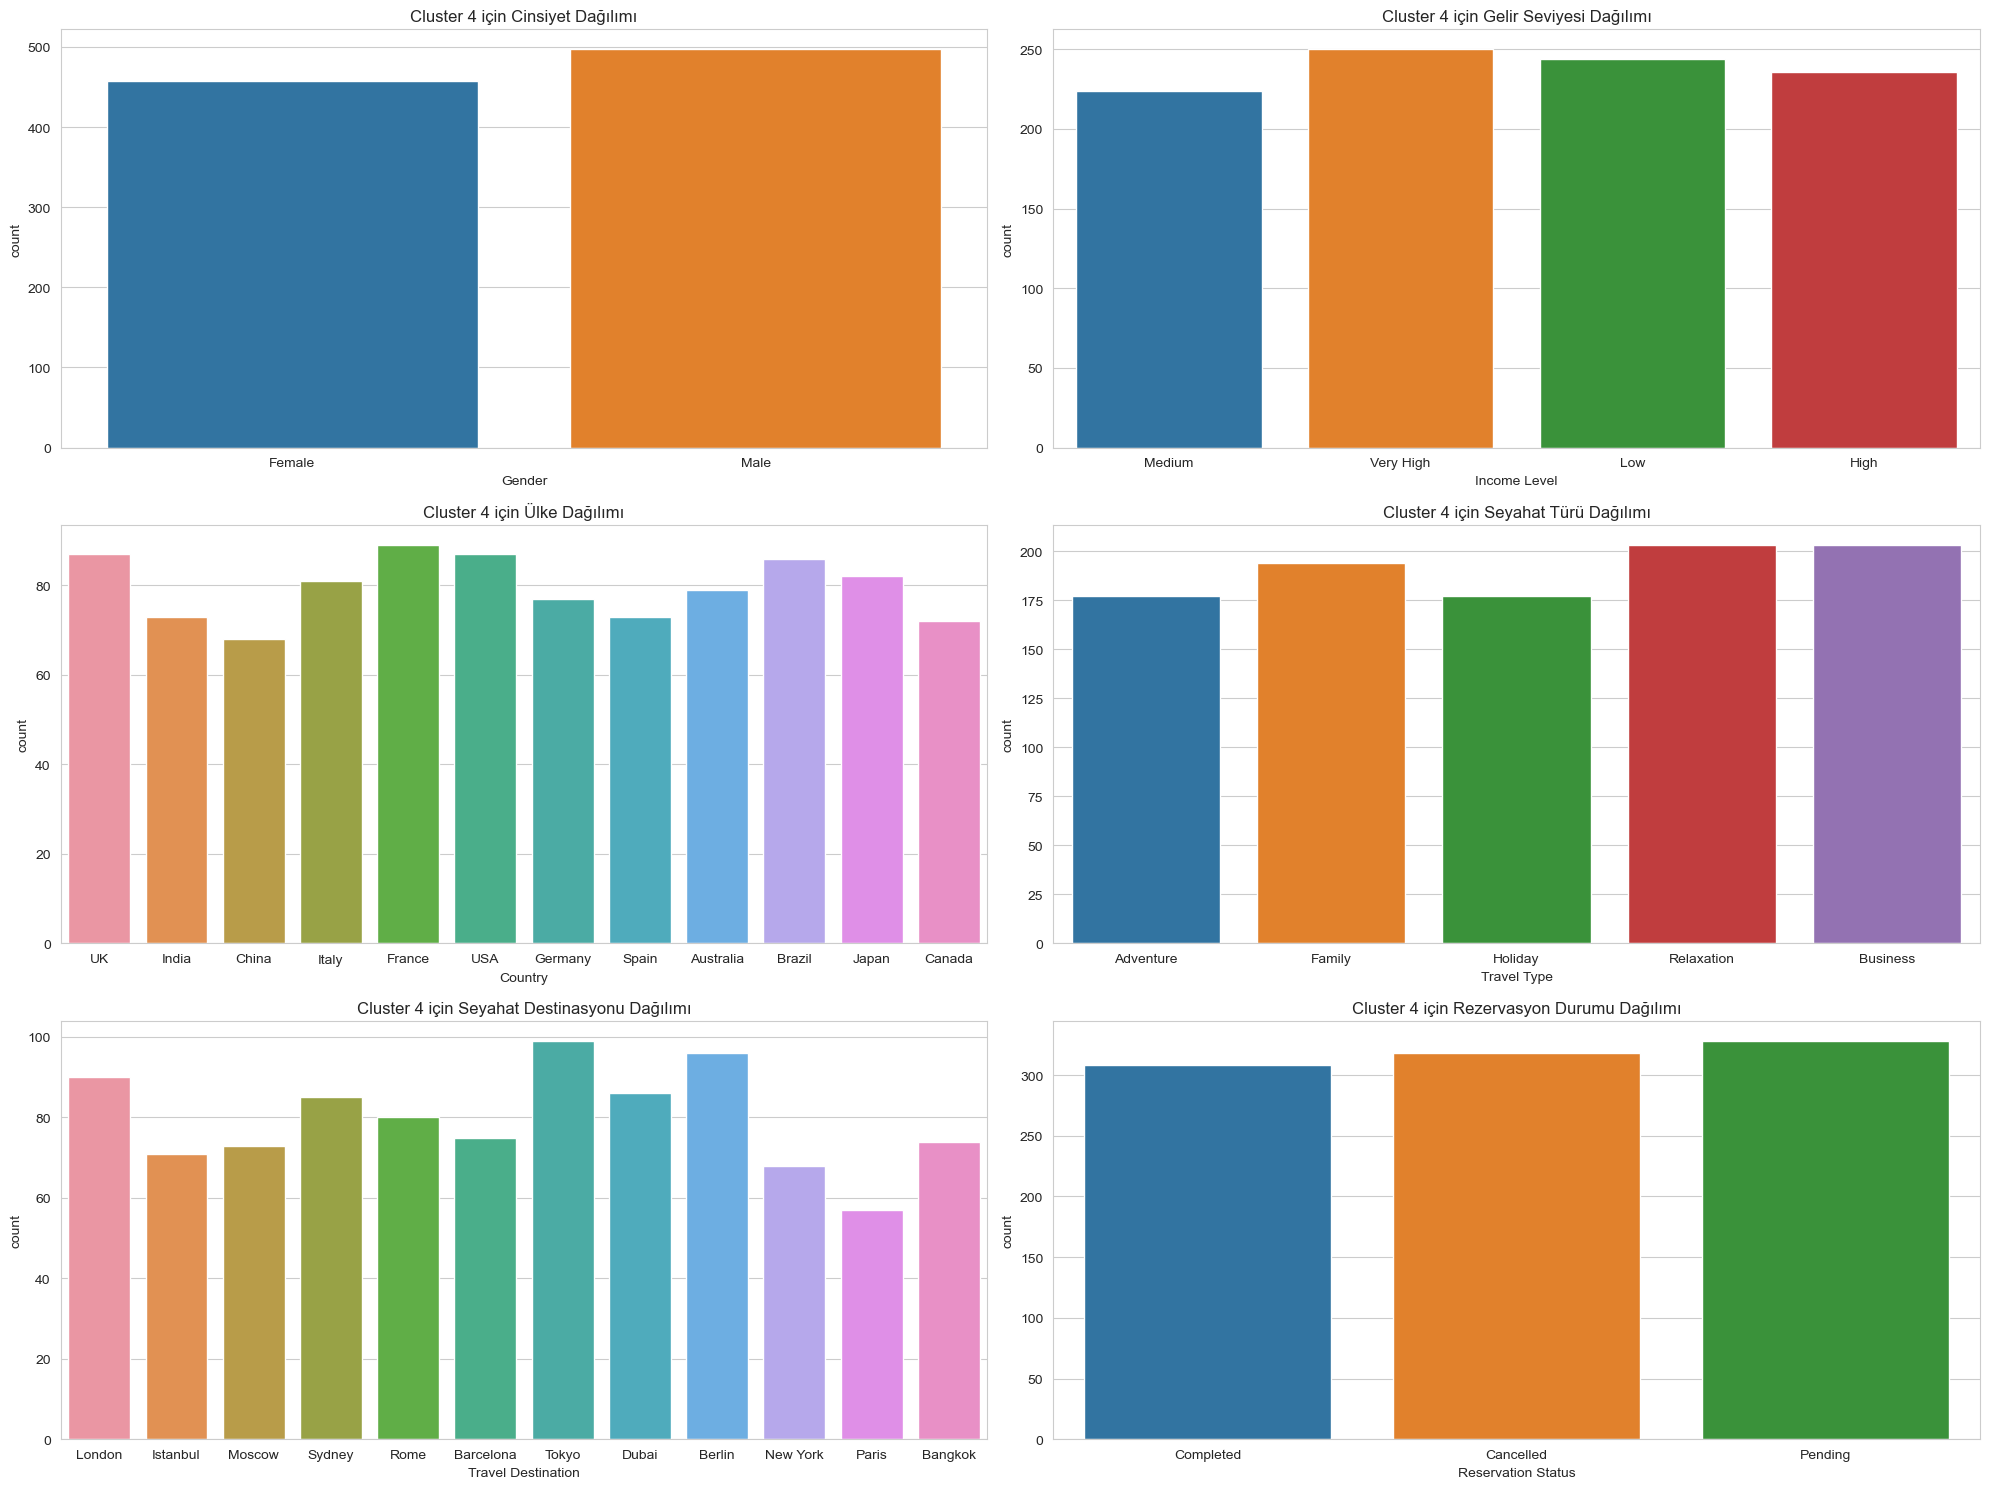

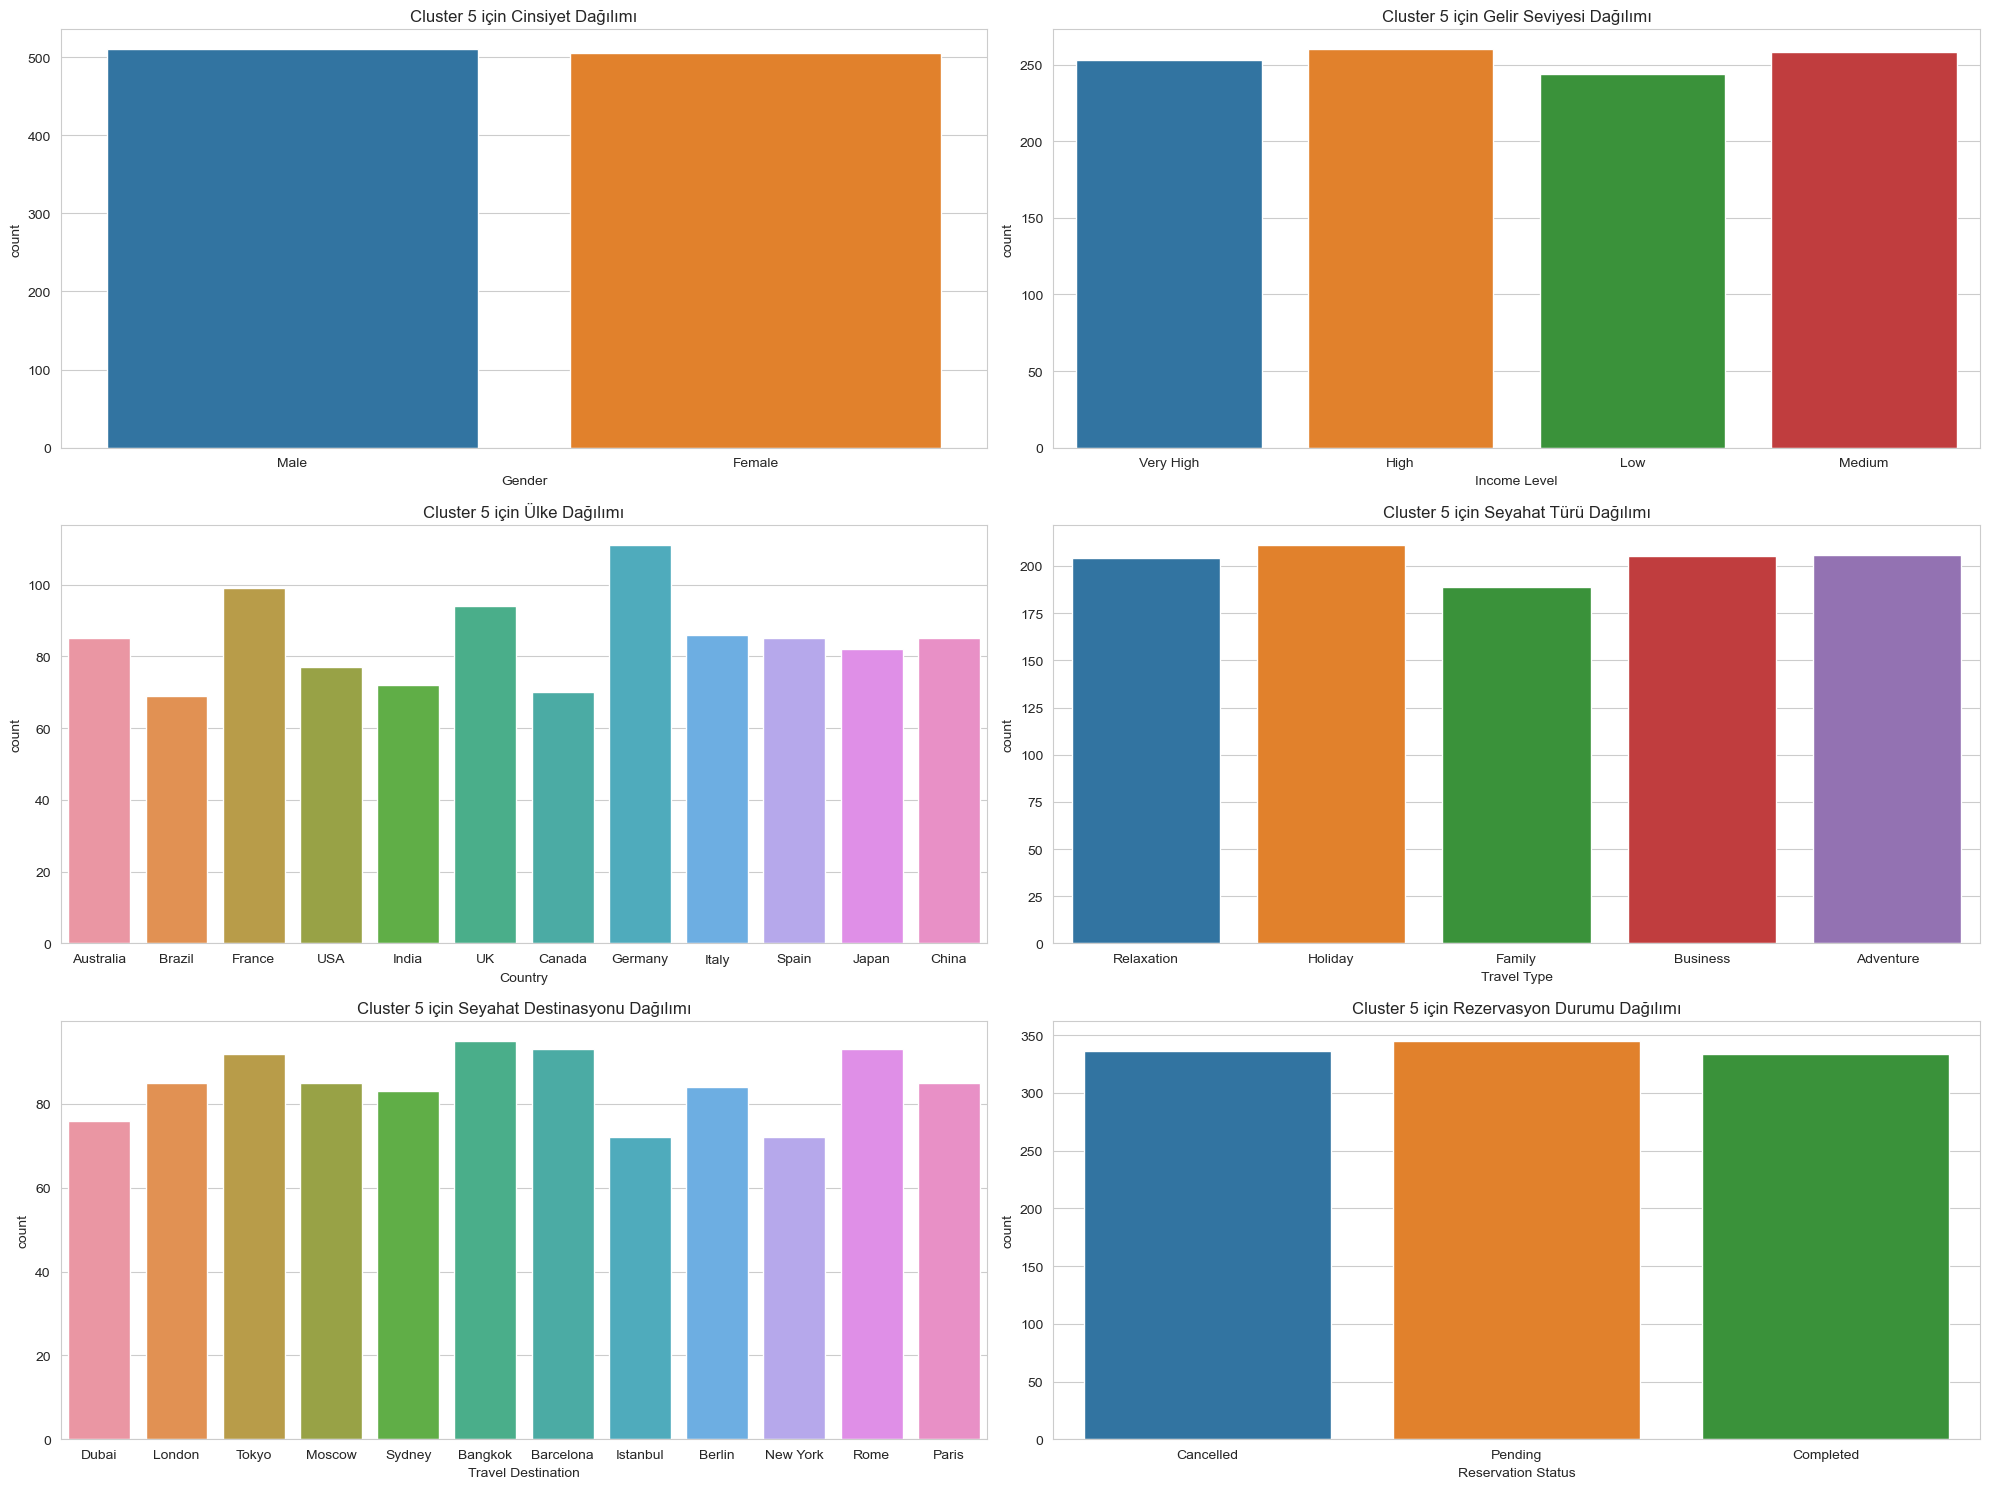

In [16]:
# Cluster 1,2,3,4 ,5 için derin analiz
print("Cluster 1 Detailed Analysis:")
cluster_1_analysis = cluster_1.groupby(['Gender', 'Income Level', 'Country', 'Travel Type', 'Travel Destination', 'Reservation Status']).size().reset_index(name='Counts')
print(cluster_1_analysis)

print("Cluster 2 Detailed Analysis:")
cluster_2_analysis = cluster_2.groupby(['Gender', 'Income Level', 'Country', 'Travel Type', 'Travel Destination', 'Reservation Status']).size().reset_index(name='Counts')
print(cluster_2_analysis)

print("Cluster 3 Detailed Analysis:")
cluster_3_analysis = cluster_3.groupby(['Gender', 'Income Level', 'Country', 'Travel Type', 'Travel Destination', 'Reservation Status']).size().reset_index(name='Counts')
print(cluster_3_analysis)

print("Cluster 4 Detailed Analysis:")
cluster_4_analysis = cluster_4.groupby(['Gender', 'Income Level', 'Country', 'Travel Type', 'Travel Destination', 'Reservation Status']).size().reset_index(name='Counts')
print(cluster_4_analysis)

print("Cluster 5 Detailed Analysis:")
cluster_5_analysis = cluster_5.groupby(['Gender', 'Income Level', 'Country', 'Travel Type', 'Travel Destination', 'Reservation Status']).size().reset_index(name='Counts')
print(cluster_5_analysis)

# Görselleştirme: Kategorik verilerin detaylı dağılımı
def plot_cluster_analysis(cluster_data, cluster_number):
    plt.figure(figsize=(20, 15))

    plt.subplot(3, 2, 1)
    sns.countplot(x='Gender', data=cluster_data)
    plt.title(f'Cluster {cluster_number} için Cinsiyet Dağılımı')

    plt.subplot(3, 2, 2)
    sns.countplot(x='Income Level', data=cluster_data)
    plt.title(f'Cluster {cluster_number} için Gelir Seviyesi Dağılımı')

    plt.subplot(3, 2, 3)
    sns.countplot(x='Country', data=cluster_data)
    plt.title(f'Cluster {cluster_number} için Ülke Dağılımı')

    plt.subplot(3, 2, 4)
    sns.countplot(x='Travel Type', data=cluster_data)
    plt.title(f'Cluster {cluster_number} için Seyahat Türü Dağılımı')

    plt.subplot(3, 2, 5)
    sns.countplot(x='Travel Destination', data=cluster_data)
    plt.title(f'Cluster {cluster_number} için Seyahat Destinasyonu Dağılımı')

    plt.subplot(3, 2, 6)
    sns.countplot(x='Reservation Status', data=cluster_data)
    plt.title(f'Cluster {cluster_number} için Rezervasyon Durumu Dağılımı')

    plt.tight_layout()
    plt.show()

# Cluster 1 için detaylı görselleştirme
plot_cluster_analysis(cluster_1, 1)

# Cluster 2 için detaylı görselleştirme
plot_cluster_analysis(cluster_2, 2)

# Cluster 3 için detaylı görselleştirme
plot_cluster_analysis(cluster_3, 3)

# Cluster 4 için detaylı görselleştirme
plot_cluster_analysis(cluster_4, 4)

# Cluster 5 için detaylı görselleştirme
plot_cluster_analysis(cluster_5, 5)


In [17]:
print("Cluster-Specific Statistics:")
print(cluster_summary)# print 

Cluster-Specific Statistics:
  Cluster        Age                   Travel Duration                   \
                mean median        std            mean median       std   
0       0  57.052527   58.0   9.019831       19.787909   21.0  6.708249   
1       1  32.269511   31.0   9.785682        8.825182    8.0  5.759650   
2       2  53.737983   56.0  11.127272        8.556079    8.0  5.462385   
3       3  35.654088   34.0  11.669363       22.306080   23.0  5.035303   
4       4  37.359606   36.0  12.573011       16.090640   16.0  7.439146   

  Reservation Fee                       Customer Satisfaction Score         \
             mean   median          std                        mean median   
0     7050.621041  7355.46  2030.465636                    4.068385    4.0   
1     7518.990114  7857.18  1729.461272                    4.853278    5.0   
2     3646.563468  3356.74  2326.567861                    7.483506    8.0   
3     4662.700503  4725.32  2558.115183                

### GMM Clustering

  Customer ID  Age  Gender Income Level    Country           Reservation Date  \
0   CUST_0001   48  Female       Medium         UK 2024-04-14 11:05:44.764459   
1   CUST_0002   44    Male    Very High  Australia 2023-10-18 11:05:44.764477   
2   CUST_0003   48    Male         High  Australia 2023-12-12 11:05:44.764482   
3   CUST_0004   66    Male    Very High      India 2023-09-01 11:05:44.764485   
4   CUST_0005   55  Female          Low  Australia 2023-08-05 11:05:44.764487   

                 Travel Date  Travel Duration Travel Type Travel Destination  \
0 2024-07-07 11:05:44.764459               29   Adventure             London   
1 2023-12-13 11:05:44.764477               29  Relaxation              Dubai   
2 2024-02-13 11:05:44.764482               17  Relaxation             London   
3 2023-09-09 11:05:44.764485               10   Adventure              Dubai   
4 2023-09-18 11:05:44.764487               29      Family          Barcelona   

   Reservation Fee Reservation S

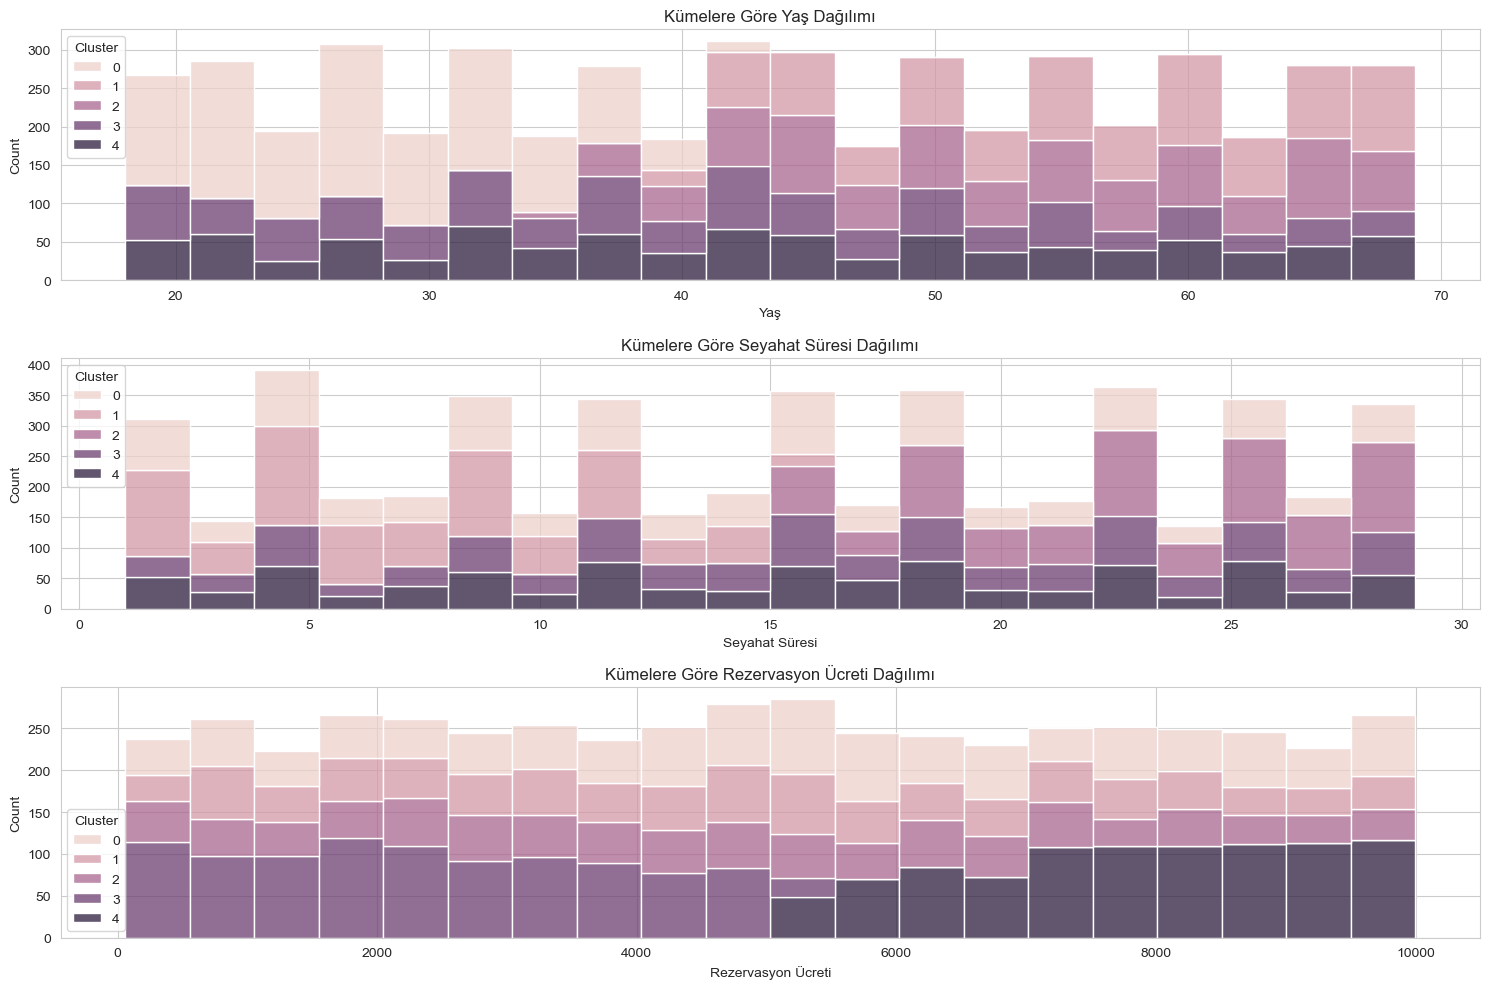

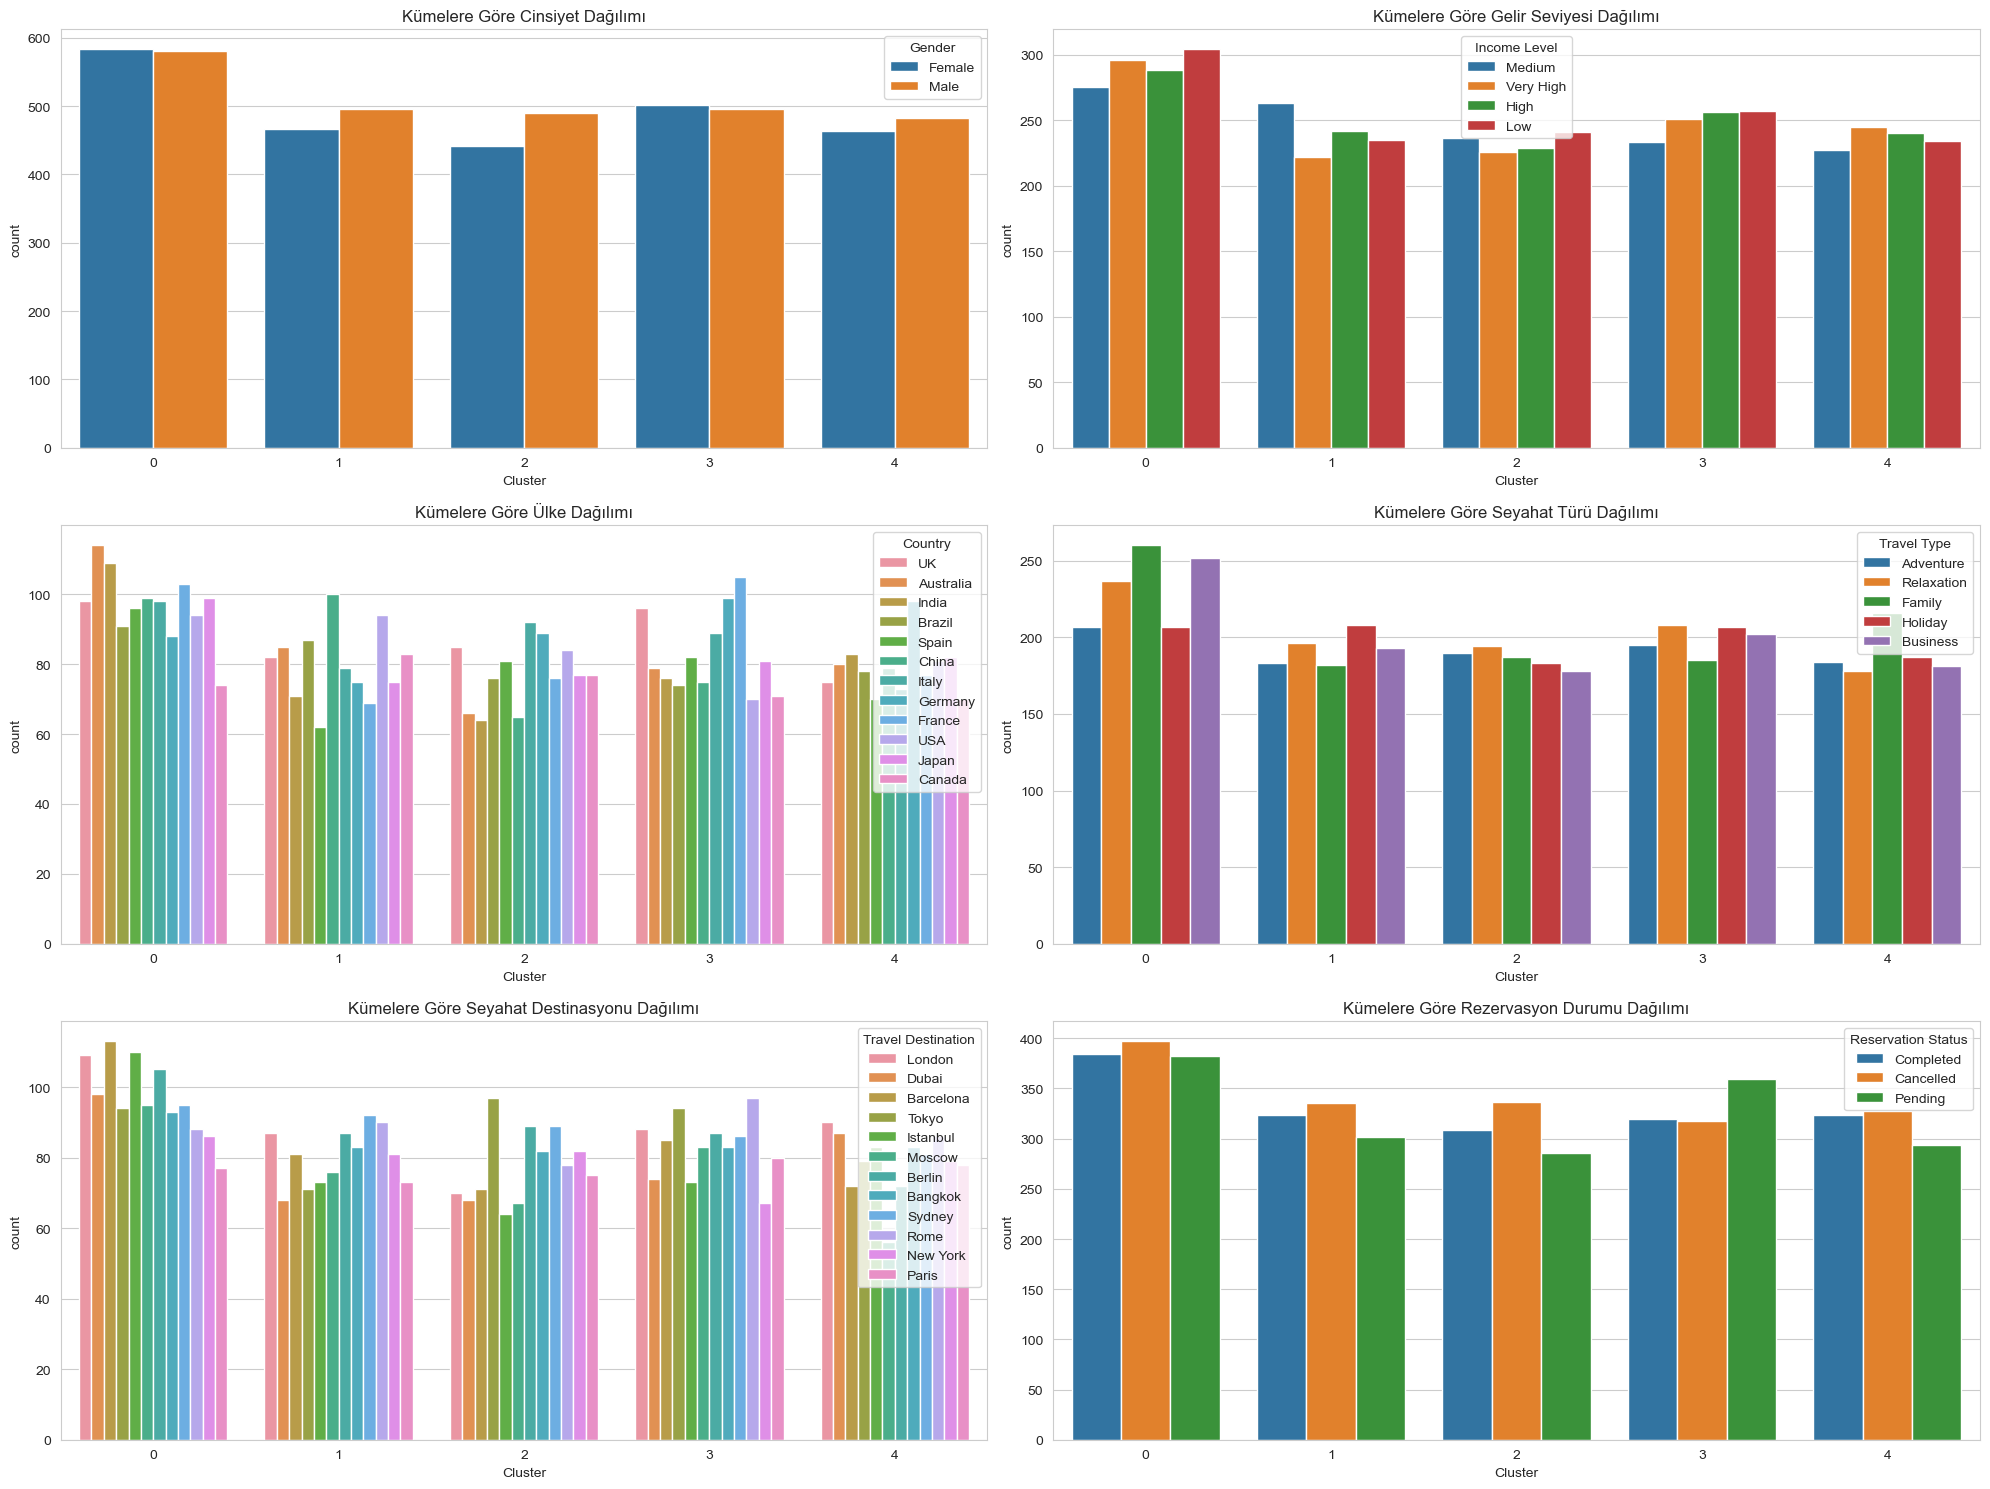

Cluster 1 Analysis:
               Age  Travel Duration  Reservation Fee  \
count  1163.000000      1163.000000      1163.000000   
mean     28.050731        14.232158      5242.999355   
std       6.117609         8.013506      2757.501028   
min      18.000000         1.000000        57.710000   
25%      23.000000         7.000000      3059.620000   
50%      28.000000        14.000000      5296.690000   
75%      33.000000        21.000000      7572.670000   
max      42.000000        29.000000      9994.250000   

       Customer Satisfaction Score        Month  Cluster  Cluster_GMM  \
count                  1163.000000  1163.000000   1163.0       1163.0   
mean                      7.429063     6.567498      0.0          0.0   
std                       1.722809     3.441852      0.0          0.0   
min                       4.000000     1.000000      0.0          0.0   
25%                       6.000000     4.000000      0.0          0.0   
50%                       7.000000   

In [37]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

# 'Reservation Date' ve 'Travel Date' sütunlarını datetime objelerine dönüştürme
dataset['Reservation Date'] = pd.to_datetime(dataset['Reservation Date'])
dataset['Travel Date'] = pd.to_datetime(dataset['Travel Date'])

# Kümeleme için özellikleri seçme
features = dataset[['Age', 'Travel Duration', 'Reservation Fee', 'Customer Satisfaction Score']]

# Veriyi normalize etme
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Gaussian Mixture Model (GMM) kümeleme uygulama
optimal_n_clusters = 5  # Belirlenen optimal küme sayısı
gmm = GaussianMixture(n_components=optimal_n_clusters, random_state=42)
clusters = gmm.fit_predict(scaled_features)

# Orijinal veri setine küme etiketlerini ekleme
dataset['Cluster'] = clusters

# Veri setinin ilk birkaç satırını gösterme
print(dataset.head())

# Her küme için özet istatistikleri hesaplama
cluster_summary = dataset.groupby('Cluster').agg({
    'Age': ['mean', 'median', 'std'],
    'Travel Duration': ['mean', 'median', 'std'],
    'Reservation Fee': ['mean', 'median', 'std'],
    'Customer Satisfaction Score': ['mean', 'median', 'std'],
    'Gender': lambda x: x.value_counts().index[0],
    'Income Level': lambda x: x.value_counts().index[0],
    'Country': lambda x: x.value_counts().index[0],
    'Travel Type': lambda x: x.value_counts().index[0],
    'Travel Destination': lambda x: x.value_counts().index[0],
    'Reservation Status': lambda x: x.value_counts().index[0]
}).reset_index()

print("Cluster-Specific Statistics:")
print(cluster_summary)

# Sayısal özelliklerin dağılımını görselleştirme
plt.figure(figsize=(15, 10))

# Age dağılımı
plt.subplot(3, 1, 1)
sns.histplot(data=dataset, x='Age', hue='Cluster', multiple='stack', bins=20)
plt.title('Kümelere Göre Yaş Dağılımı')
plt.xlabel('Yaş')
plt.ylabel('Count')

# Travel Duration dağılımı
plt.subplot(3, 1, 2)
sns.histplot(data=dataset, x='Travel Duration', hue='Cluster', multiple='stack', bins=20)
plt.title('Kümelere Göre Seyahat Süresi Dağılımı')
plt.xlabel('Seyahat Süresi')
plt.ylabel('Count')

# Reservation Fee dağılımı
plt.subplot(3, 1, 3)
sns.histplot(data=dataset, x='Reservation Fee', hue='Cluster', multiple='stack', bins=20)
plt.title('Kümelere Göre Rezervasyon Ücreti Dağılımı')
plt.xlabel('Rezervasyon Ücreti')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Kategorik özelliklerin dağılımını görselleştirme
plt.figure(figsize=(20, 15))

# Gender dağılımı
plt.subplot(3, 2, 1)
sns.countplot(x='Cluster', hue='Gender', data=dataset)
plt.title('Kümelere Göre Cinsiyet Dağılımı')

# Income Level dağılımı
plt.subplot(3, 2, 2)
sns.countplot(x='Cluster', hue='Income Level', data=dataset)
plt.title('Kümelere Göre Gelir Seviyesi Dağılımı')

# Country dağılımı
plt.subplot(3, 2, 3)
sns.countplot(x='Cluster', hue='Country', data=dataset)
plt.title('Kümelere Göre Ülke Dağılımı')

# Travel Type dağılımı
plt.subplot(3, 2, 4)
sns.countplot(x='Cluster', hue='Travel Type', data=dataset)
plt.title('Kümelere Göre Seyahat Türü Dağılımı')

# Travel Destination dağılımı
plt.subplot(3, 2, 5)
sns.countplot(x='Cluster', hue='Travel Destination', data=dataset)
plt.title('Kümelere Göre Seyahat Destinasyonu Dağılımı')

# Reservation Status dağılımı
plt.subplot(3, 2, 6)
sns.countplot(x='Cluster', hue='Reservation Status', data=dataset)
plt.title('Kümelere Göre Rezervasyon Durumu Dağılımı')

plt.tight_layout()
plt.show()

# Cluster 1,2,3,4 ,5 için analiz
cluster_1 = dataset[dataset['Cluster'] == 0]
print("Cluster 1 Analysis:")
print(cluster_1.describe())
print(cluster_1['Gender'].value_counts())
print(cluster_1['Income Level'].value_counts())
print(cluster_1['Country'].value_counts())
print(cluster_1['Travel Type'].value_counts())
print(cluster_1['Travel Destination'].value_counts())
print(cluster_1['Reservation Status'].value_counts())

cluster_2 = dataset[dataset['Cluster'] == 1]
print("Cluster 2 Analysis:")
print(cluster_2.describe())
print(cluster_2['Gender'].value_counts())
print(cluster_2['Income Level'].value_counts())
print(cluster_2['Country'].value_counts())
print(cluster_2['Travel Type'].value_counts())
print(cluster_2['Travel Destination'].value_counts())
print(cluster_2['Reservation Status'].value_counts())

cluster_3 = dataset[dataset['Cluster'] == 2]
print("Cluster 3 Analysis:")
print(cluster_3.describe())
print(cluster_3['Gender'].value_counts())
print(cluster_3['Income Level'].value_counts())
print(cluster_3['Country'].value_counts())
print(cluster_3['Travel Type'].value_counts())
print(cluster_3['Travel Destination'].value_counts())
print(cluster_3['Reservation Status'].value_counts())

cluster_4 = dataset[dataset['Cluster'] == 3]
print("Cluster 4 Analysis:")
print(cluster_4.describe())
print(cluster_4['Gender'].value_counts())
print(cluster_4['Income Level'].value_counts())
print(cluster_4['Country'].value_counts())
print(cluster_4['Travel Type'].value_counts())
print(cluster_4['Travel Destination'].value_counts())
print(cluster_4['Reservation Status'].value_counts())

cluster_5 = dataset[dataset['Cluster'] == 4]
print("Cluster 5 Analysis:")
print(cluster_5.describe())
print(cluster_5['Gender'].value_counts())
print(cluster_5['Income Level'].value_counts())
print(cluster_5['Country'].value_counts())
print(cluster_5['Travel Type'].value_counts())
print(cluster_5['Travel Destination'].value_counts())
print(cluster_5['Reservation Status'].value_counts())


Cluster 1 Detailed Analysis:
      Gender Income Level    Country Travel Type Travel Destination  \
0     Female         High  Australia    Business          Barcelona   
1     Female         High  Australia    Business              Dubai   
2     Female         High  Australia      Family          Barcelona   
3     Female         High  Australia      Family              Dubai   
4     Female         High  Australia      Family             Moscow   
...      ...          ...        ...         ...                ...   
1117    Male    Very High        USA  Relaxation              Dubai   
1118    Male    Very High        USA  Relaxation              Dubai   
1119    Male    Very High        USA  Relaxation             Moscow   
1120    Male    Very High        USA  Relaxation           New York   
1121    Male    Very High        USA  Relaxation             Sydney   

     Reservation Status  Counts  
0             Cancelled       1  
1             Completed       1  
2             Ca

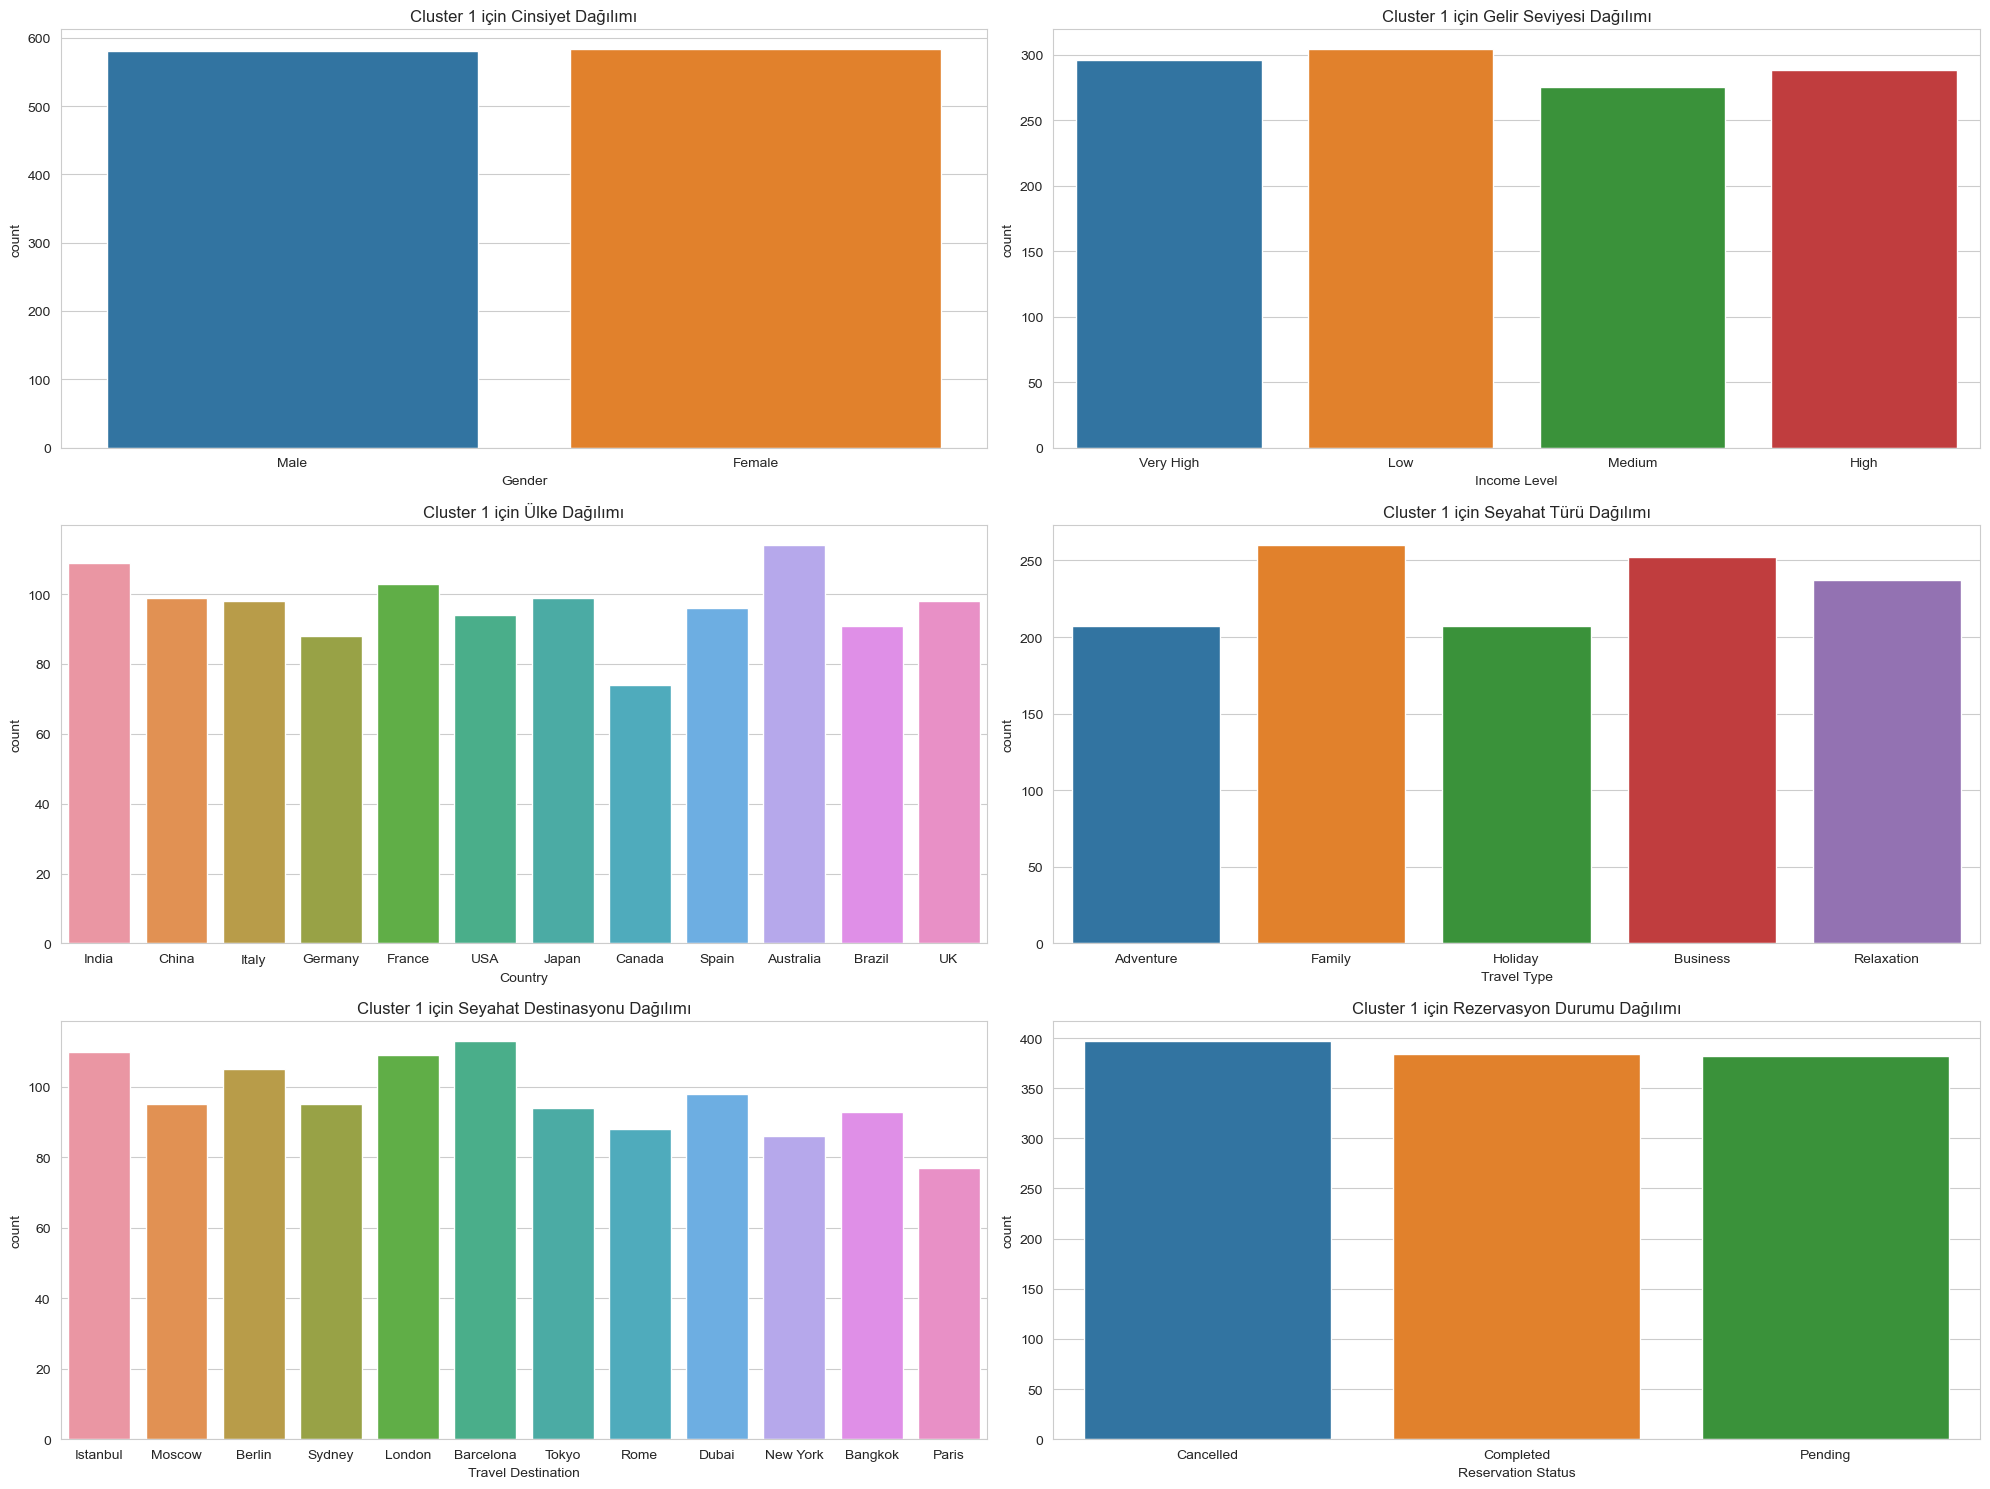

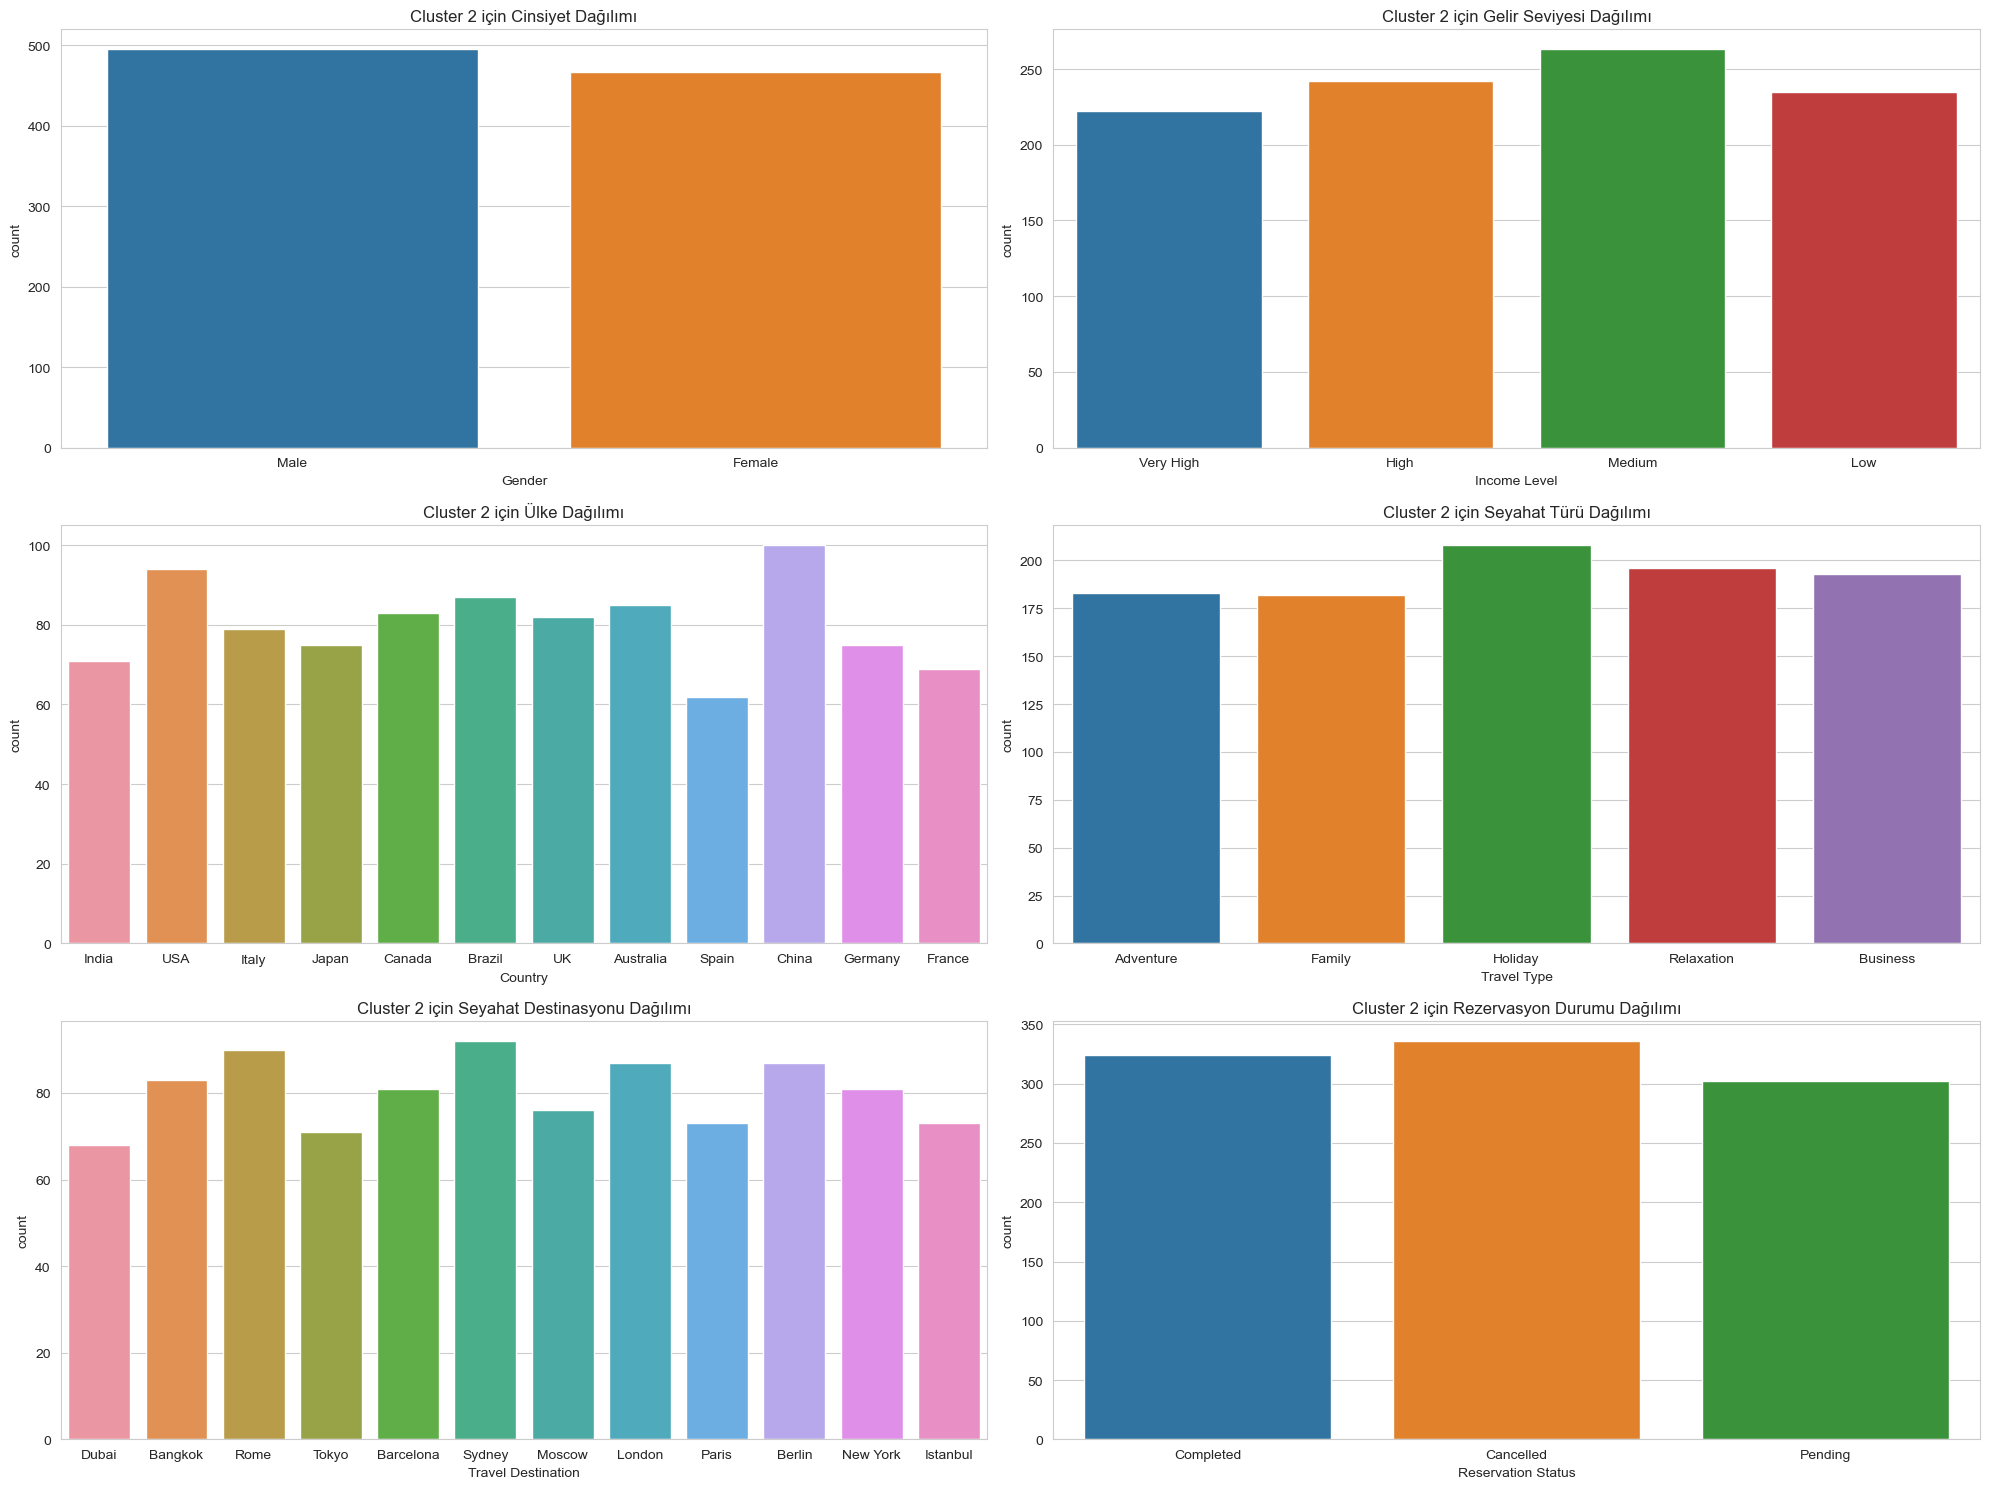

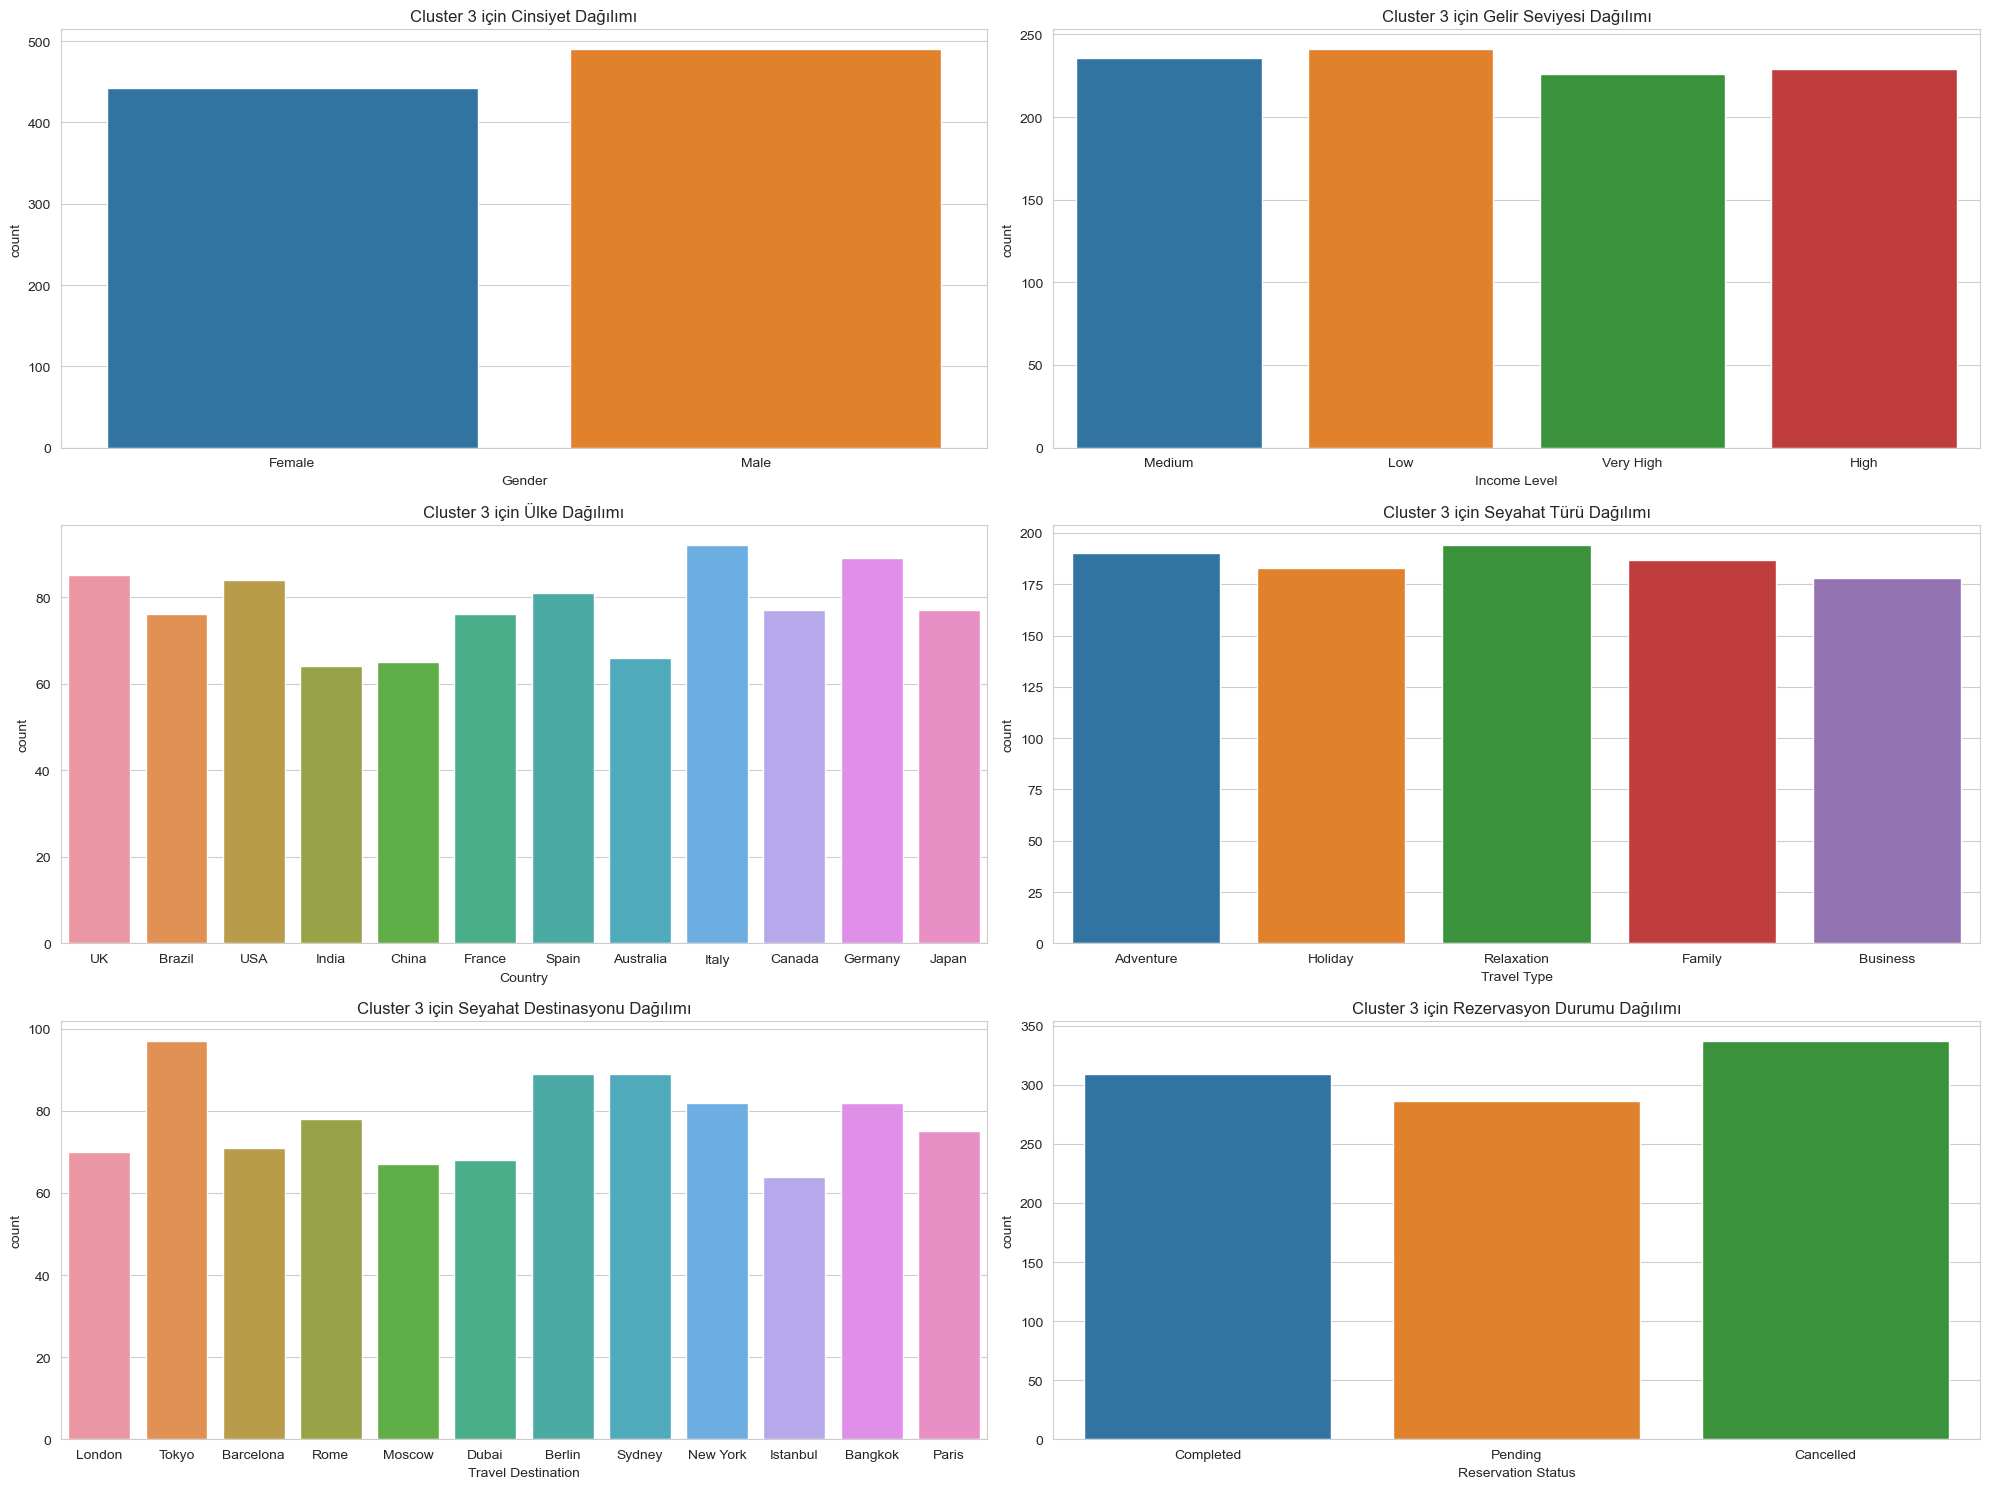

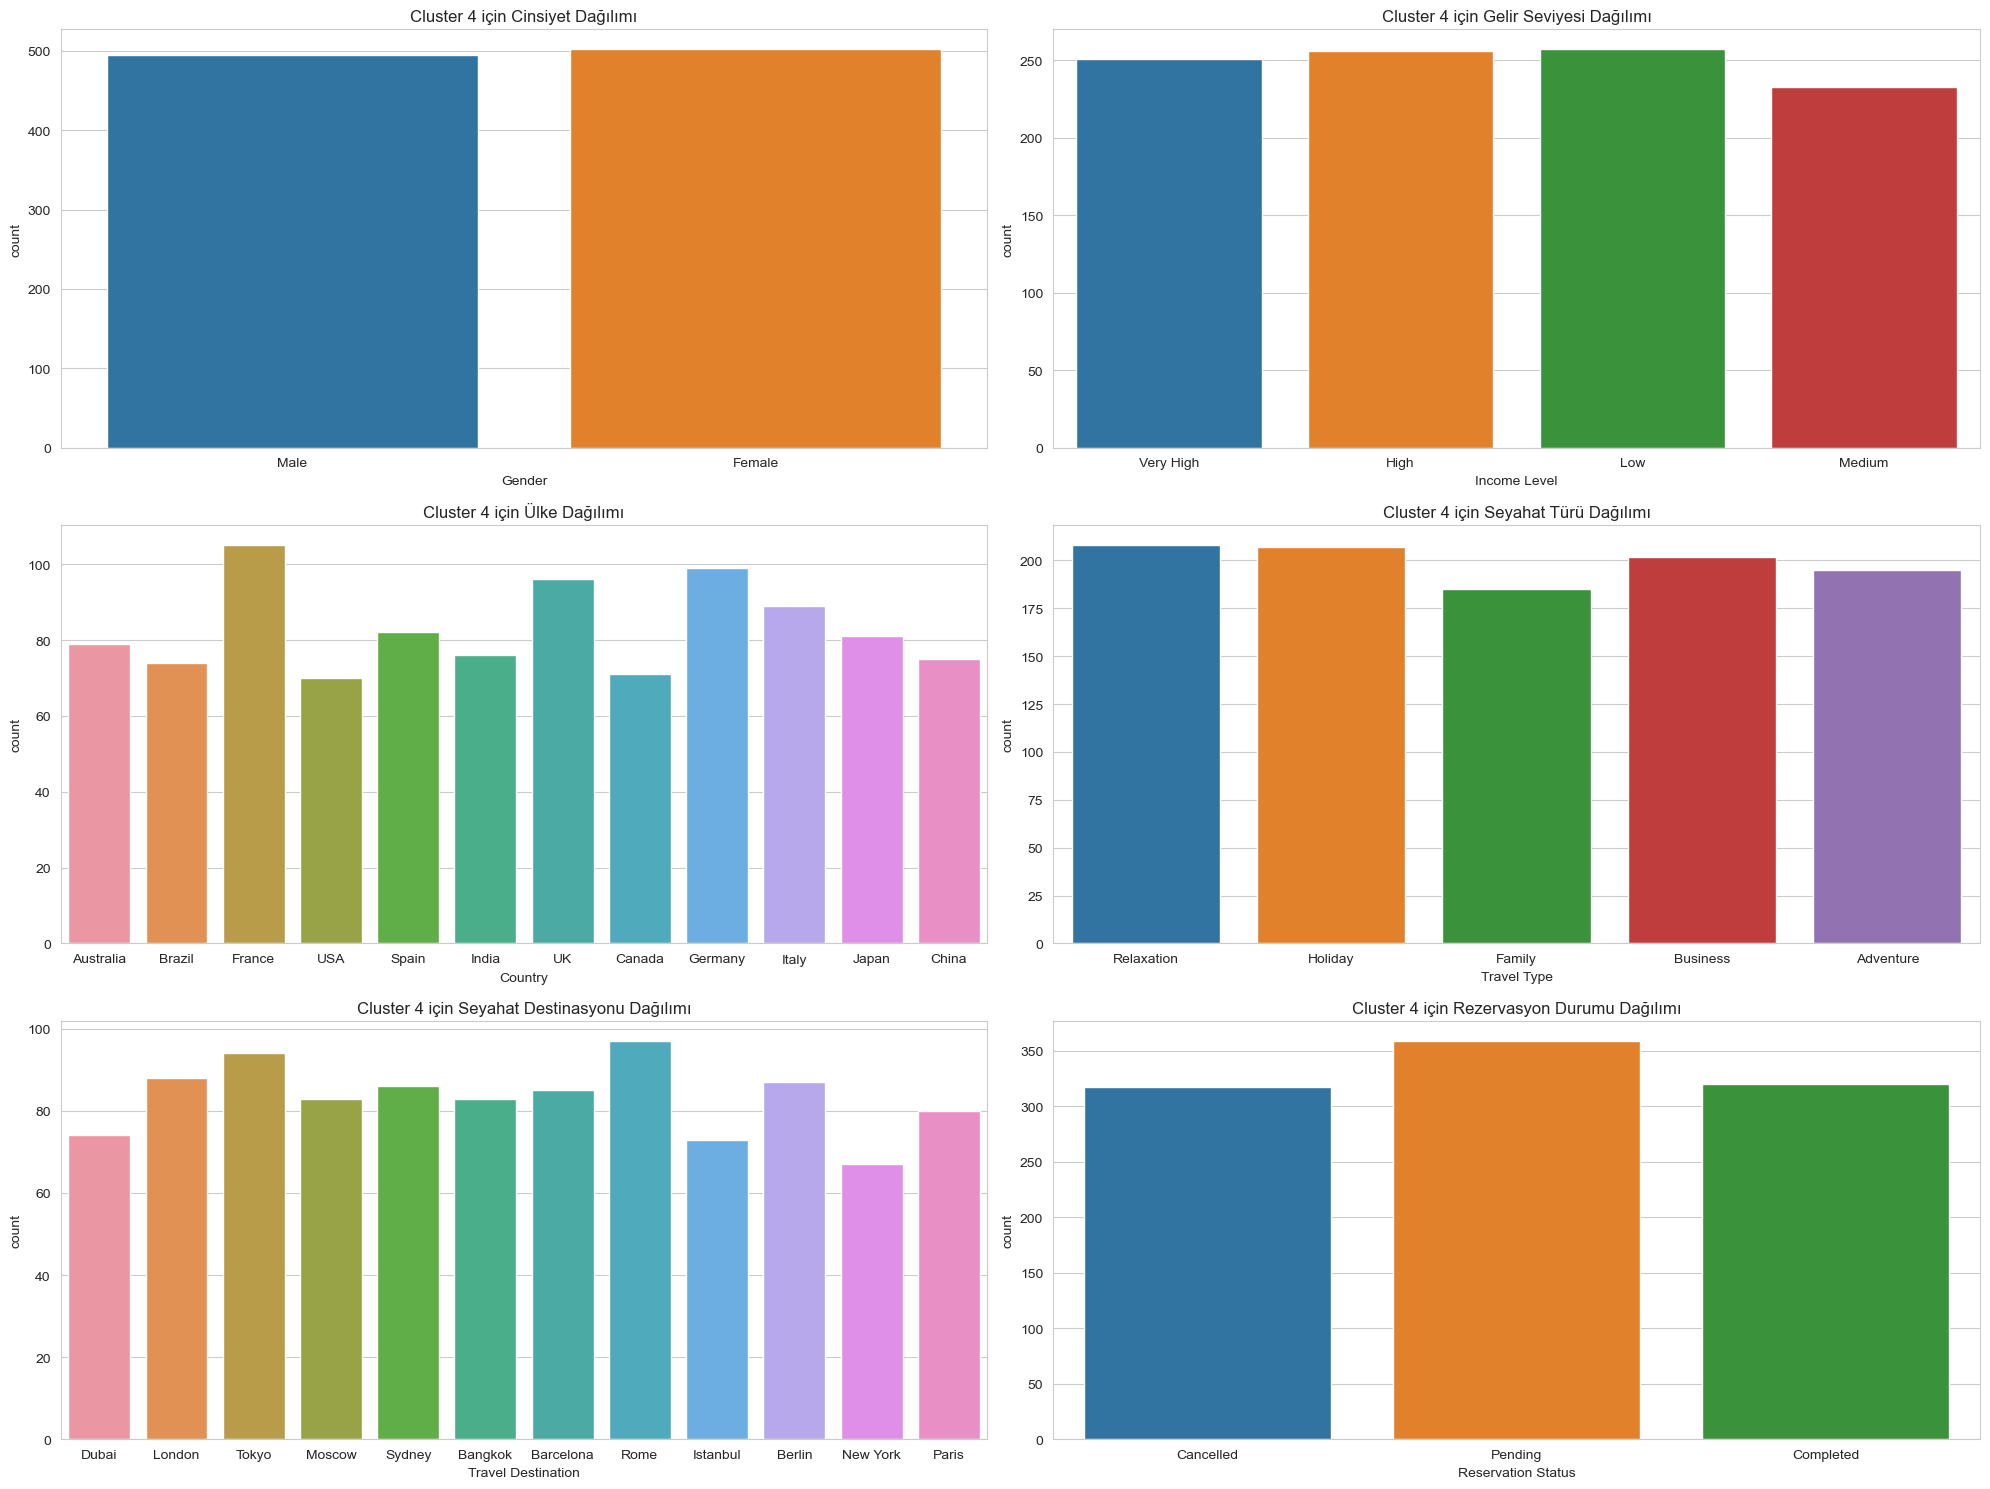

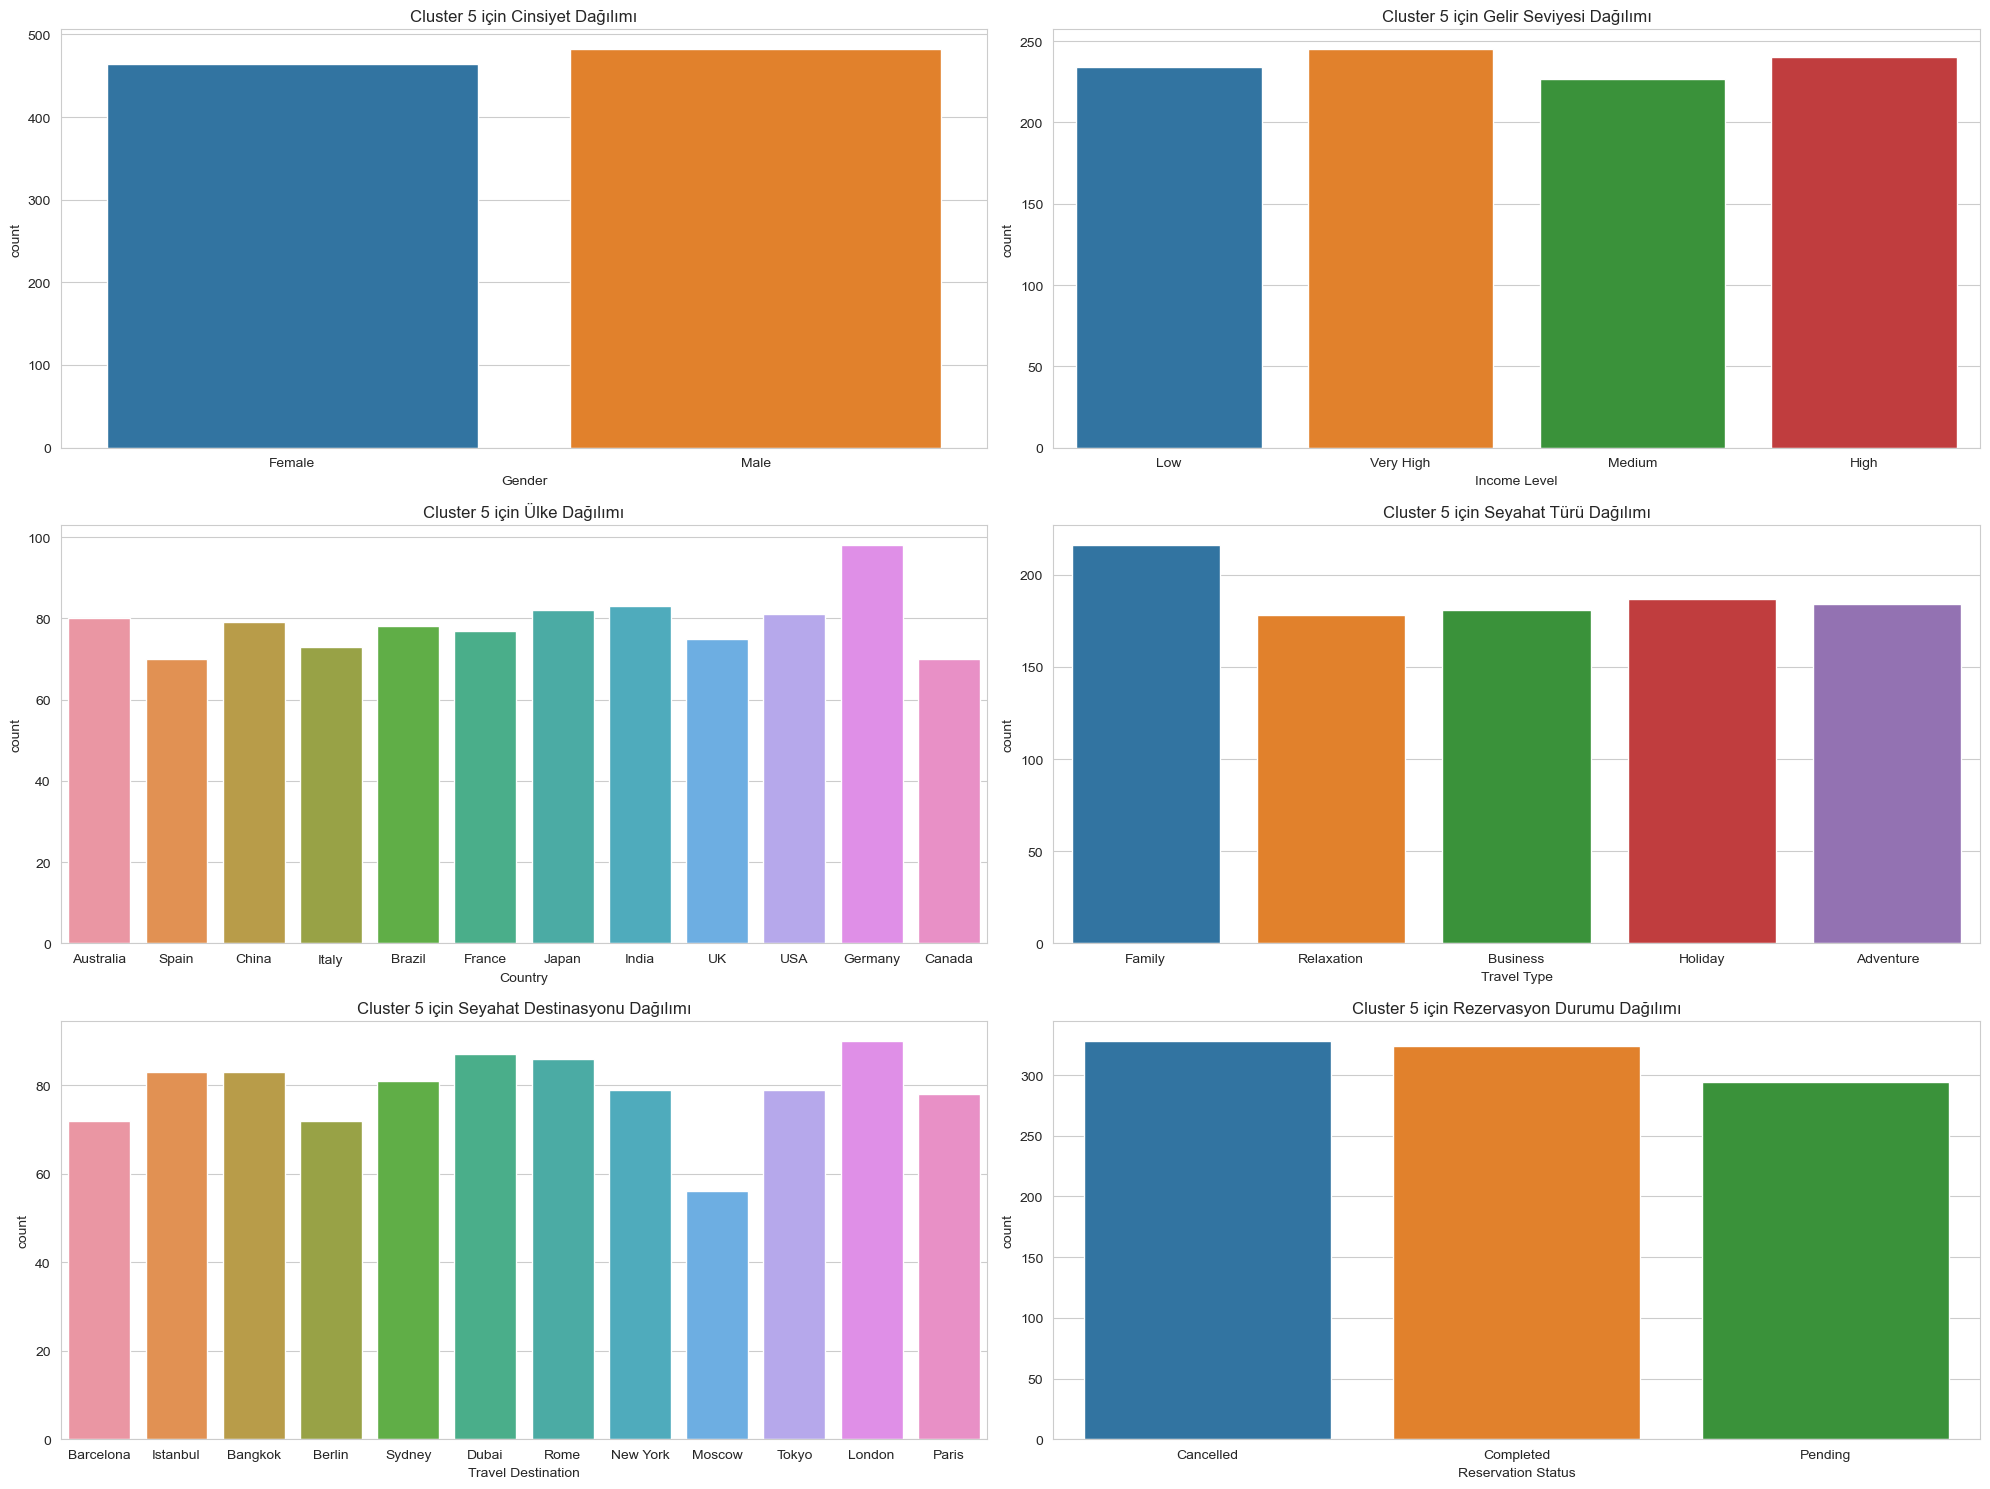

In [38]:
# Cluster 1,2,3,4 ,5 için derin analiz
print("Cluster 1 Detailed Analysis:")
cluster_1_analysis = cluster_1.groupby(['Gender', 'Income Level', 'Country', 'Travel Type', 'Travel Destination', 'Reservation Status']).size().reset_index(name='Counts')
print(cluster_1_analysis)

print("Cluster 2 Detailed Analysis:")
cluster_2_analysis = cluster_2.groupby(['Gender', 'Income Level', 'Country', 'Travel Type', 'Travel Destination', 'Reservation Status']).size().reset_index(name='Counts')
print(cluster_2_analysis)

print("Cluster 3 Detailed Analysis:")
cluster_3_analysis = cluster_3.groupby(['Gender', 'Income Level', 'Country', 'Travel Type', 'Travel Destination', 'Reservation Status']).size().reset_index(name='Counts')
print(cluster_3_analysis)

print("Cluster 4 Detailed Analysis:")
cluster_4_analysis = cluster_4.groupby(['Gender', 'Income Level', 'Country', 'Travel Type', 'Travel Destination', 'Reservation Status']).size().reset_index(name='Counts')
print(cluster_4_analysis)

print("Cluster 5 Detailed Analysis:")
cluster_5_analysis = cluster_5.groupby(['Gender', 'Income Level', 'Country', 'Travel Type', 'Travel Destination', 'Reservation Status']).size().reset_index(name='Counts')
print(cluster_5_analysis)

# Görselleştirme: Kategorik verilerin detaylı dağılımı
def plot_cluster_analysis(cluster_data, cluster_number):
    plt.figure(figsize=(20, 15))

    plt.subplot(3, 2, 1)
    sns.countplot(x='Gender', data=cluster_data)
    plt.title(f'Cluster {cluster_number} için Cinsiyet Dağılımı')

    plt.subplot(3, 2, 2)
    sns.countplot(x='Income Level', data=cluster_data)
    plt.title(f'Cluster {cluster_number} için Gelir Seviyesi Dağılımı')

    plt.subplot(3, 2, 3)
    sns.countplot(x='Country', data=cluster_data)
    plt.title(f'Cluster {cluster_number} için Ülke Dağılımı')

    plt.subplot(3, 2, 4)
    sns.countplot(x='Travel Type', data=cluster_data)
    plt.title(f'Cluster {cluster_number} için Seyahat Türü Dağılımı')

    plt.subplot(3, 2, 5)
    sns.countplot(x='Travel Destination', data=cluster_data)
    plt.title(f'Cluster {cluster_number} için Seyahat Destinasyonu Dağılımı')

    plt.subplot(3, 2, 6)
    sns.countplot(x='Reservation Status', data=cluster_data)
    plt.title(f'Cluster {cluster_number} için Rezervasyon Durumu Dağılımı')

    plt.tight_layout()
    plt.show()

# Cluster 1 için detaylı görselleştirme
plot_cluster_analysis(cluster_1, 1)

# Cluster 2 için detaylı görselleştirme
plot_cluster_analysis(cluster_2, 2)

# Cluster 3 için detaylı görselleştirme
plot_cluster_analysis(cluster_3, 3)

# Cluster 4 için detaylı görselleştirme
plot_cluster_analysis(cluster_4, 4)

# Cluster 5 için detaylı görselleştirme
plot_cluster_analysis(cluster_5, 5)


### Comparison of GMM and K-Means Clustering

In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Veriyi normalize etme
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# GMM kümeleme uygulama
optimal_n_clusters = 5
gmm = GaussianMixture(n_components=optimal_n_clusters, random_state=42)
clusters_gmm = gmm.fit_predict(scaled_features)

# K-means kümeleme uygulama
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
clusters_kmeans = kmeans.fit_predict(scaled_features)

# Orijinal veri setine küme etiketlerini ekleme
dataset['Cluster_GMM'] = clusters_gmm
dataset['Cluster_KMeans'] = clusters_kmeans

# GMM küme özet istatistikleri
gmm_summary = dataset.groupby('Cluster_GMM').agg({
    'Age': ['mean', 'median', 'std'],
    'Travel Duration': ['mean', 'median', 'std'],
    'Reservation Fee': ['mean', 'median', 'std'],
    'Customer Satisfaction Score': ['mean', 'median', 'std'],
    'Gender': lambda x: x.value_counts().index[0],
    'Income Level': lambda x: x.value_counts().index[0],
    'Country': lambda x: x.value_counts().index[0],
    'Travel Type': lambda x: x.value_counts().index[0],
    'Travel Destination': lambda x: x.value_counts().index[0],
    'Reservation Status': lambda x: x.value_counts().index[0]
}).reset_index()
gmm_summary.columns = ['_'.join(col) if col[1] else col[0] for col in gmm_summary.columns]

# K-means küme özet istatistikleri
kmeans_summary = dataset.groupby('Cluster_KMeans').agg({
    'Age': ['mean', 'median', 'std'],
    'Travel Duration': ['mean', 'median', 'std'],
    'Reservation Fee': ['mean', 'median', 'std'],
    'Customer Satisfaction Score': ['mean', 'median', 'std'],
    'Gender': lambda x: x.value_counts().index[0],
    'Income Level': lambda x: x.value_counts().index[0],
    'Country': lambda x: x.value_counts().index[0],
    'Travel Type': lambda x: x.value_counts().index[0],
    'Travel Destination': lambda x: x.value_counts().index[0],
    'Reservation Status': lambda x: x.value_counts().index[0]
}).reset_index()
kmeans_summary.columns = ['_'.join(col) if col[1] else col[0] for col in kmeans_summary.columns]

# GMM ve K-means özet istatistiklerini birleştirme
comparison_summary = pd.concat([gmm_summary.add_prefix('GMM_'), kmeans_summary.add_prefix('KMeans_')], axis=1)

# Sonuçları gösterme
print("Comparison Summary:")
print(comparison_summary)


Comparison Summary:
   GMM_Cluster_GMM  GMM_Age_mean  GMM_Age_median  GMM_Age_std  \
0                0     28.050731            28.0     6.117609   
1                1     55.715177            56.0     8.311067   
2                2     53.254292            53.0     9.424853   
3                3     40.811434            40.0    13.984090   
4                4     43.323467            42.5    14.750447   

   GMM_Travel Duration_mean  GMM_Travel Duration_median  \
0                 14.232158                        14.0   
1                  7.248441                         7.0   
2                 22.830472                        23.0   
3                 15.959880                        16.0   
4                 15.245243                        16.0   

   GMM_Travel Duration_std  GMM_Reservation Fee_mean  \
0                 8.013506               5242.999355   
1                 3.978300               4856.631268   
2                 4.121049               4823.379142   
3         

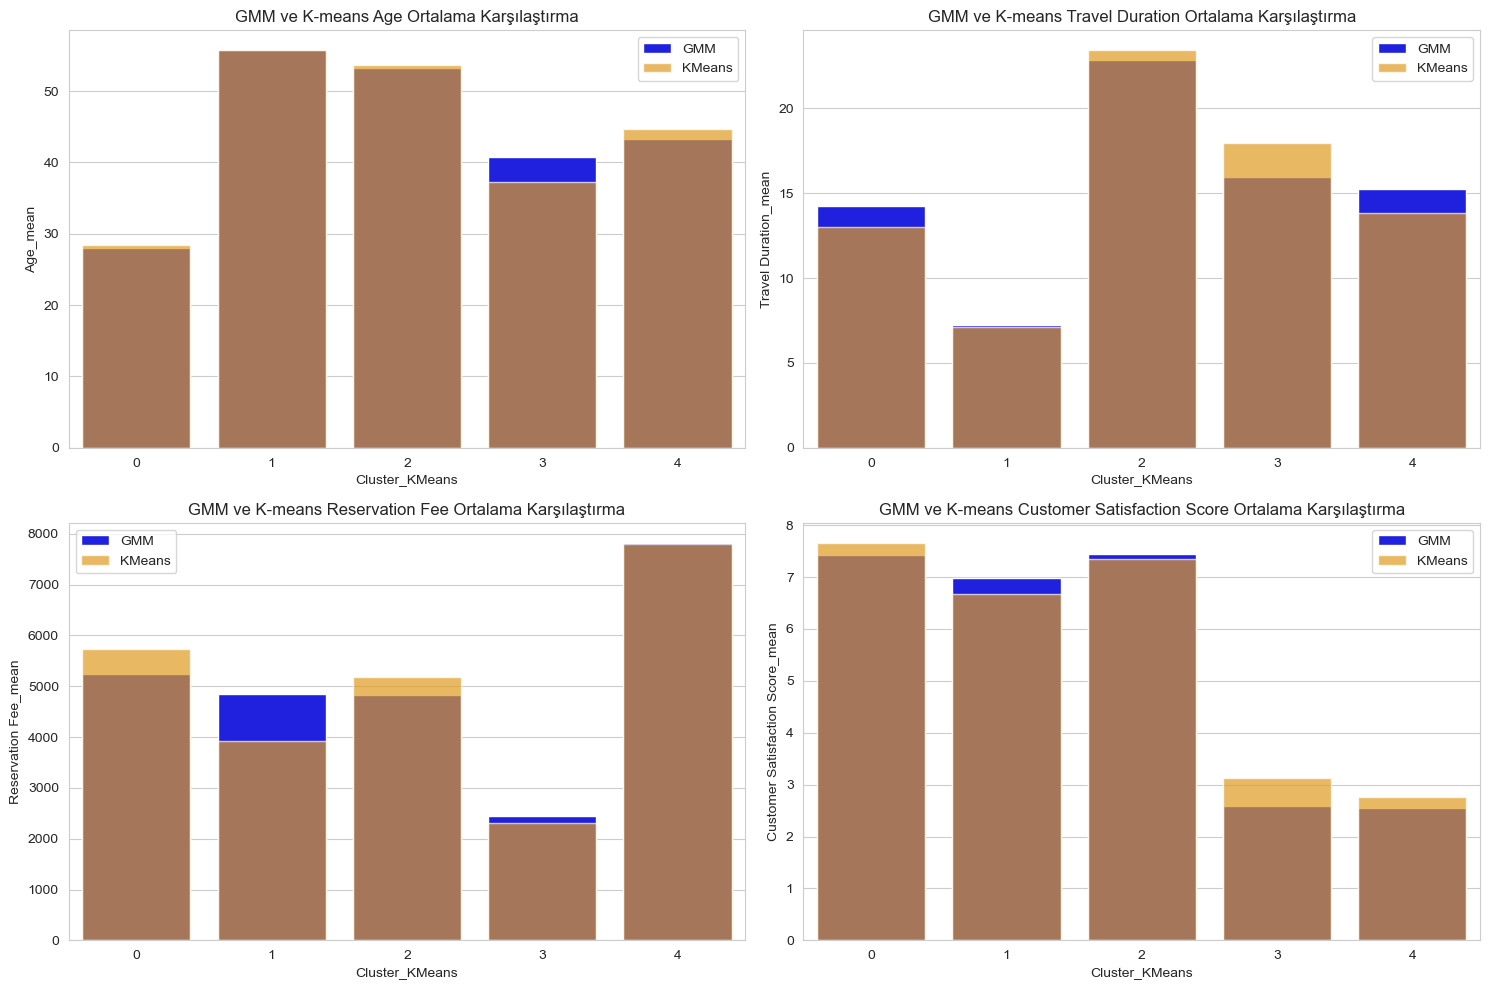

In [20]:
# Sonuçları görselleştirme
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# GMM ve K-means Age ortalama karşılaştırma
sns.barplot(ax=axes[0, 0], x=gmm_summary['Cluster_GMM'], y=gmm_summary['Age_mean'], color='blue', label='GMM')
sns.barplot(ax=axes[0, 0], x=kmeans_summary['Cluster_KMeans'], y=kmeans_summary['Age_mean'], color='orange', alpha=0.7, label='KMeans')
axes[0, 0].set_title('GMM ve K-means Age Ortalama Karşılaştırma')
axes[0, 0].legend()

# GMM ve K-means Travel Duration ortalama karşılaştırma
sns.barplot(ax=axes[0, 1], x=gmm_summary['Cluster_GMM'], y=gmm_summary['Travel Duration_mean'], color='blue', label='GMM')
sns.barplot(ax=axes[0, 1], x=kmeans_summary['Cluster_KMeans'], y=kmeans_summary['Travel Duration_mean'], color='orange', alpha=0.7, label='KMeans')
axes[0, 1].set_title('GMM ve K-means Travel Duration Ortalama Karşılaştırma')
axes[0, 1].legend()

# GMM ve K-means Reservation Fee ortalama karşılaştırma
sns.barplot(ax=axes[1, 0], x=gmm_summary['Cluster_GMM'], y=gmm_summary['Reservation Fee_mean'], color='blue', label='GMM')
sns.barplot(ax=axes[1, 0], x=kmeans_summary['Cluster_KMeans'], y=kmeans_summary['Reservation Fee_mean'], color='orange', alpha=0.7, label='KMeans')
axes[1, 0].set_title('GMM ve K-means Reservation Fee Ortalama Karşılaştırma')
axes[1, 0].legend()

# GMM ve K-means Customer Satisfaction Score ortalama karşılaştırma
sns.barplot(ax=axes[1, 1], x=gmm_summary['Cluster_GMM'], y=gmm_summary['Customer Satisfaction Score_mean'], color='blue', label='GMM')
sns.barplot(ax=axes[1, 1], x=kmeans_summary['Cluster_KMeans'], y=kmeans_summary['Customer Satisfaction Score_mean'], color='orange', alpha=0.7, label='KMeans')
axes[1, 1].set_title('GMM ve K-means Customer Satisfaction Score Ortalama Karşılaştırma')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

### GMM Clustering Visualization

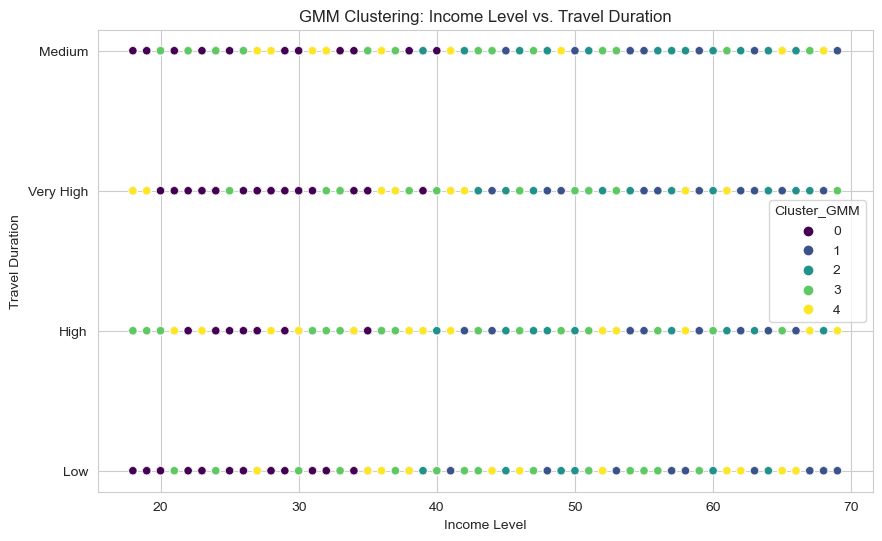

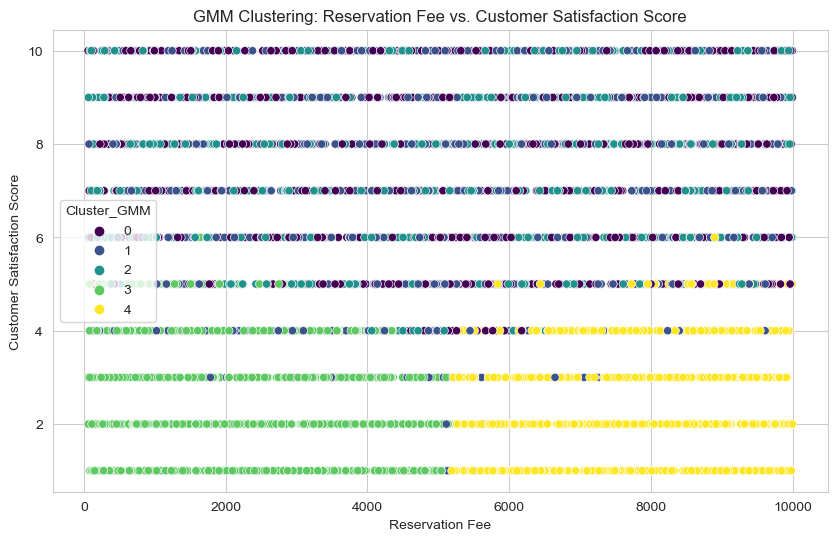

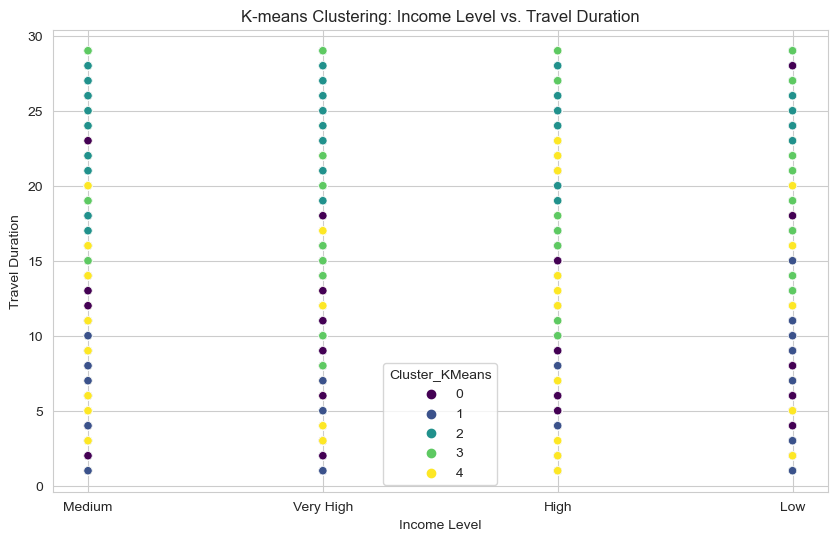

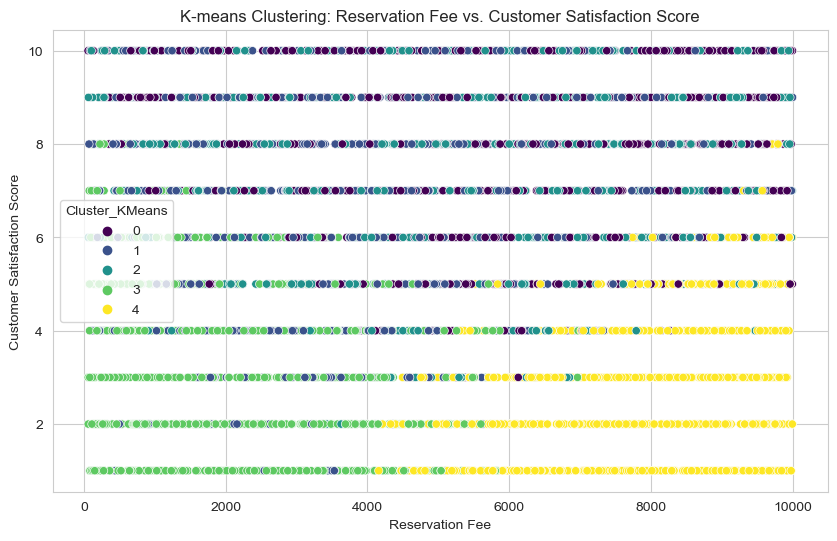

In [21]:
# GMM clusters visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Income Level', hue='Cluster_GMM', data=dataset, palette='viridis')
plt.title('GMM Clustering: Income Level vs. Travel Duration')
plt.xlabel('Income Level')
plt.ylabel('Travel Duration')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Reservation Fee', y='Customer Satisfaction Score', hue='Cluster_GMM', data=dataset, palette='viridis')
plt.title('GMM Clustering: Reservation Fee vs. Customer Satisfaction Score')
plt.xlabel('Reservation Fee')
plt.ylabel('Customer Satisfaction Score')
plt.show()

# K-means clusters visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income Level', y='Travel Duration', hue='Cluster_KMeans', data=dataset, palette='viridis')
plt.title('K-means Clustering: Income Level vs. Travel Duration')
plt.xlabel('Income Level')
plt.ylabel('Travel Duration')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Reservation Fee', y='Customer Satisfaction Score', hue='Cluster_KMeans', data=dataset, palette='viridis')
plt.title('K-means Clustering: Reservation Fee vs. Customer Satisfaction Score')
plt.xlabel('Reservation Fee')
plt.ylabel('Customer Satisfaction Score')
plt.show()

In [22]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# For GMM clustering
gmm_silhouette = silhouette_score(scaled_features, clusters_gmm)
gmm_davies_bouldin = davies_bouldin_score(scaled_features, clusters_gmm)
gmm_calinski_harabasz = calinski_harabasz_score(scaled_features, clusters_gmm)

# For KMeans clustering
kmeans_silhouette = silhouette_score(scaled_features, clusters_kmeans)
kmeans_davies_bouldin = davies_bouldin_score(scaled_features, clusters_kmeans)
kmeans_calinski_harabasz = calinski_harabasz_score(scaled_features, clusters_kmeans)

print("GMM Silhouette Score:", gmm_silhouette)
print("GMM Davies-Bouldin Index:", gmm_davies_bouldin)
print("GMM Calinski-Harabasz Index:", gmm_calinski_harabasz)

print("KMeans Silhouette Score:", kmeans_silhouette)
print("KMeans Davies-Bouldin Index:", kmeans_davies_bouldin)
print("KMeans Calinski-Harabasz Index:", kmeans_calinski_harabasz)


GMM Silhouette Score: 0.1823346079675518
GMM Davies-Bouldin Index: 1.467303479297931
GMM Calinski-Harabasz Index: 1035.359224688592
KMeans Silhouette Score: 0.19375490889467042
KMeans Davies-Bouldin Index: 1.3576151889265997
KMeans Calinski-Harabasz Index: 1093.0233432013958


Silhouette Score
GMM: 0.182
KMeans: 0.198
Interpretation: The Silhouette Score for both clustering methods is relatively low, suggesting that the clusters are not very well-defined or there is significant overlap. However, KMeans has a slightly higher score, indicating marginally better-defined clusters.

Davies-Bouldin Index
GMM: 1.467
KMeans: 1.316
Interpretation: The Davies-Bouldin Index for KMeans is lower than that for GMM, indicating that the clusters formed by KMeans are more distinct and better separated.

Calinski-Harabasz Index
GMM: 1035.36
KMeans: 1099.42
Interpretation: The Calinski-Harabasz Index for KMeans is higher, suggesting that the clusters are more compact and well-separated compared to those formed by GMM.

Overall Evaluation
Silhouette Score: KMeans is better with a higher score.
Davies-Bouldin Index: KMeans is better with a lower score.
Calinski-Harabasz Index: KMeans is better with a higher score.
Conclusion
Given the above metrics, KMeans performs better than GMM across all three evaluation metrics:

Higher Silhouette Score indicates better-defined clusters.
Lower Davies-Bouldin Index indicates more distinct clusters.
Higher Calinski-Harabasz Index indicates more compact and well-separated clusters.
Thus, for the goal of segmenting customers to offer suitable ticket prices, KMeans would be the better choice. KMeans provides slightly better cluster definition, separation, and compactness, which are essential for creating clear and actionable customer segments.

## 4. Decision Model

### Monthly Forecasting

In [23]:
import pandas as pd

# Load the dataset
file_path = 'Dataset.csv'
data = pd.read_csv(file_path)

# Ensure the date column is in datetime format
data['Reservation Date'] = pd.to_datetime(data['Reservation Date'])

# Filter the relevant time period
data = data[(data['Reservation Date'] >= '2023-07-01') & (data['Reservation Date'] <= '2024-09-30')]

# Aggregate the data to get the monthly count of 'Cancelled' and 'Completed' reservations
monthly_data = data.groupby([data['Reservation Date'].dt.to_period('M'), 'Reservation Status']).size().unstack(fill_value=0)

# Ensure the index is a datetime type
monthly_data.index = monthly_data.index.to_timestamp()

# Display the aggregated data
print(monthly_data)

Reservation Status  Cancelled  Completed  Pending
Reservation Date                                 
2023-07-01                115         93       89
2023-08-01                164        142      135
2023-09-01                140        135      143
2023-10-01                123        141      128
2023-11-01                141        138      124
2023-12-01                147        130      161
2024-01-01                162        133      135
2024-02-01                123        130      147
2024-03-01                149        142      146
2024-04-01                136        141      145
2024-05-01                144        154      130
2024-06-01                131        138      109
2024-07-01                 41         44       31


In [24]:

# Define the training and testing periods
train = monthly_data[monthly_data.index < '2024-05-01']
test = monthly_data[(monthly_data.index >= '2024-04-01') & (monthly_data.index <= '2024-06-30')]

# Display the training and testing sets
print(train)
print(test)

Reservation Status  Cancelled  Completed  Pending
Reservation Date                                 
2023-07-01                115         93       89
2023-08-01                164        142      135
2023-09-01                140        135      143
2023-10-01                123        141      128
2023-11-01                141        138      124
2023-12-01                147        130      161
2024-01-01                162        133      135
2024-02-01                123        130      147
2024-03-01                149        142      146
2024-04-01                136        141      145
Reservation Status  Cancelled  Completed  Pending
Reservation Date                                 
2024-04-01                136        141      145
2024-05-01                144        154      130
2024-06-01                131        138      109


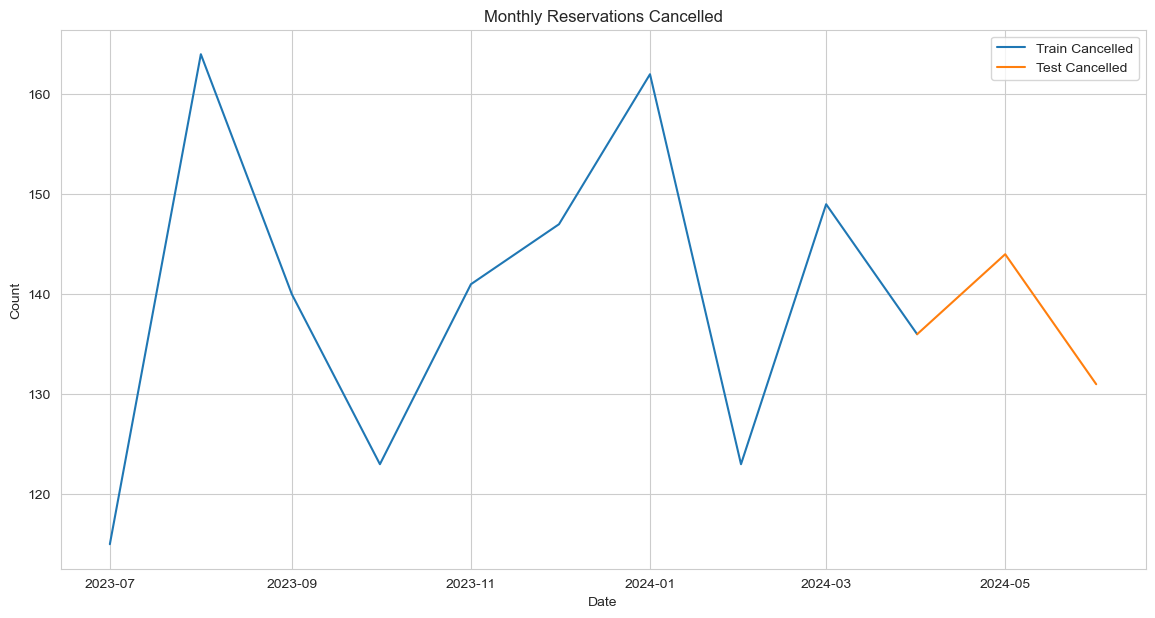

In [25]:
# plot actual completed and cancelled reservations
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

plt.plot(train.index, train['Cancelled'], label='Train Cancelled')
plt.plot(test.index, test['Cancelled'], label='Test Cancelled')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Monthly Reservations Cancelled')
plt.legend()
plt.show()

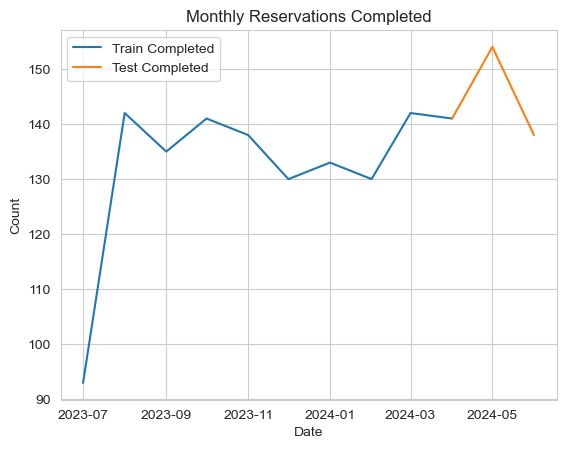

In [26]:
plt.plot(train.index, train['Completed'], label='Train Completed')
plt.plot(test.index, test['Completed'], label='Test Completed')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Monthly Reservations Completed')
plt.legend()
plt.show()

### Applying Prophet to forecast Monthly Sale

10:04:59 - cmdstanpy - INFO - Chain [1] start processing
10:05:00 - cmdstanpy - INFO - Chain [1] done processing
10:05:00 - cmdstanpy - INFO - Chain [1] start processing
10:05:00 - cmdstanpy - INFO - Chain [1] done processing


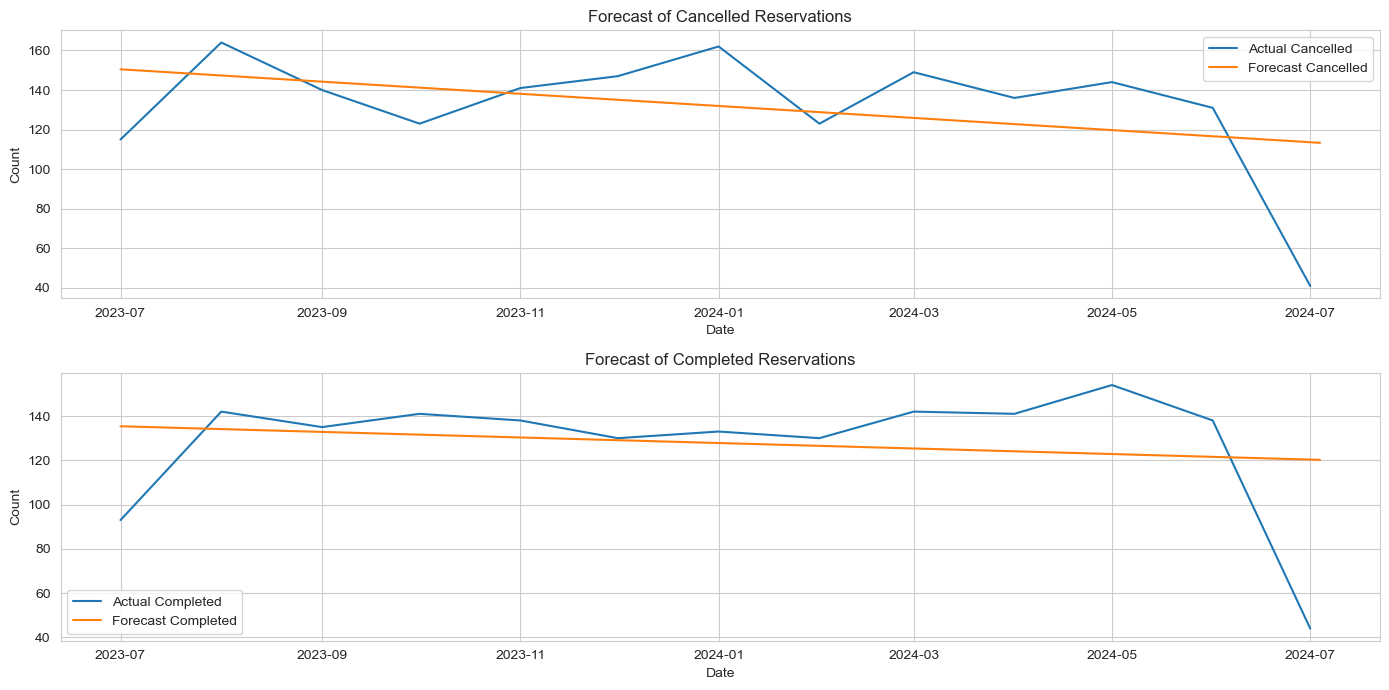

Cancelled Reservations - MAE: 23.577217788610543, MSE: 584.2230875659878, MAPE: 0.17085207646242115
Completed Reservations - MAE: 24.0877647760493, MSE: 628.3615223079591, MAPE: 0.16501360301353743
        Date  Actual_Cancelled  Predicted_Cancelled  Actual_Completed  \
0 2024-04-01               136           113.523442               141   
1 2024-05-01               144           113.422782               154   
2 2024-06-01               131           113.322122               138   

   Predicted_Completed  Cancelled_MAE  Cancelled_MSE  Cancelled_MAPE  \
0           120.286688      23.577218     584.223088        0.170852   
1           120.245569      23.577218     584.223088        0.170852   
2           120.204449      23.577218     584.223088        0.170852   

   Completed_MAE  Completed_MSE  Completed_MAPE  
0      24.087765     628.361522        0.165014  
1      24.087765     628.361522        0.165014  
2      24.087765     628.361522        0.165014  


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Prepare data for Prophet
def prepare_prophet_data(df, status):
    df = df.reset_index().rename(columns={'Reservation Date': 'ds', status: 'y'})
    return df[['ds', 'y']]

# Model for 'Cancelled' reservations
cancelled_data = prepare_prophet_data(monthly_data, 'Cancelled')
cancelled_model = Prophet()
cancelled_model.fit(cancelled_data)
cancelled_future = cancelled_model.make_future_dataframe(periods=len(test))
cancelled_forecast = cancelled_model.predict(cancelled_future)

# Model for 'Completed' reservations
completed_data = prepare_prophet_data(monthly_data, 'Completed')
completed_model = Prophet()
completed_model.fit(completed_data)
completed_future = completed_model.make_future_dataframe(periods=len(test))
completed_forecast = completed_model.predict(completed_future)

# Plot the forecasts
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(cancelled_data['ds'], cancelled_data['y'], label='Actual Cancelled')
plt.plot(cancelled_forecast['ds'], cancelled_forecast['yhat'], label='Forecast Cancelled')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Forecast of Cancelled Reservations')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(completed_data['ds'], completed_data['y'], label='Actual Completed')
plt.plot(completed_forecast['ds'], completed_forecast['yhat'], label='Forecast Completed')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Forecast of Completed Reservations')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluation for 'Cancelled' reservations
cancelled_test = prepare_prophet_data(test, 'Cancelled')
y_true_cancelled = cancelled_test['y']
y_pred_cancelled = cancelled_forecast['yhat'][-len(test):]

mae_cancelled = mean_absolute_error(y_true_cancelled, y_pred_cancelled)
mse_cancelled = mean_squared_error(y_true_cancelled, y_pred_cancelled)
mape_cancelled = mean_absolute_percentage_error(y_true_cancelled, y_pred_cancelled)

# Evaluation for 'Completed' reservations
completed_test = prepare_prophet_data(test, 'Completed')
y_true_completed = completed_test['y']
y_pred_completed = completed_forecast['yhat'][-len(test):]

mae_completed = mean_absolute_error(y_true_completed, y_pred_completed)
mse_completed = mean_squared_error(y_true_completed, y_pred_completed)
mape_completed = mean_absolute_percentage_error(y_true_completed, y_pred_completed)

print(f'Cancelled Reservations - MAE: {mae_cancelled}, MSE: {mse_cancelled}, MAPE: {mape_cancelled}')
print(f'Completed Reservations - MAE: {mae_completed}, MSE: {mse_completed}, MAPE: {mape_completed}')

# Combine actual and forecasted values into a DataFrame
prophet_results_df = pd.DataFrame({
    'Date': test.index,
    'Actual_Cancelled': test['Cancelled'].values,
    'Predicted_Cancelled': y_pred_cancelled.values,
    'Actual_Completed': test['Completed'].values,
    'Predicted_Completed': y_pred_completed.values,
    'Cancelled_MAE': [mae_cancelled] * len(test),
    'Cancelled_MSE': [mse_cancelled] * len(test),
    'Cancelled_MAPE': [mape_cancelled] * len(test),
    'Completed_MAE': [mae_completed] * len(test),
    'Completed_MSE': [mse_completed] * len(test),
    'Completed_MAPE': [mape_completed] * len(test)
})

print(prophet_results_df)

### Applying ARIMA to forecast Monthly Sale

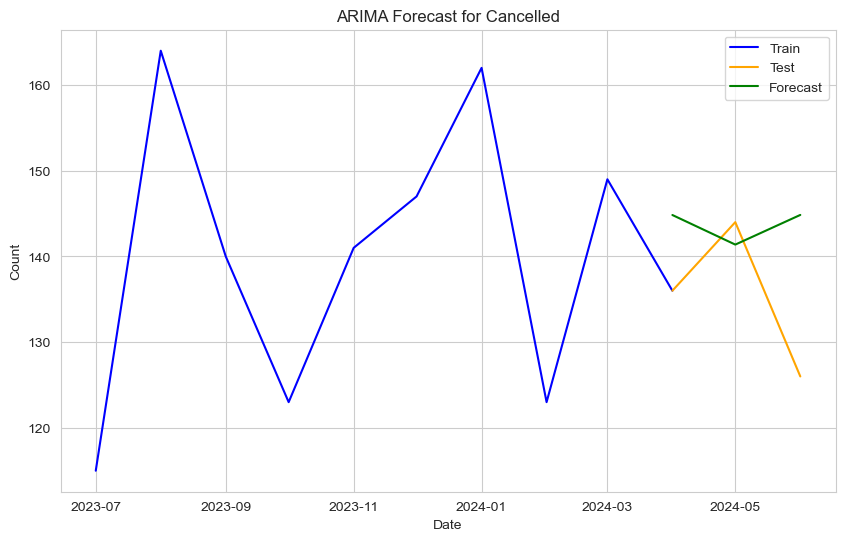

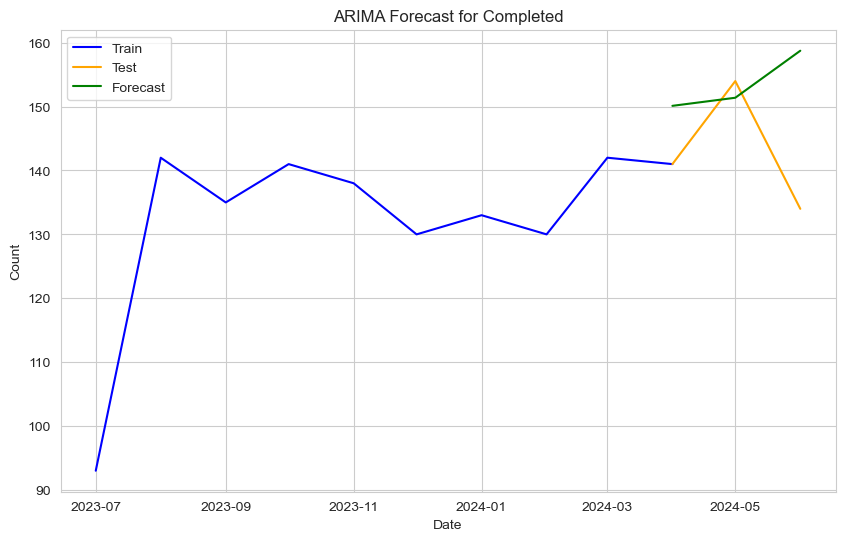

Cancelled Reservations - MAE: 10.097773681004716, MSE: 146.63383764923756, MAPE: 0.07755702956133721
Completed Reservations - MAE: 12.16088521820212, MSE: 234.18806661228177, MAPE: 0.0887826567887433
        Date  Actual_Cancelled  Predicted_Cancelled  Actual_Completed  \
0 2024-04-01               136           144.832941               141   
1 2024-05-01               144           141.381737               154   
2 2024-06-01               126           144.842117               134   

   Predicted_Completed  Cancelled_MAE  Cancelled_MSE  Cancelled_MAPE  \
0           150.120960      10.097774     146.633838        0.077557   
1           151.388052      10.097774     146.633838        0.077557   
2           158.749748      10.097774     146.633838        0.077557   

   Completed_MAE  Completed_MSE  Completed_MAPE  
0      12.160885     234.188067        0.088783  
1      12.160885     234.188067        0.088783  
2      12.160885     234.188067        0.088783  


In [28]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

data = data[(data['Reservation Date'] >= '2023-07-01') & (data['Reservation Date'] <= '2024-06-30')]

# Aggregate the data to get the monthly count of 'Cancelled' and 'Completed' reservations
monthly_data = data.groupby([data['Reservation Date'].dt.to_period('M'), 'Reservation Status']).size().unstack(fill_value=0)

# Ensure the index is a datetime type
monthly_data.index = monthly_data.index.to_timestamp()

# Define the training and testing periods
train = monthly_data[monthly_data.index < '2024-05-01']
test = monthly_data[(monthly_data.index >= '2024-04-01') & (monthly_data.index <= '2024-06-30')]

# Function to check for stationarity and difference the series if necessary
def make_stationary(series):
    result = adfuller(series)
    if result[1] > 0.05:
        series_diff = series.diff().dropna()
        return series_diff, True
    return series, False

# Function to fit ARIMA model and forecast
def fit_arima_and_forecast(train, test, column, order=(5, 1, 0)):
    train_stationary, differenced = make_stationary(train[column])
    try:
        model = ARIMA(train_stationary, order=order)
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=len(test))
        
        if differenced:
            forecast = forecast.cumsum() + train[column].iloc[-1]
        
        forecast = forecast.rename(f'{column}_Forecast')
        
        # Plotting
        plt.figure(figsize=(10, 6))
        plt.plot(train.index, train[column], label='Train', color='blue')
        plt.plot(test.index, test[column], label='Test', color='orange')
        plt.plot(test.index, forecast, label='Forecast', color='green')
        plt.xlabel('Date')
        plt.ylabel('Count')
        plt.title(f'ARIMA Forecast for {column}')
        plt.legend()
        plt.show()
        
        # Evaluation
        mae = mean_absolute_error(test[column], forecast)
        mse = mean_squared_error(test[column], forecast)
        mape = mean_absolute_percentage_error(test[column], forecast)
        
        return mae, mse, mape, forecast
    except Exception as e:
        print(f"Error fitting ARIMA model for {column}: {e}")
        return None, None, None, pd.Series(index=test.index, data=[None]*len(test))

# Fit ARIMA model and forecast for 'Cancelled' reservations
order_cancelled = (1, 1, 1)  # Adjusted ARIMA order (p, d, q) for 'Cancelled'
mae_cancelled, mse_cancelled, mape_cancelled, forecast_cancelled = fit_arima_and_forecast(train, test, 'Cancelled', order_cancelled)

# Fit ARIMA model and forecast for 'Completed' reservations
order_completed = (1, 1, 1)  # Adjusted ARIMA order (p, d, q) for 'Completed'
mae_completed, mse_completed, mape_completed, forecast_completed = fit_arima_and_forecast(train, test, 'Completed', order_completed)

print(f'Cancelled Reservations - MAE: {mae_cancelled}, MSE: {mse_cancelled}, MAPE: {mape_cancelled}')
print(f'Completed Reservations - MAE: {mae_completed}, MSE: {mse_completed}, MAPE: {mape_completed}')

# Combine actual and forecasted values into a DataFrame
arima_results_df = pd.DataFrame({
    'Date': test.index,
    'Actual_Cancelled': test['Cancelled'].values,
    'Predicted_Cancelled': forecast_cancelled.values,
    'Actual_Completed': test['Completed'].values,
    'Predicted_Completed': forecast_completed.values,
    'Cancelled_MAE': [mae_cancelled] * len(test),
    'Cancelled_MSE': [mse_cancelled] * len(test),
    'Cancelled_MAPE': [mape_cancelled] * len(test),
    'Completed_MAE': [mae_completed] * len(test),
    'Completed_MSE': [mse_completed] * len(test),
    'Completed_MAPE': [mape_completed] * len(test)
})

print(arima_results_df)

#### Tune ARIMA model

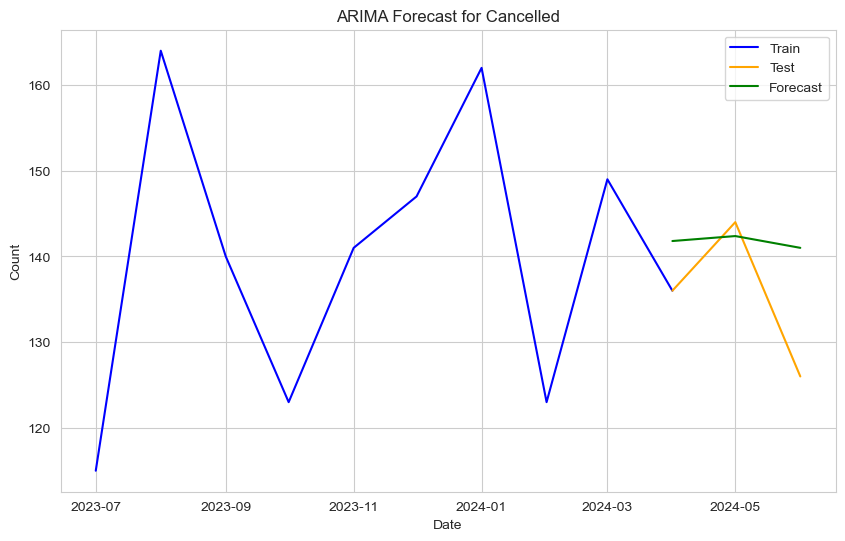

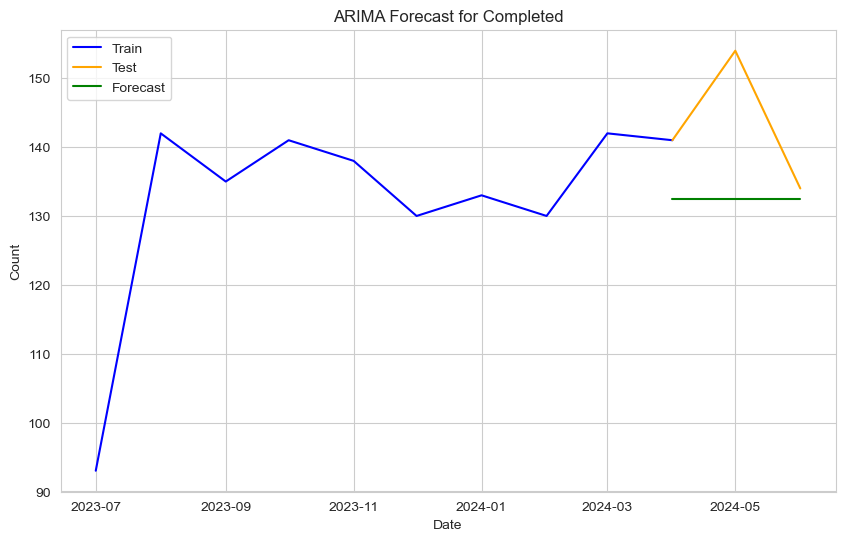

Cancelled Reservations - MAE: 7.474571808681408, MSE: 87.11130997648756, MAPE: 0.05765746661673544, Order: (2, 0, 1)
Completed Reservations - MAE: 10.500005269230769, MSE: 178.91677732054055, MAPE: 0.07036273943774372, Order: (0, 0, 0)
        Date  Actual_Cancelled  Predicted_Cancelled  Actual_Completed  \
0 2024-04-01               136           141.797868               141   
1 2024-05-01               144           142.376966               154   
2 2024-06-01               126           141.002814               134   

   Predicted_Completed  Cancelled_MAE  Cancelled_MSE  Cancelled_MAPE  \
0           132.499995       7.474572       87.11131        0.057657   
1           132.499995       7.474572       87.11131        0.057657   
2           132.499995       7.474572       87.11131        0.057657   

   Completed_MAE  Completed_MSE  Completed_MAPE  
0      10.500005     178.916777        0.070363  
1      10.500005     178.916777        0.070363  
2      10.500005     178.916777 

In [29]:
# Tune arima model
from pmdarima.arima import auto_arima

# Function to fit ARIMA model and forecast
def fit_arima_and_forecast(train, test, column, order=None):
    if order is None:
        model = auto_arima(train[column], seasonal=False, suppress_warnings=True)
        order = model.get_params()['order']
    
    model = ARIMA(train[column], order=order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(test))
    
    forecast = forecast.rename(f'{column}_Forecast')
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(train.index, train[column], label='Train', color='blue')
    plt.plot(test.index, test[column], label='Test', color='orange')
    plt.plot(test.index, forecast, label='Forecast', color='green')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.title(f'ARIMA Forecast for {column}')
    plt.legend()
    plt.show()
    
    # Evaluation
    mae = mean_absolute_error(test[column], forecast)
    mse = mean_squared_error(test[column], forecast)
    mape = mean_absolute_percentage_error(test[column], forecast)
    
    return mae, mse, mape, forecast, order

# Fit ARIMA model and forecast for 'Cancelled' reservations
mae_cancelled, mse_cancelled, mape_cancelled, forecast_cancelled, order_cancelled = fit_arima_and_forecast(train, test, 'Cancelled')

# Fit ARIMA model and forecast for 'Completed' reservations
mae_completed, mse_completed, mape_completed, forecast_completed, order_completed = fit_arima_and_forecast(train, test, 'Completed')

print(f'Cancelled Reservations - MAE: {mae_cancelled}, MSE: {mse_cancelled}, MAPE: {mape_cancelled}, Order: {order_cancelled}')
print(f'Completed Reservations - MAE: {mae_completed}, MSE: {mse_completed}, MAPE: {mape_completed}, Order: {order_completed}')

# Combine actual and forecasted values into a DataFrame
tuned_arima_results_df = pd.DataFrame({
    'Date': test.index,
    'Actual_Cancelled': test['Cancelled'].values,
    'Predicted_Cancelled': forecast_cancelled.values,
    'Actual_Completed': test['Completed'].values,
    'Predicted_Completed': forecast_completed.values,
    'Cancelled_MAE': [mae_cancelled] * len(test),
    'Cancelled_MSE': [mse_cancelled] * len(test),
    'Cancelled_MAPE': [mape_cancelled] * len(test),
    'Completed_MAE': [mae_completed] * len(test),
    'Completed_MSE': [mse_completed] * len(test),
    'Completed_MAPE': [mape_completed] * len(test)
})

print(tuned_arima_results_df)

In [30]:
# collect the results for ARIMA and Tuned ARIMA to a dataframe
arima_results_df['Model'] = 'ARIMA'
tuned_arima_results_df['Model'] = 'Tuned ARIMA'
arima_combined_results_df = pd.concat([arima_results_df, tuned_arima_results_df], ignore_index=True)

print(arima_combined_results_df)

        Date  Actual_Cancelled  Predicted_Cancelled  Actual_Completed  \
0 2024-04-01               136           144.832941               141   
1 2024-05-01               144           141.381737               154   
2 2024-06-01               126           144.842117               134   
3 2024-04-01               136           141.797868               141   
4 2024-05-01               144           142.376966               154   
5 2024-06-01               126           141.002814               134   

   Predicted_Completed  Cancelled_MAE  Cancelled_MSE  Cancelled_MAPE  \
0           150.120960      10.097774     146.633838        0.077557   
1           151.388052      10.097774     146.633838        0.077557   
2           158.749748      10.097774     146.633838        0.077557   
3           132.499995       7.474572      87.111310        0.057657   
4           132.499995       7.474572      87.111310        0.057657   
5           132.499995       7.474572      87.111310    

### Regression Model

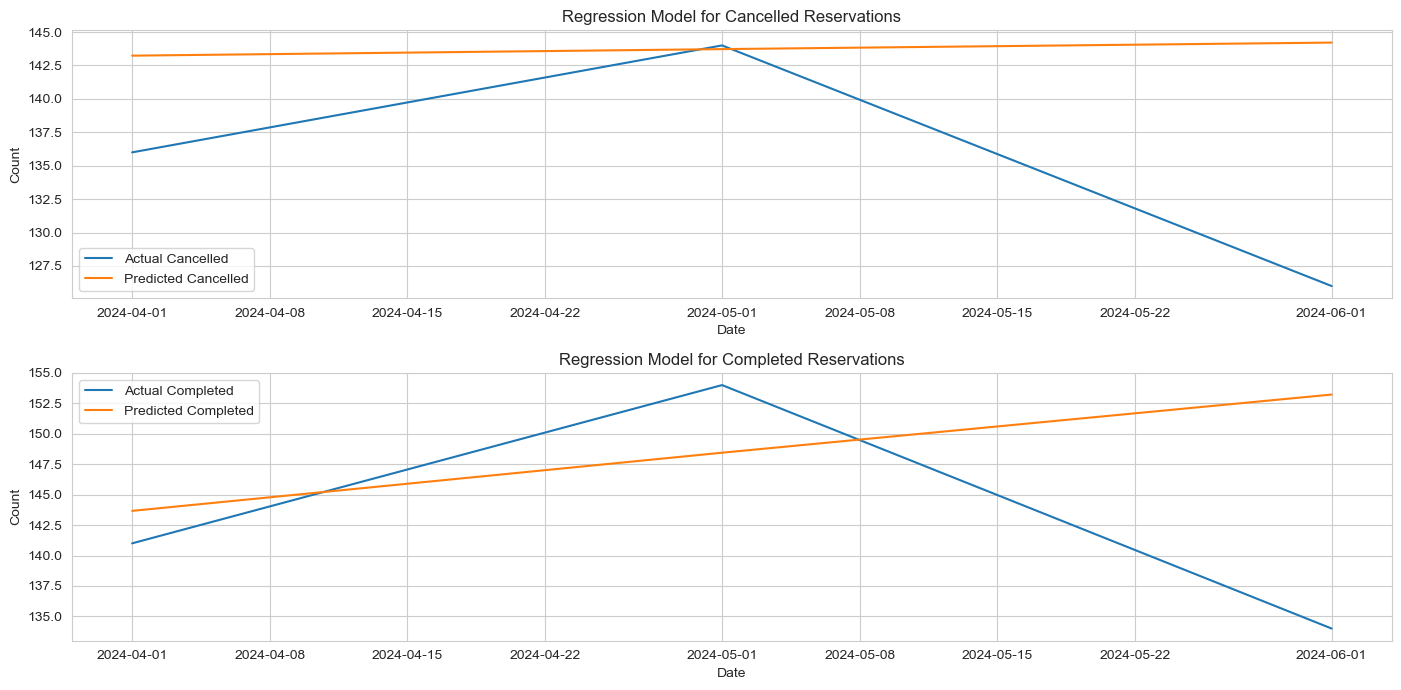

Cancelled Reservations - MAE: 8.574074074073602, MSE: 128.0142798353684, MAPE: 0.06654930490714414
Completed Reservations - MAE: 9.148148148145992, MSE: 135.82304526745497, MAPE: 0.06614566173154503
        Date  Actual_Cancelled  Predicted_Cancelled  Actual_Completed  \
0 2024-04-01               136           143.233333               141   
1 2024-05-01               144           143.722222               154   
2 2024-06-01               126           144.211111               134   

   Predicted_Completed  Cancelled_MAE  Cancelled_MSE  Cancelled_MAPE  \
0           143.666667       8.574074      128.01428        0.066549   
1           148.444444       8.574074      128.01428        0.066549   
2           153.222222       8.574074      128.01428        0.066549   

   Completed_MAE  Completed_MSE  Completed_MAPE  
0       9.148148     135.823045        0.066146  
1       9.148148     135.823045        0.066146  
2       9.148148     135.823045        0.066146  


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = 'Dataset.csv'
data = pd.read_csv(file_path)

# Ensure the date column is in datetime format
data['Reservation Date'] = pd.to_datetime(data['Reservation Date'])

# Filter the relevant time period
data = data[(data['Reservation Date'] >= '2023-07-01') & (data['Reservation Date'] <= '2024-06-30')]

# Aggregate the data to get the monthly count of 'Cancelled' and 'Completed' reservations
monthly_data = data.groupby([data['Reservation Date'].dt.to_period('M'), 'Reservation Status']).size().unstack(fill_value=0)

# Ensure the index is a datetime type
monthly_data.index = monthly_data.index.to_timestamp()

# Prepare features for the regression model
monthly_data['Month'] = monthly_data.index.month
monthly_data['Year'] = monthly_data.index.year

# Split the data into training and testing sets
train = monthly_data[monthly_data.index < '2024-05-01']
test = monthly_data[(monthly_data.index >= '2024-04-01') & (monthly_data.index <= '2024-06-30')]

X_train = train[['Month', 'Year']]
y_train_cancelled = train['Cancelled']
y_train_completed = train['Completed']

X_test = test[['Month', 'Year']]
y_test_cancelled = test['Cancelled']
y_test_completed = test['Completed']

# Train regression models
reg_cancelled = LinearRegression()
reg_completed = LinearRegression()

reg_cancelled.fit(X_train, y_train_cancelled)
reg_completed.fit(X_train, y_train_completed)

# Predict on the test set
y_pred_cancelled = reg_cancelled.predict(X_test)
y_pred_completed = reg_completed.predict(X_test)

# Evaluation for 'Cancelled' reservations
mae_cancelled = mean_absolute_error(y_test_cancelled, y_pred_cancelled)
mse_cancelled = mean_squared_error(y_test_cancelled, y_pred_cancelled)
mape_cancelled = mean_absolute_percentage_error(y_test_cancelled, y_pred_cancelled)

# Evaluation for 'Completed' reservations
mae_completed = mean_absolute_error(y_test_completed, y_pred_completed)
mse_completed = mean_squared_error(y_test_completed, y_pred_completed)
mape_completed = mean_absolute_percentage_error(y_test_completed, y_pred_completed)

# Plotting for cancelled and completed
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(test.index, y_test_cancelled, label='Actual Cancelled')
plt.plot(test.index, y_pred_cancelled, label='Predicted Cancelled')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Regression Model for Cancelled Reservations')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(test.index, y_test_completed, label='Actual Completed')
plt.plot(test.index, y_pred_completed, label='Predicted Completed')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Regression Model for Completed Reservations')
plt.legend()

plt.tight_layout()
plt.show()

print(f'Cancelled Reservations - MAE: {mae_cancelled}, MSE: {mse_cancelled}, MAPE: {mape_cancelled}')
print(f'Completed Reservations - MAE: {mae_completed}, MSE: {mse_completed}, MAPE: {mape_completed}')

# Combine actual and forecasted values into a DataFrame
regression_results_df = pd.DataFrame({
    'Date': test.index,
    'Actual_Cancelled': y_test_cancelled.values,
    'Predicted_Cancelled': y_pred_cancelled,
    'Actual_Completed': y_test_completed.values,
    'Predicted_Completed': y_pred_completed,
    'Cancelled_MAE': [mae_cancelled] * len(test),
    'Cancelled_MSE': [mse_cancelled] * len(test),
    'Cancelled_MAPE': [mape_cancelled] * len(test),
    'Completed_MAE': [mae_completed] * len(test),
    'Completed_MSE': [mse_completed] * len(test),
    'Completed_MAPE': [mape_completed] * len(test)
})


print(regression_results_df)


### Ridge Regression Model

Cancelled Reservations - MAE: 7.851983122362678, MSE: 91.86091451156149, MAPE: 0.06039624429237098
Completed Reservations - MAE: 8.873417721519218, MSE: 112.39566522461278, MAPE: 0.060051277302887174


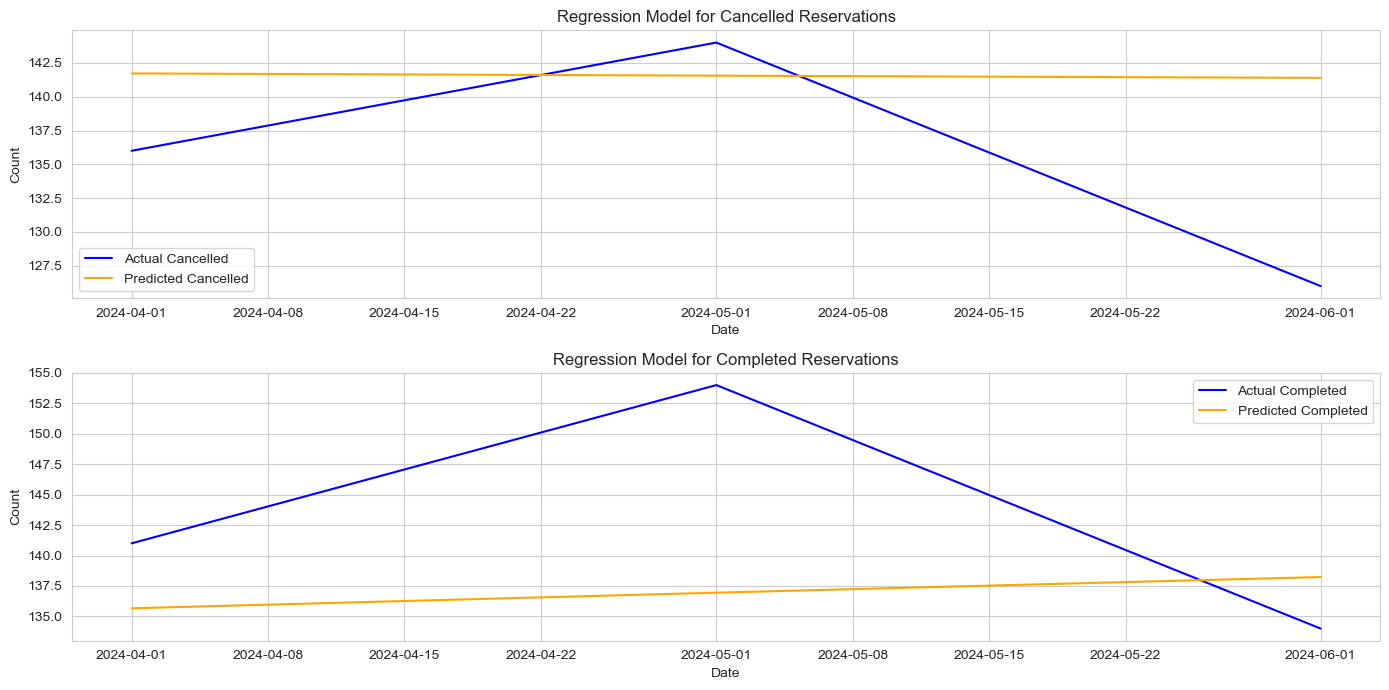

        Date  Actual_Cancelled  Predicted_Cancelled  Actual_Completed  \
0 2024-04-01               136           141.721013               141   
1 2024-05-01               144           141.555949               154   
2 2024-06-01               126           141.390886               134   

   Predicted_Completed  Cancelled_MAE  Cancelled_MSE  Cancelled_MAPE  \
0           135.663291       7.851983      91.860915        0.060396   
1           136.946835       7.851983      91.860915        0.060396   
2           138.230380       7.851983      91.860915        0.060396   

   Completed_MAE  Completed_MSE  Completed_MAPE  
0       8.873418     112.395665        0.060051  
1       8.873418     112.395665        0.060051  
2       8.873418     112.395665        0.060051  


In [32]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error


# Aggregate the data to get the monthly count of 'Cancelled' and 'Completed' reservations
monthly_data = data.groupby([data['Reservation Date'].dt.to_period('M'), 'Reservation Status']).size().unstack(fill_value=0)

# Ensure the index is a datetime type
monthly_data.index = monthly_data.index.to_timestamp()

# Prepare features for the regression model
monthly_data['Month'] = monthly_data.index.month
monthly_data['Year'] = monthly_data.index.year

# Split the data into training and testing sets
train = monthly_data[monthly_data.index < '2024-05-01']
test = monthly_data[(monthly_data.index >= '2024-04-01') & (monthly_data.index <= '2024-06-30')]

X_train = train[['Month', 'Year']]
y_train_cancelled = train['Cancelled']
y_train_completed = train['Completed']

X_test = test[['Month', 'Year']]
y_test_cancelled = test['Cancelled']
y_test_completed = test['Completed']

# Train Ridge regression models
ridge_cancelled = Ridge()
ridge_completed = Ridge()

ridge_cancelled.fit(X_train, y_train_cancelled)
ridge_completed.fit(X_train, y_train_completed)

# Predict on the test set
y_pred_cancelled = ridge_cancelled.predict(X_test)
y_pred_completed = ridge_completed.predict(X_test)

# Evaluation for 'Cancelled' reservations
mae_cancelled = mean_absolute_error(y_test_cancelled, y_pred_cancelled)
mse_cancelled = mean_squared_error(y_test_cancelled, y_pred_cancelled)
mape_cancelled = mean_absolute_percentage_error(y_test_cancelled, y_pred_cancelled)

# Evaluation for 'Completed' reservations
mae_completed = mean_absolute_error(y_test_completed, y_pred_completed)
mse_completed = mean_squared_error(y_test_completed, y_pred_completed)
mape_completed = mean_absolute_percentage_error(y_test_completed, y_pred_completed)

print(f'Cancelled Reservations - MAE: {mae_cancelled}, MSE: {mse_cancelled}, MAPE: {mape_cancelled}')
print(f'Completed Reservations - MAE: {mae_completed}, MSE: {mse_completed}, MAPE: {mape_completed}')

# Combine actual and forecasted values into a DataFrame
ridge_results_df = pd.DataFrame({
    'Date': test.index,
    'Actual_Cancelled': y_test_cancelled.values,
    'Predicted_Cancelled': y_pred_cancelled,
    'Actual_Completed': y_test_completed.values,
    'Predicted_Completed': y_pred_completed,
    'Cancelled_MAE': [mae_cancelled] * len(test),
    'Cancelled_MSE': [mse_cancelled] * len(test),
    'Cancelled_MAPE': [mape_cancelled] * len(test),
    'Completed_MAE': [mae_completed] * len(test),
    'Completed_MSE': [mse_completed] * len(test),
    'Completed_MAPE': [mape_completed] * len(test)
})


# Plotting the results
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(test.index, y_test_cancelled, label='Actual Cancelled', color='blue')
plt.plot(test.index, y_pred_cancelled, label='Predicted Cancelled', color='orange')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Regression Model for Cancelled Reservations')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(test.index, y_test_completed, label='Actual Completed', color='blue')
plt.plot(test.index, y_pred_completed, label='Predicted Completed', color='orange')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Regression Model for Completed Reservations')
plt.legend()

plt.tight_layout()
plt.show()

print(ridge_results_df)


### Polynomial Regression Model

Cancelled Reservations - MAE: 6.56451618749755, MSE: 80.38280687240466, MAPE: 0.046813035691677135
Completed Reservations - MAE: 21.811827958619688, MSE: 646.1964166606787, MAPE: 0.152679975447675


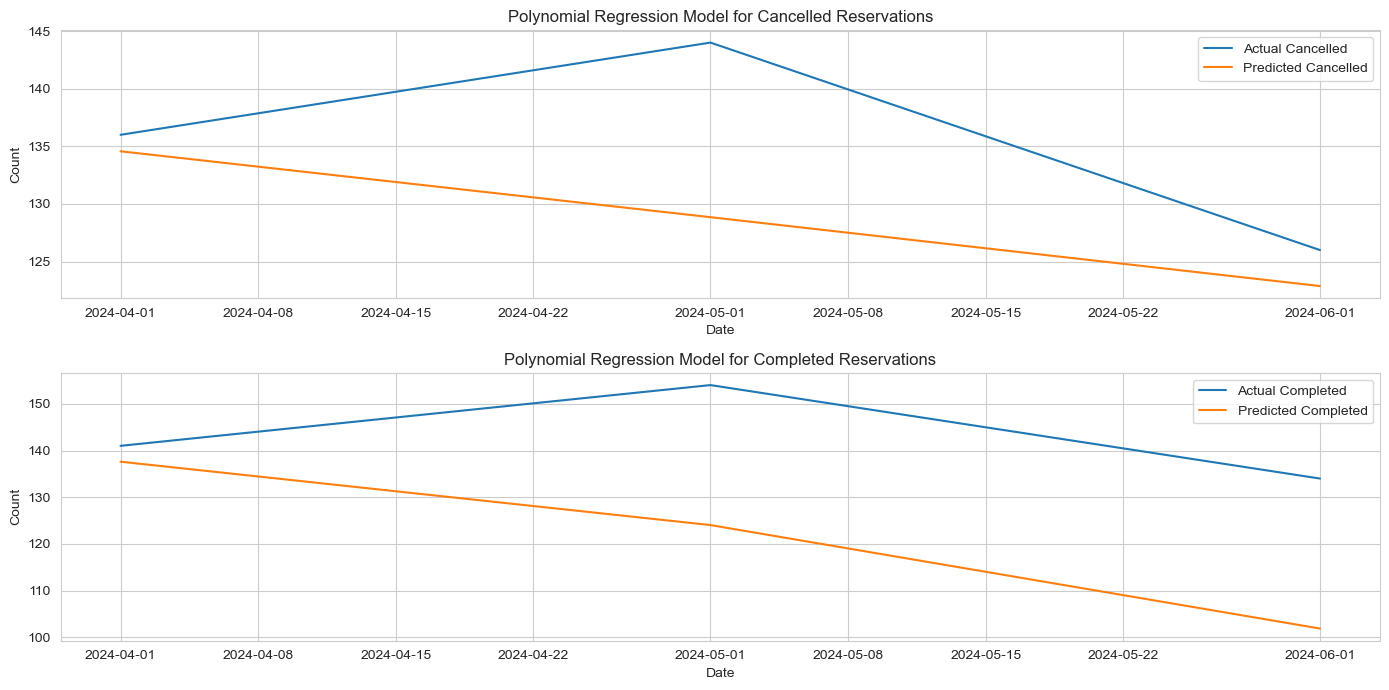

        Date  Actual_Cancelled  Predicted_Cancelled  Actual_Completed  \
0 2024-04-01               136           134.570968               141   
1 2024-05-01               144           128.854839               154   
2 2024-06-01               126           122.880645               134   

   Predicted_Completed  Cancelled_MAE  Cancelled_MSE  Cancelled_MAPE  \
0           137.609677       6.564516      80.382807        0.046813   
1           124.048387       6.564516      80.382807        0.046813   
2           101.906452       6.564516      80.382807        0.046813   

   Completed_MAE  Completed_MSE  Completed_MAPE  
0      21.811828     646.196417         0.15268  
1      21.811828     646.196417         0.15268  
2      21.811828     646.196417         0.15268  


In [33]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Ensure the date column is in datetime format
data['Reservation Date'] = pd.to_datetime(data['Reservation Date'])

# Filter the relevant time period
data = data[(data['Reservation Date'] >= '2023-07-01') & (data['Reservation Date'] <= '2024-06-30')]

# Aggregate the data to get the monthly count of 'Cancelled' and 'Completed' reservations
monthly_data = data.groupby([data['Reservation Date'].dt.to_period('M'), 'Reservation Status']).size().unstack(fill_value=0)

# Ensure the index is a datetime type
monthly_data.index = monthly_data.index.to_timestamp()

# Prepare features for the regression model
monthly_data['Month'] = monthly_data.index.month
monthly_data['Year'] = monthly_data.index.year

train = monthly_data[monthly_data.index < '2024-05-01']
test = monthly_data[(monthly_data.index >= '2024-04-01') & (monthly_data.index <= '2024-06-30')]

X_train = train[['Month', 'Year']]
y_train_cancelled = train['Cancelled']
y_train_completed = train['Completed']

X_test = test[['Month', 'Year']]
y_test_cancelled = test['Cancelled']
y_test_completed = test['Completed']

# Apply Polynomial Features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train Polynomial Regression models
poly_reg_cancelled = LinearRegression()
poly_reg_completed = LinearRegression()

poly_reg_cancelled.fit(X_train_poly, y_train_cancelled)
poly_reg_completed.fit(X_train_poly, y_train_completed)

# Predict on the test set
y_pred_cancelled = poly_reg_cancelled.predict(X_test_poly)
y_pred_completed = poly_reg_completed.predict(X_test_poly)

# Evaluation for 'Cancelled' reservations
mae_cancelled = mean_absolute_error(y_test_cancelled, y_pred_cancelled)
mse_cancelled = mean_squared_error(y_test_cancelled, y_pred_cancelled)
mape_cancelled = mean_absolute_percentage_error(y_test_cancelled, y_pred_cancelled)

# Evaluation for 'Completed' reservations
mae_completed = mean_absolute_error(y_test_completed, y_pred_completed)
mse_completed = mean_squared_error(y_test_completed, y_pred_completed)
mape_completed = mean_absolute_percentage_error(y_test_completed, y_pred_completed)

print(f'Cancelled Reservations - MAE: {mae_cancelled}, MSE: {mse_cancelled}, MAPE: {mape_cancelled}')
print(f'Completed Reservations - MAE: {mae_completed}, MSE: {mse_completed}, MAPE: {mape_completed}')

# Plotting for cancelled and completed
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(test.index, y_test_cancelled, label='Actual Cancelled')
plt.plot(test.index, y_pred_cancelled, label='Predicted Cancelled')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Polynomial Regression Model for Cancelled Reservations')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(test.index, y_test_completed, label='Actual Completed')
plt.plot(test.index, y_pred_completed, label='Predicted Completed')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Polynomial Regression Model for Completed Reservations')
plt.legend()

plt.tight_layout()
plt.show()

# Combine actual and forecasted values into a DataFrame
poly_regression_results_df = pd.DataFrame({
    'Date': test.index,
    'Actual_Cancelled': y_test_cancelled.values,
    'Predicted_Cancelled': y_pred_cancelled,
    'Actual_Completed': y_test_completed.values,
    'Predicted_Completed': y_pred_completed,
    'Cancelled_MAE': [mae_cancelled] * len(test),
    'Cancelled_MSE': [mse_cancelled] * len(test),
    'Cancelled_MAPE': [mape_cancelled] * len(test),
    'Completed_MAE': [mae_completed] * len(test),
    'Completed_MSE': [mse_completed] * len(test),
    'Completed_MAPE': [mape_completed] * len(test)
})


print(poly_regression_results_df)


## 5. Model Results Evaluation

In [34]:
# decision model results in one table including prophet, arima, tuned arima, regression, ridge regression and polynomial regression
prophet_results_df['Model'] = 'Prophet'
arima_results_df['Model'] = 'ARIMA'
tuned_arima_results_df['Model'] = 'Tuned ARIMA'
regression_results_df['Model'] = 'Regression'
ridge_results_df['Model'] = 'Ridge Regression'
poly_regression_results_df['Model'] = 'Polynomial Regression'

decision_model_results_df = pd.concat([
    prophet_results_df, arima_results_df, tuned_arima_results_df, regression_results_df,
    ridge_results_df, poly_regression_results_df
], ignore_index=True)

decision_model_results_df


Date  Actual_Cancelled  Predicted_Cancelled  Actual_Completed  \
0  2024-04-01               136           113.523442               141   
1  2024-05-01               144           113.422782               154   
2  2024-06-01               131           113.322122               138   
3  2024-04-01               136           144.832941               141   
4  2024-05-01               144           141.381737               154   
5  2024-06-01               126           144.842117               134   
6  2024-04-01               136           141.797868               141   
7  2024-05-01               144           142.376966               154   
8  2024-06-01               126           141.002814               134   
9  2024-04-01               136           143.233333               141   
10 2024-05-01               144           143.722222               154   
11 2024-06-01               126           144.211111               134   
12 2024-04-01               136           141.721013               141   
13 2024-05-01               144           141.555949               154   
14 2024-06-01               126           141.390886               134   
15 2024-04-01               136           134.570968               141   
16 2024-05-01               144           128.854839               154   
17 2024-06-01               126           122.880645               134   

    Predicted_Completed  Cancelled_MAE  Cancelled_MSE  Cancelled_MAPE  \
0            120.286688      23.577218     584.223088        0.170852   
1            120.245569      23.577218     584.223088        0.170852   
2            120.204449      23.577218     584.223088        0.170852   
3            150.120960      10.097774     146.633838        0.077557   
4            151.388052      10.097774     146.633838        0.077557   
5            158.749748      10.097774     146.633838        0.077557   
6            132.499995       7.474572      87.111310        0.057657   
7            132.499995       7.474572      87.111310        0.057657   
8            132.499995       7.474572      87.111310        0.057657   
9            143.666667       8.574074     128.014280        0.066549   
10           148.444444       8.574074     128.014280        0.066549   
11           153.222222       8.574074     128.014280        0.066549   
12           135.663291       7.851983      91.860915        0.060396   
13           136.946835       7.851983      91.860915        0.060396   
14           138.230380       7.851983      91.860915        0.060396   
15           137.609677       6.564516      80.382807        0.046813   
16           124.048387       6.564516      80.382807        0.046813   
17           101.906452       6.564516      80.382807        0.046813   

    Completed_MAE  Completed_MSE  Completed_MAPE                  Model  
0       24.087765     628.361522        0.165014                Prophet  
1       24.087765     628.361522        0.165014                Prophet  
2       24.087765     628.361522        0.165014                Prophet  
3       12.160885     234.188067        0.088783                  ARIMA  
4       12.160885     234.188067        0.088783                  ARIMA  
5       12.160885     234.188067        0.088783                  ARIMA  
6       10.500005     178.916777        0.070363            Tuned ARIMA  
7       10.500005     178.916777        0.070363            Tuned ARIMA  
8       10.500005     178.916777        0.070363            Tuned ARIMA  
9        9.148148     135.823045        0.066146             Regression  
10       9.148148     135.823045        0.066146             Regression  
11       9.148148     135.823045        0.066146             Regression  
12       8.873418     112.395665        0.060051       Ridge Regression  
13       8.873418     112.395665        0.060051       Ridge Regression  
14       8.873418     112.395665        0.060051       Ridge Regression  
15      21.811828     646.1964

### Model Performance Visualization

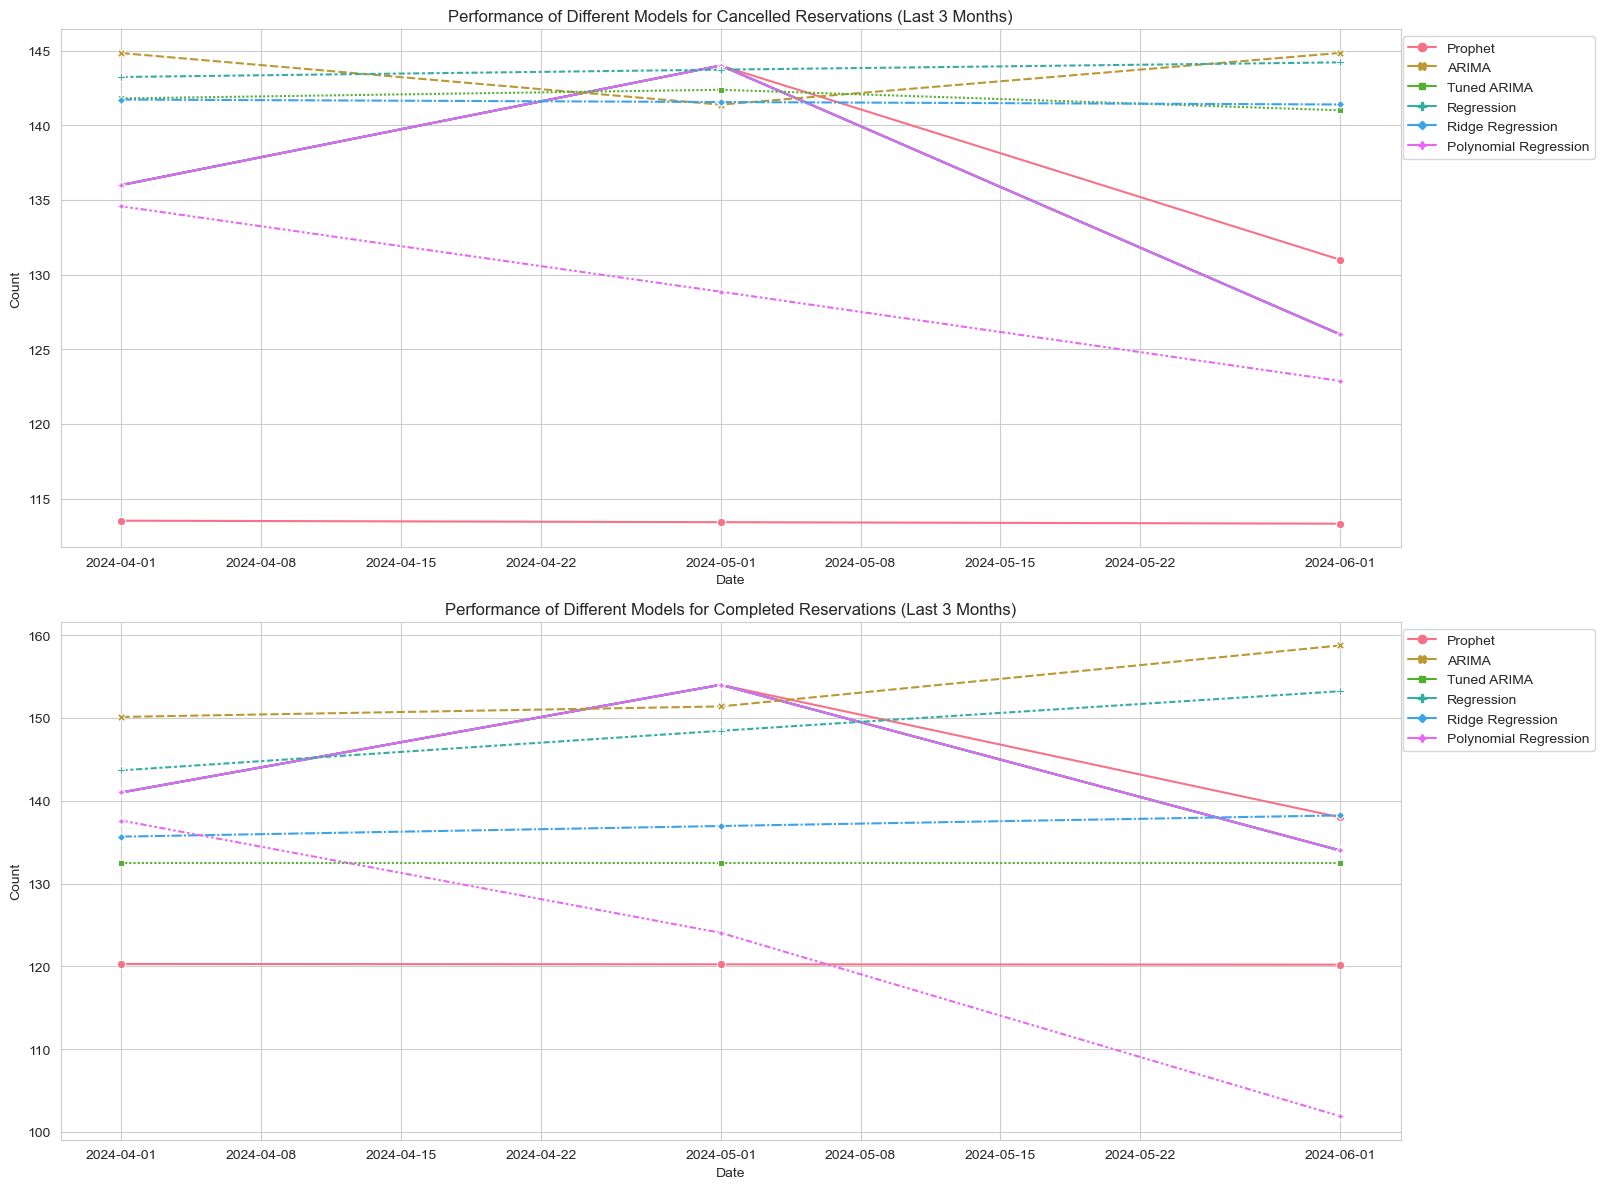

Cancelled Reservations - Last 3 Months
         Date  Actual_Cancelled  Predicted_Cancelled  Cancelled_MAE  \
0  2024-04-01               136           113.523442      23.577218   
1  2024-05-01               144           113.422782      23.577218   
2  2024-06-01               131           113.322122      23.577218   
3  2024-04-01               136           144.832941      10.097774   
4  2024-05-01               144           141.381737      10.097774   
5  2024-06-01               126           144.842117      10.097774   
6  2024-04-01               136           141.797868       7.474572   
7  2024-05-01               144           142.376966       7.474572   
8  2024-06-01               126           141.002814       7.474572   
9  2024-04-01               136           143.233333       8.574074   
10 2024-05-01               144           143.722222       8.574074   
11 2024-06-01               126           144.211111       8.574074   
12 2024-04-01               136       

In [35]:
# Filter the last 3 months of data
last_3_months = ['2024-04-01', '2024-05-01', '2024-06-01']
last_3_months_results = decision_model_results_df[
    decision_model_results_df['Date'].isin(last_3_months)
]

# Define colors for different models
palette = sns.color_palette("husl", len(last_3_months_results['Model'].unique()))

# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Plot for Cancelled Reservations
plt.subplot(2, 1, 1)
sns.lineplot(data=last_3_months_results, x='Date', y='Actual_Cancelled', hue='Model', style='Model', markers=True, dashes=False, palette=palette)
sns.lineplot(data=last_3_months_results, x='Date', y='Predicted_Cancelled', hue='Model', style='Model', markers=True, dashes=True, palette=palette, legend=False)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Performance of Different Models for Cancelled Reservations (Last 3 Months)')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.0))

# Plot for Completed Reservations
plt.subplot(2, 1, 2)
sns.lineplot(data=last_3_months_results, x='Date', y='Actual_Completed', hue='Model', style='Model', markers=True, dashes=False, palette=palette)
sns.lineplot(data=last_3_months_results, x='Date', y='Predicted_Completed', hue='Model', style='Model', markers=True, dashes=True, palette=palette, legend=False)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Performance of Different Models for Completed Reservations (Last 3 Months)')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.0))

plt.tight_layout()
plt.show()

# Display the last 3 months results
print("Cancelled Reservations - Last 3 Months")
print(last_3_months_results[['Date', 'Actual_Cancelled', 'Predicted_Cancelled', 'Cancelled_MAE', 'Cancelled_MSE', 'Cancelled_MAPE', 'Model']])

print("\nCompleted Reservations - Last 3 Months")
print(last_3_months_results[['Date', 'Actual_Completed', 'Predicted_Completed', 'Completed_MAE', 'Completed_MSE', 'Completed_MAPE', 'Model']])